In [1]:
# importing libraries
import pandas as pd
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import scikitplot as skplt
from sklearn.impute import SimpleImputer

from scipy.stats import kstest, norm
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from scipy.stats import normaltest
from scipy.stats import anderson
from scipy.stats import chi2_contingency
from scipy.stats import chi2

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.graphics.gofplots import qqplot
import pylab
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# DATASET INFORMATION

In [2]:
def loading_data():
    filename = input("Please enter file name with extension : ")
    filetype = filename.split(".")
    if filetype[-1] == "xlsx":
        data = pd.read_excel(filename)
    else:
        data = pd.read_csv(filename)
    return data

data = loading_data()

Please enter file name with extension : marketing_campaign (1).csv


In [3]:
def data_info(n):
    dimensions = data.shape
    print ("Shape of the data is :",dimensions)
    print ("Number of rows :", dimensions[0])
    print ("Number of columns :", dimensions[1])
    
    #print ("\n")
    print ("\n Columns Types:\n",data.dtypes)
    
    print ("\nThe first",n,"rows of the data are:\n",data.head(n))
    print ("\nThe last",n,"rows of the data are:\n",data.tail(n))
    print (data.info())
data_info(3)

Shape of the data is : (2240, 29)
Number of rows : 2240
Number of columns : 29

 Columns Types:
 ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtyp

# EDA

In [4]:
def missing_values():
    data.isnull()
    data.replace(' ',np.nan, inplace=True)
    print (data.isnull().sum())
missing_values()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [7]:
def missing_value_numeric():
    n = int(input("Enter the number of columns you want to convert into numeric : "))
    for i in range(0,n):
        col_name = input("Enter column name : ")
        for col in col_name:
            data[col_name] = pd.to_numeric(data[col_name], errors='coerce')
        mean_imputation = SimpleImputer(strategy='mean')
        data[[col_name]]= mean_imputation.fit_transform(data[[col_name]])
    print (data.isnull().sum())    
    return data.dtypes

missing_value_numeric()

Enter the number of columns you want to convert into numeric : 1
Enter column name : Income
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [9]:
def drop_val():
    global data
    d_col = input("Enter the column name whose null values you want to delete : ")
    data = data.dropna(axis=0, subset=[d_col])
    return data

In [10]:
data.drop(['ID'], axis = 1, inplace = True)

In [11]:
data.describe().T

count          mean           std     min       25%  \
Year_Birth           2240.0   1968.805804     11.984069  1893.0   1959.00   
Income               2240.0  52247.251354  25037.797168  1730.0  35538.75   
Kidhome              2240.0      0.444196      0.538398     0.0      0.00   
Teenhome             2240.0      0.506250      0.544538     0.0      0.00   
Recency              2240.0     49.109375     28.962453     0.0     24.00   
MntWines             2240.0    303.935714    336.597393     0.0     23.75   
MntFruits            2240.0     26.302232     39.773434     0.0      1.00   
MntMeatProducts      2240.0    166.950000    225.715373     0.0     16.00   
MntFishProducts      2240.0     37.525446     54.628979     0.0      3.00   
MntSweetProducts     2240.0     27.062946     41.280498     0.0      1.00   
MntGoldProds         2240.0     44.021875     52.167439     0.0      9.00   
NumDealsPurchases    2240.0      2.325000      1.932238     0.0      1.00   
NumWebPurchases      2240.0      4.084821      2.778714     0.0      2.00   
NumCatalogPurchases  2240.0      2.662054      2.923101     0.0      0.00   
NumStorePurchases    2240.0      5.790179      3.250958     0.0      3.00   
NumWebVisitsMonth    2240.0      5.316518      2.426645     0.0      3.00   
AcceptedCmp3         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp4         2240.0      0.074554      0.262728     0.0      0.00   
AcceptedCmp5         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp1         2240.0      0.064286      0.245316     0.0      0.00   
AcceptedCmp2         2240.0      0.013393      0.114976     0.0      0.00   
Complain             2240.0      0.009375      0.096391     0.0      0.00   
Z_CostContact        2240.0      3.000000      0.000000     3.0      3.00   
Z_Revenue            2240.0     11.000000      0.000000    11.0     11.00   
Response             2240.0      0.149107      0.356274     0.0      0.00   

                         50%       75%       max  
Year_Birth            1970.0   1977.00    1996.0  
Income               51741.5  68289.75  666666.0  
Kidhome                  0.0      1.00       2.0  
Teenhome                 0.0      1.00       2.0  
Recency                 49.0     74.00      99.0  
MntWines               173.5    504.25    1493.0  
MntFruits                8.0     33.00     199.0  
MntMeatProducts         67.0    232.00    1725.0  
MntFishProducts         12.0     50.00     259.0  
MntSweetProducts         8.0     33.00     263.0  
MntGoldProds            24.0     56.00     362.0  
NumDealsPurchases        2.0      3.00      15.0  
NumWebPurchases          4.0      6.00      27.0  
NumCatalogPurchases      2.0      4.00      28.0  
NumStorePurchases        5.0      8.00      13.0  
NumWebVisitsMonth        6.0      7.00      20.0  
AcceptedCmp3             0.0      0.00       1.0  
AcceptedCmp4             0.0      0.00       1.0  
AcceptedCmp5             0.0      0.00       1.0  
AcceptedCmp1             0.0      0.00       1.0  
AcceptedCmp2             0.0      0.00       1.0  
Complain                 0.0      0.00       1.0  
Z_CostContact            3.0      3.00       3.0  
Z_Revenue               11.0     11.00      11.0  
Response                 0.0      0.00       1.0

In [12]:
data.describe(include='O').T

count unique         top  freq
Education       2240      5  Graduation  1127
Marital_Status  2240      8     Married   864
Dt_Customer     2240    663   8/31/2012    12

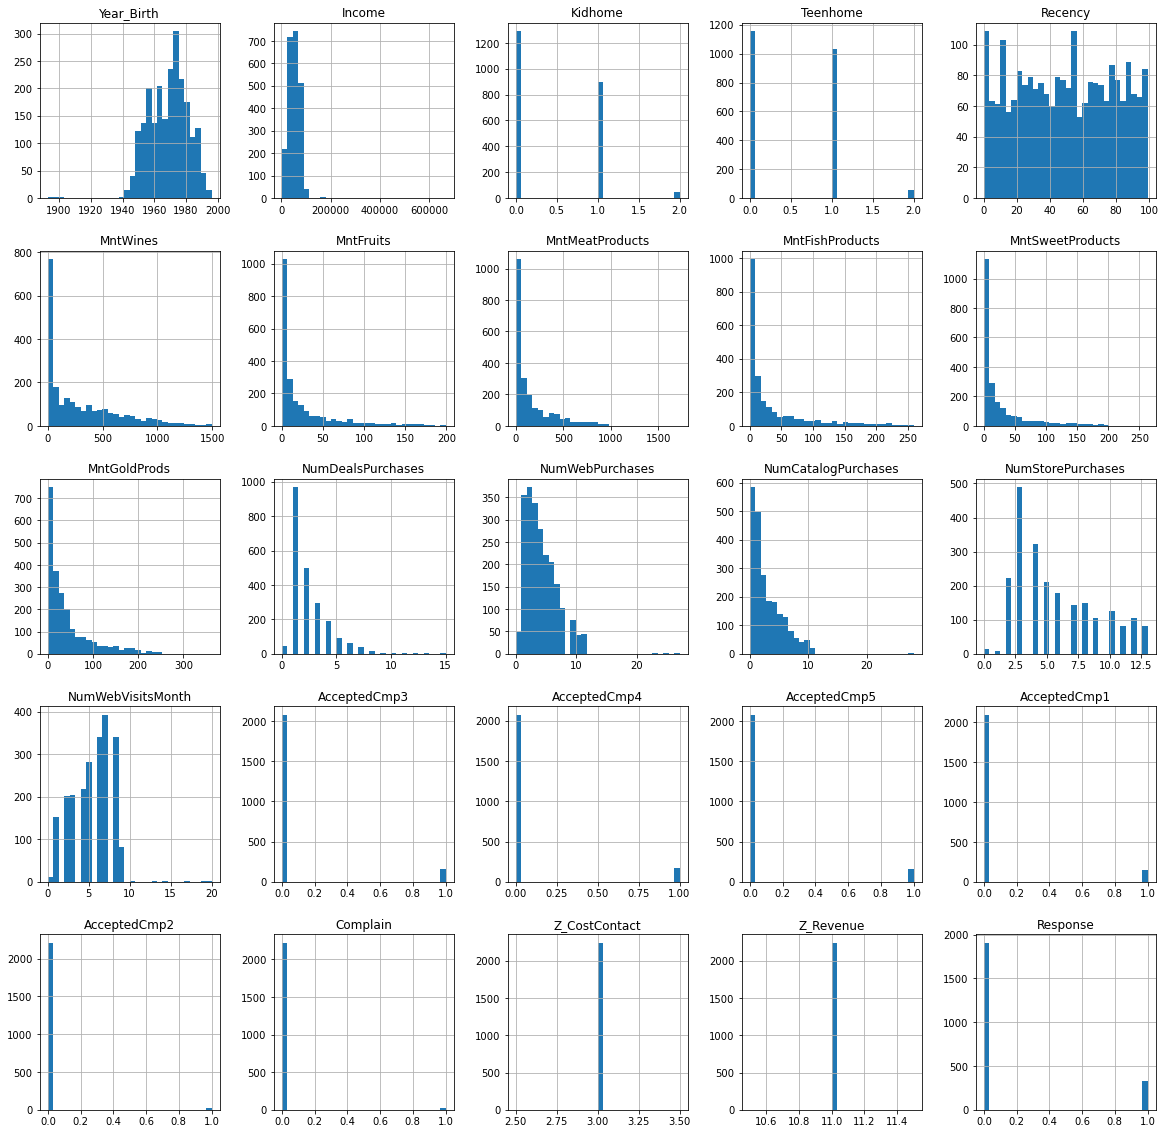

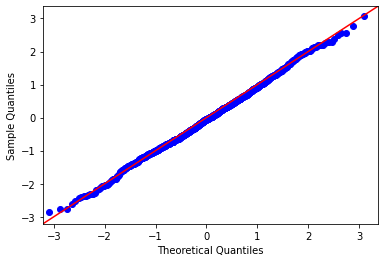

Kolmogorov Smirnov test
0.026712641063121434 0.46540075184651497
Normal Distribution

Shapiro Wilk test
Statistics=0.998, p=0.800
Fail to reject H0 that is data is normal distributed

K2 test
K2stat=0.7929, p=0.6727
Fail to reject H0 that is data is normal distributed


In [13]:
def num_col_analysis():
    
    global data
    
    data1 = pd.DataFrame(data)
    
    data1.hist(figsize=(20,20), bins = 30)
    plot.show()
    
    
    data1 = norm.rvs(size=1000)
    sm.qqplot(data1, line='45')
    pylab.show()
    
    print ("Kolmogorov Smirnov test")
    data1 = norm.rvs(size=1000)
    ks_statistic, p_value = kstest(data1, 'norm')
    print(ks_statistic, p_value)
    if p_value > 0.05:
        print ("Normal Distribution")
    else:
        print ("Data is not normally distributed")
        
    print ("\nShapiro Wilk test")   
    data1 = norm.rvs(size=500)
    stat, p = shapiro(data1)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print("Fail to reject H0 that is data is normal distributed")
    else:
        print("Reject H0 that is data is normally distributed")    
        
    print ("\nK2 test")
    k2stat, pvalue = normaltest(data1)
    print('K2stat=%.4f, p=%.4f' % (k2stat, pvalue))
    if p > alpha:
        print("Fail to reject H0 that is data is normal distributed")
    else:
        print("Reject H0 that is data is normally distributed")    

        
num_col_analysis()

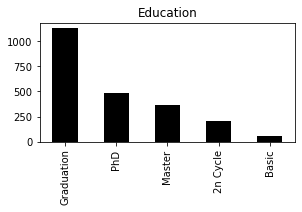

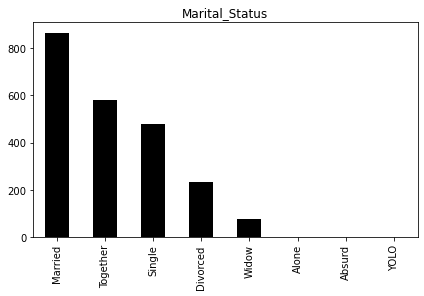

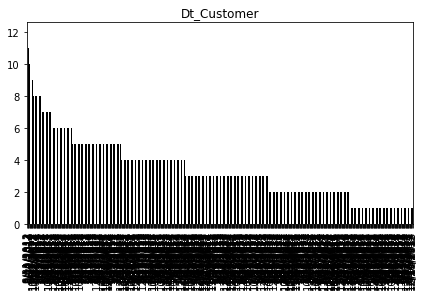

In [14]:
def stringcolanalysis(data):
    stringcols = data.select_dtypes(exclude=[np.number, "datetime64"])
    fig = plt.figure(figsize = (8,10))
    for i,col in enumerate(stringcols):
        fig.add_subplot(4,2,i+1)
        #fig.savefig('Categorical.png')
        data[col].value_counts().plot(kind = 'bar', color='black' ,fontsize=10)
        plt.tight_layout()
        plt.title(col)
        plt.show()
        
stringcolanalysis(data)

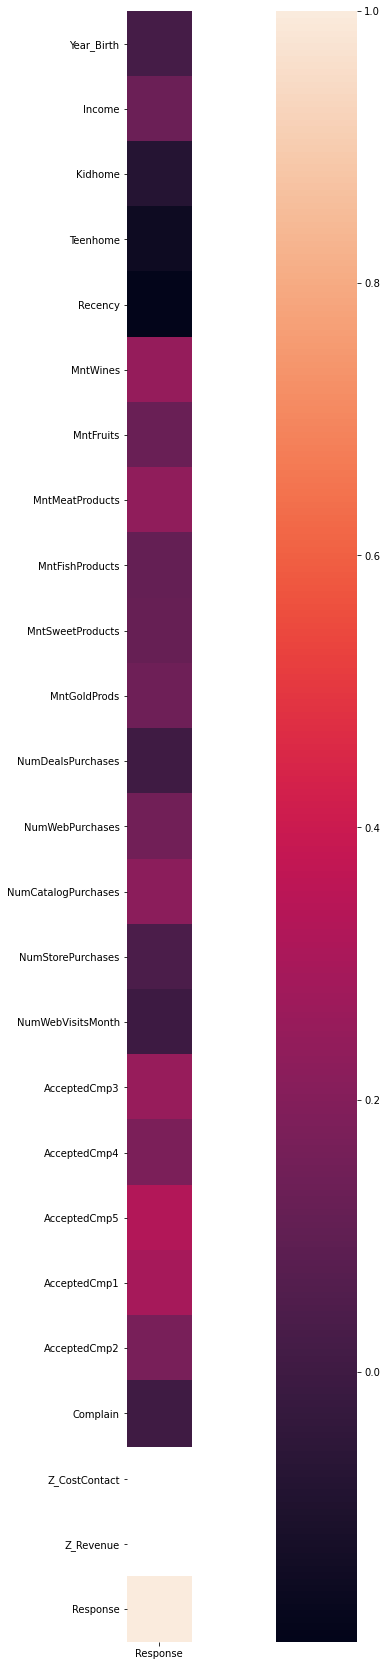

Response
Response             1.000000
AcceptedCmp5         0.326634
AcceptedCmp1         0.293982
AcceptedCmp3         0.254258
MntWines             0.247254
MntMeatProducts      0.236335
NumCatalogPurchases  0.220810
AcceptedCmp4         0.177019
AcceptedCmp2         0.169293
NumWebPurchases      0.148730
MntGoldProds         0.139850
Income               0.132756
MntFruits            0.125289
MntSweetProducts     0.117372
MntFishProducts      0.111331
NumStorePurchases    0.039363
Year_Birth           0.021325
NumDealsPurchases    0.002238
Complain            -0.001707
NumWebVisitsMonth   -0.003987
Kidhome             -0.080008
Teenhome            -0.154446
Recency             -0.198437
Z_CostContact             NaN
Z_Revenue                 NaN

In [15]:
correlation = data.corr()[['Response']]
plt.subplots(figsize=(30,30))
sns.heatmap(correlation,square=True,fmt="")
plt.show()
correlation.sort_values(by=['Response'],ascending=False)

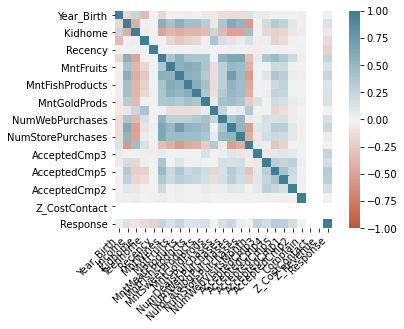

In [16]:
def correlation_anlysis(data):
    # NOTE: If label column is non-numeric, 'encode' it before calling this function 
    #numcols = data.select_dtypes(include=np.number)
    corr = data.corr()
    ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True 
    )
    
    ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')
    
correlation_anlysis(data)

Encode the categorical for machine learning

In [17]:
num_cols = data.select_dtypes(include = ['int64', 'float64']).columns.tolist()
cat_cols = data.select_dtypes(include = ['object']).columns.tolist()

def label_encoder(data):
    for i in cat_cols:
        le = LabelEncoder()
        data[i] = le.fit_transform(data[i])
    return data

label_encoder(data)


# One-Hot/dummy encoding on specified columns
def onehotencoding(data):
    data = pd.get_dummies(data)
    return data
onehotencoding(data)

Year_Birth  Education  Marital_Status   Income  Kidhome  Teenhome  \
0           1957          2               4  58138.0        0         0   
1           1954          2               4  46344.0        1         1   
2           1965          2               5  71613.0        0         0   
3           1984          2               5  26646.0        1         0   
4           1981          4               3  58293.0        1         0   
...          ...        ...             ...      ...      ...       ...   
2235        1967          2               3  61223.0        0         1   
2236        1946          4               5  64014.0        2         1   
2237        1981          2               2  56981.0        0         0   
2238        1956          3               5  69245.0        0         1   
2239        1954          4               3  52869.0        1         1   

      Dt_Customer  Recency  MntWines  MntFruits  ...  NumWebVisitsMonth  \
0             652       58       635         88  ...                  7   
1             339       38        11          1  ...                  5   
2             573       26       426         49  ...                  4   
3             234       26        11          4  ...                  6   
4              19       94       173         43  ...                  5   
...           ...      ...       ...        ...  ...                ...   
2235          466       46       709         43  ...                  5   
2236          461       56       406          0  ...                  7   
2237           32       91       908         48  ...                  6   
2238           30        8       428         30  ...                  3   
2239           68       40        84          3  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 28 columns]

['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']


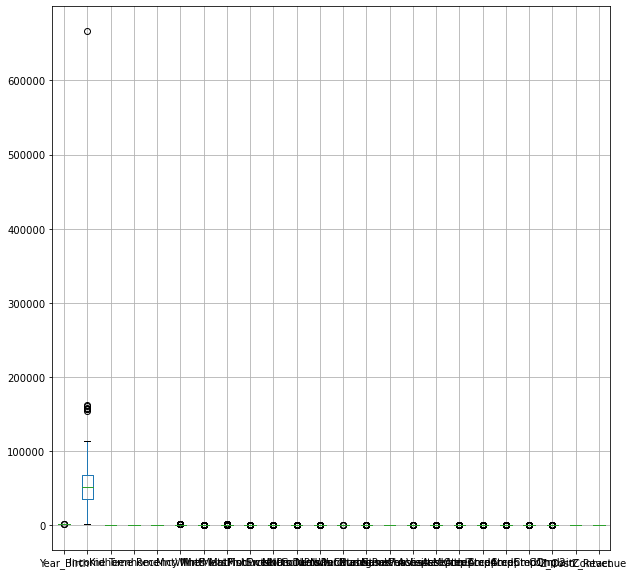

In [18]:
print(num_cols)
df = data.boxplot(figsize = (10,10), column = num_cols[0:-1], showfliers=True)

There are outliers in Income column will remove those values.
Tried z scores the data size got ver very small so removing those outliers was a better solution.

In [19]:
indexNames = data[ data['Income'] >= 100000 ].index

In [20]:
data.drop(indexNames , inplace=True)

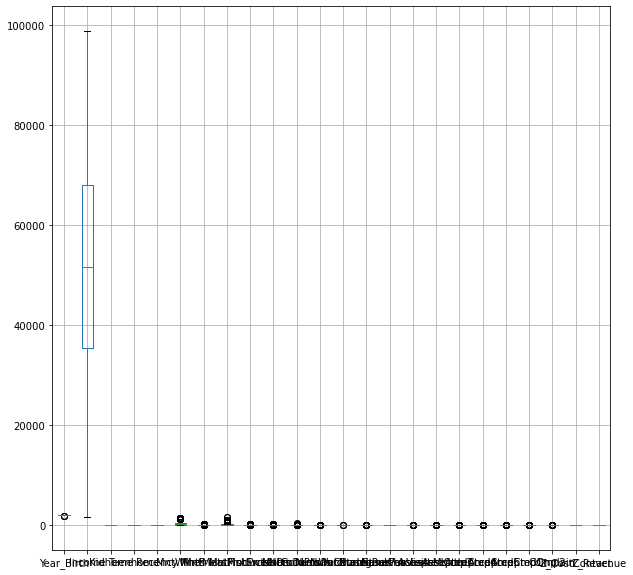

In [21]:
df = data.boxplot(figsize = (10,10), column = num_cols[0:-1], showfliers=True)

In [22]:
# Defining the independents variables and dependent variable

X=data.drop('Response',axis=1)
Y=data['Response']

# MACHINE LEARNING FUNCTIONS

In [26]:
def validationmetrics(model, testX, testY, verbose=True):  
    global predictions,accuracy,recall,precision
    
    predictions = model.predict(testX)
    
    if model.__class__.__module__.startswith('lightgbm'):
        for i in range(0, predictions.shape[0]):
            predictions[i]= 1 if predictions[i] >= 0.5 else 0
    
    #Accuracy
    accuracy = accuracy_score(testY, predictions)*100
    
    result1 = classification_report(testY, predictions)
    print("Classification Report:",)
    print (result1)
    
    #Precision
    precision = precision_score(testY, predictions, pos_label=1, labels=[0,1])*100
    
    #Recall
    recall = recall_score(testY, predictions,pos_label=1,labels=[0,1])*100
    
    #get FPR (specificity) and TPR (sensitivity)
    fpr , tpr, _ = roc_curve(testY, predictions)
    
    #AUC
    auc_val = auc(fpr, tpr)
    
    #F-Score
    f_score = f1_score(testY, predictions)
    

    if verbose:
        #print("Prediction Vector: \n", predictions)
        print("\n Accuracy: \n", accuracy)
        print("\n Precision of event Happening: \n", precision)
        print("\n Recall of event Happening: \n", recall)
        print("\n AUC: \n",auc_val)
        print("\n F-Score:\n", f_score)
        #confusion Matrix
        print("\n Confusion Matrix: \n", confusion_matrix(testY, predictions,labels=[0,1]))
    
    res_map = {
                "accuracy": accuracy,
                "precision": precision,
                "recall": recall,
                "auc_val": auc_val,
                "f_score": f_score,
                "model_obj": model
              }
    
    return res_map

In [27]:
def LogReg(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf  = LogisticRegression()
    clf.fit(trainX , trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)

def SVM(trainX, testX, trainY, testY, svmtype="SVC", verbose=True, clf=None):
    # for one vs all
    if not clf:
        if svmtype == "Linear":
            clf = svm.LinearSVC()
        else:
            clf = svm.SVC()
    clf.fit(trainX , trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)

def RandomForest(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf  = RandomForestClassifier()
    clf.fit(trainX , trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)

def XgBoost(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf = XGBClassifier(random_state=1,learning_rate=0.01)
    clf.fit(trainX,trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)

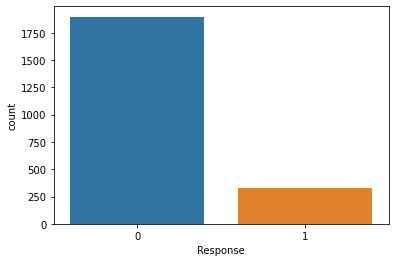

In [28]:
sns.countplot(x =data['Response'], data = data)
plt.show()

Data has class imbalanced issue first cater this issue and will do predictions.

In [29]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)
print(X_train.shape)
print(y_train.shape)


(2548, 27)
(2548,)


Now the data is balanced.

# FEATURE SELECTION AND DIMENSIONALITY REDUCTION

- Different Algorithms Predictions Using Random Forest Feature Selection

In [34]:
model= RandomForestClassifier(n_estimators=100,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)

Recency                0.092395
MntWines               0.075866
MntMeatProducts        0.075248
Income                 0.071030
Dt_Customer            0.058585
MntGoldProds           0.052854
Year_Birth             0.048345
AcceptedCmp3           0.047027
AcceptedCmp5           0.045890
MntFishProducts        0.045374
MntSweetProducts       0.043502
MntFruits              0.042160
NumWebVisitsMonth      0.041018
NumStorePurchases      0.040365
NumCatalogPurchases    0.038740
AcceptedCmp1           0.032717
NumWebPurchases        0.031407
NumDealsPurchases      0.030486
Marital_Status         0.030213
Education              0.020240
Teenhome               0.012481
AcceptedCmp2           0.009345
AcceptedCmp4           0.006970
Kidhome                0.006689
Complain               0.001054
Z_CostContact          0.000000
Z_Revenue              0.000000
dtype: float64

..............................................................
Index(['MntWines'], dtype='object')
Logistic Regression From Random Forest Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.74      0.81       623
           1       0.26      0.50      0.34       112

    accuracy                           0.70       735
   macro avg       0.57      0.62      0.57       735
weighted avg       0.79      0.70      0.74       735


 Accuracy: 
 70.34013605442176

 Precision of event Happening: 
 25.688073394495415

 Recall of event Happening: 
 50.0

 AUC: 
 0.619983948635634

 F-Score:
 0.3393939393939394

 Confusion Matrix: 
 [[461 162]
 [ 56  56]]
SVM From Random Forest Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       623
           1       0.28      0.37      0.32       112

    accuracy                           0.76       735
   m

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       623
           1       0.27      0.38      0.32       112

    accuracy                           0.75       735
   macro avg       0.58      0.60      0.58       735
weighted avg       0.79      0.75      0.77       735


 Accuracy: 
 75.10204081632654

 Precision of event Happening: 
 27.388535031847134

 Recall of event Happening: 
 38.392857142857146

 AUC: 
 0.6004715088282504

 F-Score:
 0.3197026022304833

 Confusion Matrix: 
 [[509 114]
 [ 69  43]]
..............................................................
Index(['Recency', 'MntWines', 'MntGoldProds'], dtype='object')
Logistic Regression From Random Forest Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.73      0.81       623
           1       0.30      0.66      0.42       112

    accuracy                           0.72      

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.69      0.79       623
           1       0.29      0.70      0.41       112

    accuracy                           0.69       735
   macro avg       0.61      0.69      0.60       735
weighted avg       0.83      0.69      0.73       735


 Accuracy: 
 68.84353741496598

 Precision of event Happening: 
 28.57142857142857

 Recall of event Happening: 
 69.64285714285714

 AUC: 
 0.6917134831460674

 F-Score:
 0.40519480519480516

 Confusion Matrix: 
 [[428 195]
 [ 34  78]]
..............................................................
Index(['Income', 'Recency', 'MntWines', 'MntMeatProducts', 'MntGoldProds'], dtype='object')
Logistic Regression From Random Forest Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.78      0.84       623
           1       0.32      0.57      0.41       112

    accuracy         

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.76      0.84       623
           1       0.34      0.71      0.47       112

    accuracy                           0.75       735
   macro avg       0.64      0.74      0.65       735
weighted avg       0.85      0.75      0.78       735


 Accuracy: 
 74.96598639455783

 Precision of event Happening: 
 34.48275862068966

 Recall of event Happening: 
 71.42857142857143

 AUC: 
 0.7351524879614768

 F-Score:
 0.46511627906976755

 Confusion Matrix: 
 [[471 152]
 [ 32  80]]
..............................................................
Index(['Income', 'Teenhome', 'Recency', 'MntWines', 'MntMeatProducts',
       'MntGoldProds', 'NumStorePurchases'],
      dtype='object')
Logistic Regression From Random Forest Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.78      0.84       623
           1       0.32      0

C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       623
           1       0.27      0.43      0.33       112

    accuracy                           0.73       735
   macro avg       0.58      0.61      0.58       735
weighted avg       0.79      0.73      0.76       735


 Accuracy: 
 73.46938775510205

 Precision of event Happening: 
 26.81564245810056

 Recall of event Happening: 
 42.857142857142854

 AUC: 
 0.6091492776886036

 F-Score:
 0.32989690721649484

 Confusion Matrix: 
 [[492 131]
 [ 64  48]]
RM From Random Forest Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       623
           1       0.42      0.54      0.47       112

    accuracy                           0.82       735
   macro avg       0.67      0.70      0.68       735
weighted avg       0.84      0.82      0.83       735


 Accuracy: 
 81.768707482993

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       623
           1       0.40      0.63      0.49       112

    accuracy                           0.80       735
   macro avg       0.67      0.73      0.68       735
weighted avg       0.85      0.80      0.82       735


 Accuracy: 
 80.1360544217687

 Precision of event Happening: 
 40.340909090909086

 Recall of event Happening: 
 63.39285714285714

 AUC: 
 0.7326946227929374

 F-Score:
 0.4930555555555556

 Confusion Matrix: 
 [[518 105]
 [ 41  71]]
..............................................................
Index(['Marital_Status', 'Income', 'Teenhome', 'Recency', 'MntWines',
       'MntMeatProducts', 'MntFishProducts', 'MntGoldProds',
       'NumStorePurchases'],
      dtype='object')
Logistic Regression From Random Forest Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.83      0.

C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       623
           1       0.27      0.43      0.33       112

    accuracy                           0.74       735
   macro avg       0.58      0.61      0.59       735
weighted avg       0.79      0.74      0.76       735


 Accuracy: 
 73.87755102040816

 Precision of event Happening: 
 27.27272727272727

 Recall of event Happening: 
 42.857142857142854

 AUC: 
 0.6115569823434992

 F-Score:
 0.33333333333333326

 Confusion Matrix: 
 [[495 128]
 [ 64  48]]
RM From Random Forest Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.89       623
           1       0.40      0.49      0.44       112

    accuracy                           0.81       735
   macro avg       0.65      0.68      0.66       735
weighted avg       0.83      0.81      0.82       735


 Accuracy: 
 81.088435374149

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       623
           1       0.44      0.63      0.52       112

    accuracy                           0.82       735
   macro avg       0.68      0.74      0.70       735
weighted avg       0.85      0.82      0.83       735


 Accuracy: 
 82.0408163265306

 Precision of event Happening: 
 43.82716049382716

 Recall of event Happening: 
 63.39285714285714

 AUC: 
 0.7439305778491171

 F-Score:
 0.5182481751824818

 Confusion Matrix: 
 [[532  91]
 [ 41  71]]
..............................................................
Index(['Year_Birth', 'Marital_Status', 'Income', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumStorePurchases'],
      dtype='object')
Logistic Regression From Random Forest Selection
Classification Report:
              precision    recall  f1-score   support

           0  

C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       623
           1       0.27      0.43      0.33       112

    accuracy                           0.74       735
   macro avg       0.58      0.61      0.59       735
weighted avg       0.79      0.74      0.76       735


 Accuracy: 
 73.87755102040816

 Precision of event Happening: 
 27.27272727272727

 Recall of event Happening: 
 42.857142857142854

 AUC: 
 0.6115569823434992

 F-Score:
 0.33333333333333326

 Confusion Matrix: 
 [[495 128]
 [ 64  48]]
RM From Random Forest Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       623
           1       0.44      0.49      0.46       112

    accuracy                           0.83       735
   macro avg       0.67      0.69      0.68       735
weighted avg       0.84      0.83      0.83       735


 Accuracy: 
 82.721088435374

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       623
           1       0.40      0.63      0.49       112

    accuracy                           0.80       735
   macro avg       0.66      0.73      0.68       735
weighted avg       0.85      0.80      0.82       735


 Accuracy: 
 80.0

 Precision of event Happening: 
 40.11299435028249

 Recall of event Happening: 
 63.39285714285714

 AUC: 
 0.7318920545746388

 F-Score:
 0.4913494809688581

 Confusion Matrix: 
 [[517 106]
 [ 41  71]]
..............................................................
Index(['Year_Birth', 'Marital_Status', 'Income', 'Teenhome', 'Dt_Customer',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumStorePurchases'],
      dtype='object')
Logistic Regression From Random Forest Selection
Classification Report:
              precision    recall  f1-sc

C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       623
           1       0.27      0.43      0.33       112

    accuracy                           0.74       735
   macro avg       0.58      0.61      0.59       735
weighted avg       0.79      0.74      0.76       735


 Accuracy: 
 73.87755102040816

 Precision of event Happening: 
 27.27272727272727

 Recall of event Happening: 
 42.857142857142854

 AUC: 
 0.6115569823434992

 F-Score:
 0.33333333333333326

 Confusion Matrix: 
 [[495 128]
 [ 64  48]]
RM From Random Forest Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       623
           1       0.43      0.46      0.44       112

    accuracy                           0.82       735
   macro avg       0.66      0.67      0.67       735
weighted avg       0.83      0.82      0.83       735


 Accuracy: 
 82.448979591836

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.84      0.88       623
           1       0.42      0.63      0.50       112

    accuracy                           0.81       735
   macro avg       0.67      0.74      0.69       735
weighted avg       0.85      0.81      0.82       735


 Accuracy: 
 80.81632653061224

 Precision of event Happening: 
 41.52046783625731

 Recall of event Happening: 
 63.39285714285714

 AUC: 
 0.7367074638844302

 F-Score:
 0.5017667844522967

 Confusion Matrix: 
 [[523 100]
 [ 41  71]]
..............................................................
Index(['Year_Birth', 'Marital_Status', 'Income', 'Teenhome', 'Dt_Customer',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'],
      dtype='object')
Logistic Regression From Random Forest Selection


C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.77      0.84       623
           1       0.34      0.67      0.45       112

    accuracy                           0.75       735
   macro avg       0.63      0.72      0.64       735
weighted avg       0.84      0.75      0.78       735


 Accuracy: 
 75.10204081632654

 Precision of event Happening: 
 33.93665158371041

 Recall of event Happening: 
 66.96428571428571

 AUC: 
 0.7176464686998394

 F-Score:
 0.45045045045045046

 Confusion Matrix: 
 [[477 146]
 [ 37  75]]
SVM From Random Forest Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       623
           1       0.27      0.43      0.33       112

    accuracy                           0.74       735
   macro avg       0.58      0.61      0.59       735
weighted avg       0.79      0.74      0.76       735


 Accuracy: 
 73.877551020408

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.82      0.87       623
           1       0.41      0.67      0.51       112

    accuracy                           0.80       735
   macro avg       0.67      0.75      0.69       735
weighted avg       0.85      0.80      0.82       735


 Accuracy: 
 80.0

 Precision of event Happening: 
 40.54054054054054

 Recall of event Happening: 
 66.96428571428571

 AUC: 
 0.7465389245585875

 F-Score:
 0.5050505050505051

 Confusion Matrix: 
 [[513 110]
 [ 37  75]]
..............................................................
Index(['Year_Birth', 'Marital_Status', 'Income', 'Teenhome', 'Dt_Customer',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth'],
      dtype='object')
Logistic Regression F

C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.77      0.84       623
           1       0.33      0.63      0.43       112

    accuracy                           0.75       735
   macro avg       0.63      0.70      0.64       735
weighted avg       0.83      0.75      0.78       735


 Accuracy: 
 74.82993197278913

 Precision of event Happening: 
 33.02325581395349

 Recall of event Happening: 
 63.39285714285714

 AUC: 
 0.7013944622792937

 F-Score:
 0.43425076452599387

 Confusion Matrix: 
 [[479 144]
 [ 41  71]]
SVM From Random Forest Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       623
           1       0.27      0.43      0.33       112

    accuracy                           0.74       735
   macro avg       0.58      0.61      0.59       735
weighted avg       0.79      0.74      0.76       735


 Accuracy: 
 73.877551020408

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       623
           1       0.41      0.66      0.51       112

    accuracy                           0.80       735
   macro avg       0.67      0.75      0.69       735
weighted avg       0.85      0.80      0.82       735


 Accuracy: 
 80.40816326530611

 Precision of event Happening: 
 41.11111111111111

 Recall of event Happening: 
 66.07142857142857

 AUC: 
 0.7452849117174959

 F-Score:
 0.5068493150684932

 Confusion Matrix: 
 [[517 106]
 [ 38  74]]
..............................................................
Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'],
      

C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.77      0.84       623
           1       0.33      0.64      0.44       112

    accuracy                           0.75       735
   macro avg       0.63      0.71      0.64       735
weighted avg       0.83      0.75      0.78       735


 Accuracy: 
 74.82993197278913

 Precision of event Happening: 
 33.17972350230415

 Recall of event Happening: 
 64.28571428571429

 AUC: 
 0.7050561797752809

 F-Score:
 0.4376899696048632

 Confusion Matrix: 
 [[478 145]
 [ 40  72]]
SVM From Random Forest Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       623
           1       0.27      0.43      0.33       112

    accuracy                           0.74       735
   macro avg       0.58      0.61      0.59       735
weighted avg       0.79      0.74      0.76       735


 Accuracy: 
 73.8775510204081

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       623
           1       0.42      0.66      0.51       112

    accuracy                           0.81       735
   macro avg       0.67      0.75      0.70       735
weighted avg       0.85      0.81      0.82       735


 Accuracy: 
 80.68027210884354

 Precision of event Happening: 
 41.57303370786517

 Recall of event Happening: 
 66.07142857142857

 AUC: 
 0.7468900481540931

 F-Score:
 0.5103448275862069

 Confusion Matrix: 
 [[519 104]
 [ 38  74]]
..............................................................
Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       

C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       623
           1       0.27      0.43      0.33       112

    accuracy                           0.74       735
   macro avg       0.58      0.61      0.59       735
weighted avg       0.79      0.74      0.76       735


 Accuracy: 
 73.87755102040816

 Precision of event Happening: 
 27.27272727272727

 Recall of event Happening: 
 42.857142857142854

 AUC: 
 0.6115569823434992

 F-Score:
 0.33333333333333326

 Confusion Matrix: 
 [[495 128]
 [ 64  48]]
RM From Random Forest Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       623
           1       0.45      0.46      0.46       112

    accuracy                           0.83       735
   macro avg       0.68      0.68      0.68       735
weighted avg       0.83      0.83      0.83       735


 Accuracy: 
 83.129251700680

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       623
           1       0.41      0.65      0.51       112

    accuracy                           0.81       735
   macro avg       0.67      0.74      0.69       735
weighted avg       0.85      0.81      0.82       735


 Accuracy: 
 80.54421768707482

 Precision of event Happening: 
 41.24293785310734

 Recall of event Happening: 
 65.17857142857143

 AUC: 
 0.7424257624398074

 F-Score:
 0.5051903114186852

 Confusion Matrix: 
 [[519 104]
 [ 39  73]]
..............................................................
Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       

C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       623
           1       0.27      0.43      0.33       112

    accuracy                           0.74       735
   macro avg       0.58      0.61      0.59       735
weighted avg       0.79      0.74      0.76       735


 Accuracy: 
 73.87755102040816

 Precision of event Happening: 
 27.27272727272727

 Recall of event Happening: 
 42.857142857142854

 AUC: 
 0.6115569823434992

 F-Score:
 0.33333333333333326

 Confusion Matrix: 
 [[495 128]
 [ 64  48]]
RM From Random Forest Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       623
           1       0.47      0.50      0.49       112

    accuracy                           0.84       735
   macro avg       0.69      0.70      0.70       735
weighted avg       0.84      0.84      0.84       735


 Accuracy: 
 83.945578231292

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       623
           1       0.41      0.66      0.50       112

    accuracy                           0.80       735
   macro avg       0.67      0.74      0.69       735
weighted avg       0.85      0.80      0.82       735


 Accuracy: 
 80.1360544217687

 Precision of event Happening: 
 40.65934065934066

 Recall of event Happening: 
 66.07142857142857

 AUC: 
 0.7436797752808988

 F-Score:
 0.5034013605442177

 Confusion Matrix: 
 [[515 108]
 [ 38  74]]
..............................................................
Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       '

C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.77      0.84       623
           1       0.33      0.64      0.44       112

    accuracy                           0.75       735
   macro avg       0.63      0.71      0.64       735
weighted avg       0.83      0.75      0.78       735


 Accuracy: 
 74.82993197278913

 Precision of event Happening: 
 33.17972350230415

 Recall of event Happening: 
 64.28571428571429

 AUC: 
 0.7050561797752809

 F-Score:
 0.4376899696048632

 Confusion Matrix: 
 [[478 145]
 [ 40  72]]
SVM From Random Forest Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       623
           1       0.27      0.43      0.33       112

    accuracy                           0.74       735
   macro avg       0.58      0.61      0.59       735
weighted avg       0.79      0.74      0.76       735


 Accuracy: 
 73.8775510204081

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       623
           1       0.41      0.66      0.50       112

    accuracy                           0.80       735
   macro avg       0.67      0.74      0.69       735
weighted avg       0.85      0.80      0.82       735


 Accuracy: 
 80.1360544217687

 Precision of event Happening: 
 40.65934065934066

 Recall of event Happening: 
 66.07142857142857

 AUC: 
 0.7436797752808988

 F-Score:
 0.5034013605442177

 Confusion Matrix: 
 [[515 108]
 [ 38  74]]
..............................................................
Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       '

C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.77      0.84       623
           1       0.34      0.66      0.45       112

    accuracy                           0.75       735
   macro avg       0.63      0.71      0.64       735
weighted avg       0.84      0.75      0.78       735


 Accuracy: 
 74.96598639455783

 Precision of event Happening: 
 33.63636363636363

 Recall of event Happening: 
 66.07142857142857

 AUC: 
 0.7131821829855537

 F-Score:
 0.44578313253012053

 Confusion Matrix: 
 [[477 146]
 [ 38  74]]
SVM From Random Forest Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       623
           1       0.27      0.43      0.33       112

    accuracy                           0.74       735
   macro avg       0.58      0.61      0.59       735
weighted avg       0.79      0.74      0.76       735


 Accuracy: 
 73.877551020408

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       623
           1       0.41      0.66      0.50       112

    accuracy                           0.80       735
   macro avg       0.67      0.74      0.69       735
weighted avg       0.85      0.80      0.82       735


 Accuracy: 
 80.1360544217687

 Precision of event Happening: 
 40.65934065934066

 Recall of event Happening: 
 66.07142857142857

 AUC: 
 0.7436797752808988

 F-Score:
 0.5034013605442177

 Confusion Matrix: 
 [[515 108]
 [ 38  74]]


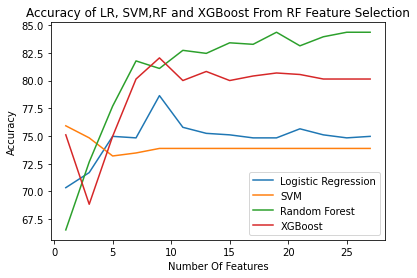

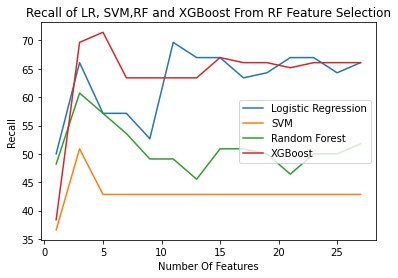

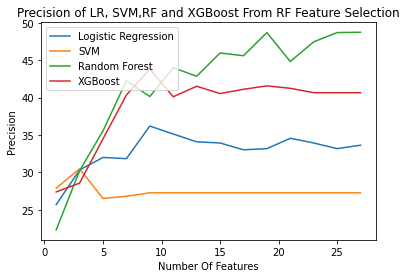

In [35]:
import matplotlib
import matplotlib.pyplot as plt


def select_features_RF(X_train, y_train, X_test,n):
    # configure to select a subset of features
    fs = SelectFromModel(RandomForestClassifier(n_estimators=100),threshold=-np.inf, max_features=n)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    print("..............................................................")
    selected_feat= X_train.columns[(fs.get_support())]
    print(selected_feat)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
    
    
acc_LR = []
acc_SVM = []
acc_RF = []
acc_XG = []

rec_LR = []
rec_SVM = []
rec_RF = []
rec_XG = []

pre_LR = []
pre_SVM = []
pre_RF = []
pre_XG = []

# feature selection
for n in range(1,28,2):
    X_train_fs, X_test_fs, fs = select_features_RF(X_train, y_train, X_test,n)
    # fit the model
    print ("Logistic Regression From Random Forest Selection")
    LogReg(X_train_fs, X_test_fs, y_train, y_test, verbose=True, clf=None)
    acc_LR.append(accuracy)
    rec_LR.append(recall)
    pre_LR.append(precision)
    
    print ("SVM From Random Forest Selection")
    SVM(X_train_fs, X_test_fs, y_train, y_test, svmtype="SVC", verbose=True, clf=None)
    acc_SVM.append(accuracy)
    rec_SVM.append(recall)
    pre_SVM.append(precision)
    
    print ("RM From Random Forest Selection")
    RandomForest(X_train_fs, X_test_fs, y_train, y_test, verbose=True, clf=None)
    acc_RF.append(accuracy)
    rec_RF.append(recall)
    pre_RF.append(precision)
    
    print ("Xgboost From Random Forest Selection")
    XgBoost(X_train_fs, X_test_fs, y_train, y_test, verbose=True, clf=None)
    acc_XG.append(accuracy)
    rec_XG.append(recall)
    pre_XG.append(precision)
    
    
x = [1,3,5,7,9,11,13,15,17,19,21,23,25,27]
y1 = acc_LR
plt.plot(x, y1,label = "Logistic Regression")
y2 = acc_SVM
plt.plot(x, y2,label = "SVM")
y3 = acc_RF
plt.plot(x, y3,label = "Random Forest ")
y4 = acc_XG
plt.plot(x, y4,label = "XGBoost")
plt.xlabel('Number Of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy of LR, SVM,RF and XGBoost From RF Feature Selection')
plt.legend()
plt.show()



x = [1,3,5,7,9,11,13,15,17,19,21,23,25,27]
y1 = rec_LR
plt.plot(x, y1,label = "Logistic Regression")
y2 = rec_SVM
plt.plot(x, y2,label = "SVM")
y3 = rec_RF
plt.plot(x, y3,label = "Random Forest ")
y4 = rec_XG
plt.plot(x, y4,label = "XGBoost")
plt.xlabel('Number Of Features')
plt.ylabel('Recall')
plt.title('Recall of LR, SVM,RF and XGBoost From RF Feature Selection')
plt.legend()
plt.show()

x = [1,3,5,7,9,11,13,15,17,19,21,23,25,27]
y1 = pre_LR
plt.plot(x, y1,label = "Logistic Regression")
y2 = pre_SVM
plt.plot(x, y2,label = "SVM")
y3 = pre_RF
plt.plot(x, y3,label = "Random Forest ")
y4 =pre_XG
plt.plot(x, y4,label = "XGBoost")
plt.xlabel('Number Of Features')
plt.ylabel('Precision')
plt.title('Precision of LR, SVM,RF and XGBoost From RF Feature Selection')
plt.legend()
plt.show()

#### Interpretation
From the above graphs it is clear that XGBoost performs well on 10 features with an accuracy above 80% maintaining the good recall and precision.

- Different Algorithms Predictions Using XGB Feature Selection

In [30]:
model= XGBClassifier(n_estimators=100,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:25:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


AcceptedCmp5           0.180907
AcceptedCmp3           0.099993
AcceptedCmp1           0.096226
AcceptedCmp2           0.069761
Teenhome               0.046425
NumWebVisitsMonth      0.044429
NumCatalogPurchases    0.041740
Recency                0.038108
NumStorePurchases      0.033778
Marital_Status         0.031481
MntMeatProducts        0.028736
NumDealsPurchases      0.027421
Education              0.026303
NumWebPurchases        0.025714
Income                 0.025564
AcceptedCmp4           0.024959
Kidhome                0.023949
MntWines               0.023684
MntSweetProducts       0.020103
MntGoldProds           0.019047
MntFishProducts        0.018885
Dt_Customer            0.018651
Year_Birth             0.018133
MntFruits              0.016003
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
dtype: float32

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:31:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Index(['Teenhome'], dtype='object')
Logistic Regression From XGboost Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.51      0.65       623
           1       0.20      0.68      0.31       112

    accuracy                           0.53       735
   macro avg       0.55      0.59      0.48       735
weighted avg       0.79      0.53      0.60       735


 Accuracy: 
 53.46938775510204

 Precision of event Happening: 
 19.895287958115183

 Recall of event Happening: 
 67.85714285714286

 AUC: 
 0.5936998394863564

 F-Score:
 0.3076923076923077

 Confusion Matrix: 
 [[317 306]
 [ 36  76]]
SVM From XGboost Select

C:\Users\Hp\anaconda\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.51      0.65       623
           1       0.20      0.68      0.31       112

    accuracy                           0.53       735
   macro avg       0.55      0.59      0.48       735
weighted avg       0.79      0.53      0.60       735


 Accuracy: 
 53.46938775510204

 Precision of event Happening: 
 19.895287958115183

 Recall of event Happening: 
 67.85714285714286

 AUC: 
 0.5936998394863564

 F-Score:
 0.3076923076923077

 Confusion Matrix: 
 [[317 306]
 [ 36  76]]
RM From XGboost Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.51      0.65       623
           1       0.20      0.68      0.31       112

    accuracy                           0.53       735
   macro avg       0.55      0.59      0.48       735
weighted avg       0.79      0.53      0.60       735


 Accuracy: 
 53.46938775510204

 Pr

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Index(['Marital_Status', 'Teenhome', 'MntWines'], dtype='object')
Logistic Regression From XGboost Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.64      0.74       623
           1       0.21      0.53      0.30       112

    accuracy                           0.62       735
   macro avg       0.55      0.58      0.52       735
weighted avg       0.78      0.62      0.67       735


 Accuracy: 
 62.176870748299315

 Precision of event Happening: 
 20.774647887323944

 Recall of event Happening: 
 52.67857142857143

 AUC: 
 0.5828150080256822

 F-Score:
 0.297979797979798

 Confusion Matrix: 
 [[398 225]
 [ 53  59]]
SVM From XGboost Selection


C:\Users\Hp\anaconda\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       623
           1       0.28      0.37      0.32       112

    accuracy                           0.76       735
   macro avg       0.58      0.60      0.59       735
weighted avg       0.79      0.76      0.77       735


 Accuracy: 
 75.91836734693878

 Precision of event Happening: 
 27.89115646258503

 Recall of event Happening: 
 36.607142857142854

 AUC: 
 0.5979634831460674

 F-Score:
 0.31660231660231664

 Confusion Matrix: 
 [[517 106]
 [ 71  41]]
RM From XGboost Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.70      0.78       623
           1       0.23      0.51      0.32       112

    accuracy                           0.67       735
   macro avg       0.56      0.60      0.55       735
weighted avg       0.79      0.67      0.71       735


 Accuracy: 
 66.93877551020408

 P

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.74      0.81       623
           1       0.27      0.53      0.35       112

    accuracy                           0.71       735
   macro avg       0.58      0.63      0.58       735
weighted avg       0.80      0.71      0.74       735


 Accuracy: 
 70.74829931972789

 Precision of event Happening: 
 26.69683257918552

 Recall of event Happening: 
 52.67857142857143

 AUC: 
 0.6333768057784912

 F-Score:
 0.3543543543543543

 Confusion Matrix: 
 [[461 162]
 [ 53  59]]
[17:31:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Index(['Marital_Status', 'Teenhome', 'MntWines', 'NumDealsPurchases',
       'NumStorePurchases'],
      dtype='object')
Logistic Regression From XGboost Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.73      0.81       623
           1       0.27      0.56      0.37       112

    accuracy                           0.70       735
   macro avg       0.59      0.64      0.59       735
weighted avg       0.81      0.70      0.74       735


 Accuracy: 
 70.20408163265306

 Precision of event Happening: 
 27.038626609442062

 Recall of event Happening: 
 56.25

 AUC: 
 0.6448134028892456

 F-Score:
 0.3652173913043478

 Confusion Matrix: 
 [[453 170]
 [ 49  63]]
SVM From XGboost Selection


C:\Users\Hp\anaconda\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       623
           1       0.28      0.37      0.32       112

    accuracy                           0.76       735
   macro avg       0.58      0.60      0.59       735
weighted avg       0.79      0.76      0.77       735


 Accuracy: 
 75.91836734693878

 Precision of event Happening: 
 27.89115646258503

 Recall of event Happening: 
 36.607142857142854

 AUC: 
 0.5979634831460674

 F-Score:
 0.31660231660231664

 Confusion Matrix: 
 [[517 106]
 [ 71  41]]
RM From XGboost Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.77      0.83       623
           1       0.30      0.55      0.39       112

    accuracy                           0.74       735
   macro avg       0.60      0.66      0.61       735
weighted avg       0.81      0.74      0.77       735


 Accuracy: 
 73.74149659863946

 P

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.70      0.79       623
           1       0.27      0.61      0.37       112

    accuracy                           0.69       735
   macro avg       0.59      0.65      0.58       735
weighted avg       0.81      0.69      0.73       735


 Accuracy: 
 68.70748299319727

 Precision of event Happening: 
 26.77165354330709

 Recall of event Happening: 
 60.71428571428571

 AUC: 
 0.6542937399678973

 F-Score:
 0.37158469945355194

 Confusion Matrix: 
 [[437 186]
 [ 44  68]]
[17:31:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Index(['Marital_Status', 'Teenhome', 'Recency', 'MntWines', 'MntGoldProds',
       'NumDealsPurchases', 'NumStorePurchases'],
      dtype='object')
Logistic Regression From XGboost Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.81      0.86       623
           1       0.37      0.61      0.46       112

    accuracy                           0.78       735
   macro avg       0.64      0.71      0.66       735
weighted avg       0.84      0.78      0.80       735


 Accuracy: 
 77.9591836734694

 Precision of event Happening: 
 36.55913978494624

 Recall of event Happening: 
 60.71428571428571

 AUC: 
 0.7088683788121991

 F-Score:
 0.4563758389261745

 Confusion Matrix: 
 [[505 118]
 [ 44  68]]
SVM From XGboost Selection


C:\Users\Hp\anaconda\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.80      0.84       623
           1       0.30      0.48      0.37       112

    accuracy                           0.75       735
   macro avg       0.60      0.64      0.61       735
weighted avg       0.80      0.75      0.77       735


 Accuracy: 
 74.82993197278913

 Precision of event Happening: 
 29.83425414364641

 Recall of event Happening: 
 48.214285714285715

 AUC: 
 0.6391452648475121

 F-Score:
 0.3686006825938567

 Confusion Matrix: 
 [[496 127]
 [ 58  54]]
RM From XGboost Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.85      0.88       623
           1       0.40      0.57      0.47       112

    accuracy                           0.80       735
   macro avg       0.66      0.71      0.68       735
weighted avg       0.84      0.80      0.82       735


 Accuracy: 
 80.40816326530611

 Pr

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.78      0.85       623
           1       0.34      0.63      0.44       112

    accuracy                           0.76       735
   macro avg       0.63      0.71      0.64       735
weighted avg       0.83      0.76      0.78       735


 Accuracy: 
 75.78231292517007

 Precision of event Happening: 
 34.13461538461539

 Recall of event Happening: 
 63.39285714285714

 AUC: 
 0.7070124398073836

 F-Score:
 0.44375

 Confusion Matrix: 
 [[486 137]
 [ 41  71]]
[17:31:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Index(['Marital_Status', 'Teenhome', 'Recency', 'MntWines', 'MntGoldProds',
       'NumDealsPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp4'],
      dtype='object')
Logistic Regression From XGboost Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       623
           1       0.35      0.62      0.45       112

    accuracy                           0.77       735
   macro avg       0.64      0.71      0.65       735
weighted avg       0.84      0.77      0.79       735


 Accuracy: 
 76.87074829931973

 Precision of event Happening: 
 35.35353535353536

 Recall of event Happening: 
 62.5

 AUC: 
 0.7097712680577849

 F-Score:
 0.45161290322580644

 Confusion Matrix: 
 [[495 128]
 [ 42  70]]
SVM From XGboost Selection


C:\Users\Hp\anaconda\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.80      0.84       623
           1       0.30      0.48      0.37       112

    accuracy                           0.75       735
   macro avg       0.60      0.64      0.61       735
weighted avg       0.80      0.75      0.77       735


 Accuracy: 
 74.96598639455783

 Precision of event Happening: 
 30.0

 Recall of event Happening: 
 48.214285714285715

 AUC: 
 0.6399478330658105

 F-Score:
 0.3698630136986301

 Confusion Matrix: 
 [[497 126]
 [ 58  54]]
RM From XGboost Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.85      0.88       623
           1       0.40      0.56      0.47       112

    accuracy                           0.81       735
   macro avg       0.66      0.71      0.68       735
weighted avg       0.84      0.81      0.82       735


 Accuracy: 
 80.68027210884354

 Precision of ev

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.78      0.85       623
           1       0.36      0.68      0.47       112

    accuracy                           0.77       735
   macro avg       0.65      0.73      0.66       735
weighted avg       0.84      0.77      0.79       735


 Accuracy: 
 76.73469387755102

 Precision of event Happening: 
 36.018957345971565

 Recall of event Happening: 
 67.85714285714286

 AUC: 
 0.7309390048154093

 F-Score:
 0.4705882352941177

 Confusion Matrix: 
 [[488 135]
 [ 36  76]]
[17:31:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Index(['Marital_Status', 'Income', 'Teenhome', 'Recency', 'MntWines',
       'MntMeatProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp4'],
      dtype='object')
Logistic Regression From XGboost Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.79      0.86       623
           1       0.40      0.76      0.52       112

    accuracy                           0.79       735
   macro avg       0.67      0.78      0.69       735
weighted avg       0.86      0.79      0.81       735


 Accuracy: 
 78.91156462585033

 Precision of event Happening: 
 39.906103286384976

 Recall of event Happening: 
 75.89285714285714

 AUC: 
 0.7767355537720706

 F-Score:
 0.523076923076923

 Confusion Matrix: 
 [[495 128]
 [ 27  85]]
SVM From XGboost Selection


C:\Users\Hp\anaconda\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       623
           1       0.27      0.43      0.33       112

    accuracy                           0.74       735
   macro avg       0.58      0.61      0.59       735
weighted avg       0.79      0.74      0.76       735


 Accuracy: 
 73.87755102040816

 Precision of event Happening: 
 27.27272727272727

 Recall of event Happening: 
 42.857142857142854

 AUC: 
 0.6115569823434992

 F-Score:
 0.33333333333333326

 Confusion Matrix: 
 [[495 128]
 [ 64  48]]
RM From XGboost Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       623
           1       0.43      0.56      0.49       112

    accuracy                           0.82       735
   macro avg       0.67      0.71      0.69       735
weighted avg       0.84      0.82      0.83       735


 Accuracy: 
 81.9047619047619

 Pr

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.82      0.87       623
           1       0.40      0.67      0.50       112

    accuracy                           0.80       735
   macro avg       0.67      0.75      0.69       735
weighted avg       0.85      0.80      0.82       735


 Accuracy: 
 79.8639455782313

 Precision of event Happening: 
 40.32258064516129

 Recall of event Happening: 
 66.96428571428571

 AUC: 
 0.7457363563402889

 F-Score:
 0.5033557046979866

 Confusion Matrix: 
 [[512 111]
 [ 37  75]]
[17:31:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Index(['Education', 'Marital_Status', 'Income', 'Teenhome', 'Recency',
       'MntWines', 'MntMeatProducts', 'MntFishProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp4'],
      dtype='object')
Logistic Regression From XGboost Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.80      0.87       623
           1       0.40      0.76      0.52       112

    accuracy                           0.79       735
   macro avg       0.67      0.78      0.70       735
weighted avg       0.86      0.79      0.81       735


 Accuracy: 
 79.04761904761905

 Precision of event Happening: 
 40.09433962264151

 Recall of event Happening: 
 75.89285714285714

 AUC: 
 0.7775381219903691

 F-Score:
 0.5246913580246914

 Confusion Matrix: 
 [[496 127]
 [ 27  85]]
SVM From XGboost Selection


C:\Users\Hp\anaconda\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       623
           1       0.27      0.43      0.33       112

    accuracy                           0.74       735
   macro avg       0.58      0.61      0.59       735
weighted avg       0.79      0.74      0.76       735


 Accuracy: 
 73.87755102040816

 Precision of event Happening: 
 27.27272727272727

 Recall of event Happening: 
 42.857142857142854

 AUC: 
 0.6115569823434992

 F-Score:
 0.33333333333333326

 Confusion Matrix: 
 [[495 128]
 [ 64  48]]
RM From XGboost Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       623
           1       0.44      0.54      0.49       112

    accuracy                           0.83       735
   macro avg       0.68      0.71      0.69       735
weighted avg       0.84      0.83      0.83       735


 Accuracy: 
 82.72108843537414

 P

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.82      0.87       623
           1       0.40      0.66      0.50       112

    accuracy                           0.80       735
   macro avg       0.67      0.74      0.69       735
weighted avg       0.85      0.80      0.82       735


 Accuracy: 
 79.8639455782313

 Precision of event Happening: 
 40.21739130434783

 Recall of event Happening: 
 66.07142857142857

 AUC: 
 0.7420746388443017

 F-Score:
 0.5

 Confusion Matrix: 
 [[513 110]
 [ 38  74]]
[17:31:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Teenhome',
       'Recency', 'MntWines', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp4'],
      dtype='object')
Logistic Regression From XGboost Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.76      0.84       623
           1       0.33      0.67      0.45       112

    accuracy                           0.75       735
   macro avg       0.63      0.72      0.64       735
weighted avg       0.84      0.75      0.78       735


 Accuracy: 
 74.6938775510204

 Precision of event Happening: 
 33.482142857142854

 Recall of event Happening: 
 66.96428571428571

 AUC: 
 0.7152387640449439

 F-Score:
 0.44642857142857145

 Confusion Matrix: 
 [[474 149]
 [ 37  75]]
SVM From XGboost Selection


C:\Users\Hp\anaconda\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       623
           1       0.27      0.43      0.33       112

    accuracy                           0.74       735
   macro avg       0.58      0.61      0.59       735
weighted avg       0.79      0.74      0.76       735


 Accuracy: 
 73.87755102040816

 Precision of event Happening: 
 27.27272727272727

 Recall of event Happening: 
 42.857142857142854

 AUC: 
 0.6115569823434992

 F-Score:
 0.33333333333333326

 Confusion Matrix: 
 [[495 128]
 [ 64  48]]
RM From XGboost Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       623
           1       0.47      0.53      0.50       112

    accuracy                           0.84       735
   macro avg       0.69      0.71      0.70       735
weighted avg       0.85      0.84      0.84       735


 Accuracy: 
 83.80952380952381

 P

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       623
           1       0.41      0.65      0.51       112

    accuracy                           0.81       735
   macro avg       0.67      0.74      0.69       735
weighted avg       0.85      0.81      0.82       735


 Accuracy: 
 80.68027210884354

 Precision of event Happening: 
 41.47727272727273

 Recall of event Happening: 
 65.17857142857143

 AUC: 
 0.743228330658106

 F-Score:
 0.5069444444444445

 Confusion Matrix: 
 [[520 103]
 [ 39  73]]
[17:31:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4'],
      dtype='object')
Logistic Regression From XGboost Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.76      0.84       623
           1       0.34      0.67      0.45       112

    accuracy                           0.75       735
   macro avg       0.63      0.72      0.64       735
weighted avg       0.84      0.75      0.78       735


 Accuracy: 
 74.96598639455783

 Precision of event Happening: 
 33.78378378378378

 Recall of event Happening: 
 66.96428571428571

 AUC: 
 0.7168439004815409

 F-Score:
 0.4491017964071856

 Confusion Matrix: 
 [[476 147]
 [ 37  75]]
SVM From XGboost Selection


C:\Users\Hp\anaconda\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       623
           1       0.27      0.43      0.33       112

    accuracy                           0.74       735
   macro avg       0.58      0.61      0.59       735
weighted avg       0.79      0.74      0.76       735


 Accuracy: 
 73.87755102040816

 Precision of event Happening: 
 27.27272727272727

 Recall of event Happening: 
 42.857142857142854

 AUC: 
 0.6115569823434992

 F-Score:
 0.33333333333333326

 Confusion Matrix: 
 [[495 128]
 [ 64  48]]
RM From XGboost Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       623
           1       0.44      0.46      0.45       112

    accuracy                           0.83       735
   macro avg       0.67      0.68      0.68       735
weighted avg       0.83      0.83      0.83       735


 Accuracy: 
 82.85714285714286

 P

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.83      0.87       623
           1       0.39      0.62      0.48       112

    accuracy                           0.79       735
   macro avg       0.66      0.73      0.68       735
weighted avg       0.84      0.79      0.81       735


 Accuracy: 
 79.45578231292517

 Precision of event Happening: 
 39.10614525139665

 Recall of event Happening: 
 62.5

 AUC: 
 0.7250200642054575

 F-Score:
 0.48109965635738833

 Confusion Matrix: 
 [[514 109]
 [ 42  70]]
[17:31:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4'],
      dtype='object')
Logistic Regression From XGboost Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.75      0.83       623
           1       0.33      0.67      0.44       112

    accuracy                           0.74       735
   macro avg       0.63      0.71      0.64       735
weighted avg       0.84      0.74      0.77       735


 Accuracy: 
 74.01360544217687

 Precision of event Happening: 
 32.751091703056765

 Recall of event Happening: 
 66.96428571428571

 AUC: 
 0.7112259229534511

 F-Score:
 0.439882697947214

 Confusion Matrix: 
 [[469 154]
 [ 

C:\Users\Hp\anaconda\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       623
           1       0.27      0.43      0.33       112

    accuracy                           0.74       735
   macro avg       0.58      0.61      0.59       735
weighted avg       0.79      0.74      0.76       735


 Accuracy: 
 73.87755102040816

 Precision of event Happening: 
 27.27272727272727

 Recall of event Happening: 
 42.857142857142854

 AUC: 
 0.6115569823434992

 F-Score:
 0.33333333333333326

 Confusion Matrix: 
 [[495 128]
 [ 64  48]]
RM From XGboost Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       623
           1       0.47      0.51      0.49       112

    accuracy                           0.84       735
   macro avg       0.69      0.70      0.70       735
weighted avg       0.84      0.84      0.84       735


 Accuracy: 
 83.94557823129252

 P

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       623
           1       0.41      0.64      0.50       112

    accuracy                           0.80       735
   macro avg       0.67      0.74      0.69       735
weighted avg       0.85      0.80      0.82       735


 Accuracy: 
 80.27210884353741

 Precision of event Happening: 
 40.67796610169492

 Recall of event Happening: 
 64.28571428571429

 AUC: 
 0.7371589085072231

 F-Score:
 0.49826989619377154

 Confusion Matrix: 
 [[518 105]
 [ 40  72]]
[17:31:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5'],
      dtype='object')
Logistic Regression From XGboost Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.78      0.84       623
           1       0.34      0.65      0.45       112

    accuracy                           0.76       735
   macro avg       0.63      0.71      0.65       735
weighted avg       0.84      0.76      0.78       735


 Accuracy: 
 75.64625850340137

 Precision of event Happening: 
 34.27230046948357

 Recall of event Happening: 
 65.17857142857143

 AUC: 
 0.7135333065810595

 F-Score:
 0.44923076923076927

 Co

C:\Users\Hp\anaconda\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       623
           1       0.27      0.43      0.33       112

    accuracy                           0.74       735
   macro avg       0.58      0.61      0.59       735
weighted avg       0.79      0.74      0.76       735


 Accuracy: 
 73.87755102040816

 Precision of event Happening: 
 27.27272727272727

 Recall of event Happening: 
 42.857142857142854

 AUC: 
 0.6115569823434992

 F-Score:
 0.33333333333333326

 Confusion Matrix: 
 [[495 128]
 [ 64  48]]
RM From XGboost Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       623
           1       0.46      0.49      0.48       112

    accuracy                           0.84       735
   macro avg       0.68      0.69      0.69       735
weighted avg       0.84      0.84      0.84       735


 Accuracy: 
 83.53741496598639

 P

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       623
           1       0.41      0.66      0.50       112

    accuracy                           0.80       735
   macro avg       0.67      0.74      0.69       735
weighted avg       0.85      0.80      0.82       735


 Accuracy: 
 80.1360544217687

 Precision of event Happening: 
 40.65934065934066

 Recall of event Happening: 
 66.07142857142857

 AUC: 
 0.7436797752808988

 F-Score:
 0.5034013605442177

 Confusion Matrix: 
 [[515 108]
 [ 38  74]]
[17:31:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1'],
      dtype='object')
Logistic Regression From XGboost Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.77      0.84       623
           1       0.34      0.67      0.45       112

    accuracy                           0.75       735
   macro avg       0.63      0.72      0.64       735
weighted avg       0.84      0.75      0.78       735


 Accuracy: 
 75.10204081632654

 Precision of event Happening: 
 33.93665158371041

 Recall of event Happening: 
 66.96428571428571

 AUC: 
 0.7176464686998394

 F-Score

C:\Users\Hp\anaconda\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       623
           1       0.27      0.43      0.33       112

    accuracy                           0.74       735
   macro avg       0.58      0.61      0.59       735
weighted avg       0.79      0.74      0.76       735


 Accuracy: 
 73.87755102040816

 Precision of event Happening: 
 27.27272727272727

 Recall of event Happening: 
 42.857142857142854

 AUC: 
 0.6115569823434992

 F-Score:
 0.33333333333333326

 Confusion Matrix: 
 [[495 128]
 [ 64  48]]
RM From XGboost Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       623
           1       0.50      0.52      0.51       112

    accuracy                           0.85       735
   macro avg       0.71      0.71      0.71       735
weighted avg       0.85      0.85      0.85       735


 Accuracy: 
 84.89795918367346

 P

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       623
           1       0.41      0.66      0.50       112

    accuracy                           0.80       735
   macro avg       0.67      0.74      0.69       735
weighted avg       0.85      0.80      0.82       735


 Accuracy: 
 80.1360544217687

 Precision of event Happening: 
 40.65934065934066

 Recall of event Happening: 
 66.07142857142857

 AUC: 
 0.7436797752808988

 F-Score:
 0.5034013605442177

 Confusion Matrix: 
 [[515 108]
 [ 38  74]]
[17:31:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain'],
      dtype='object')
Logistic Regression From XGboost Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.77      0.84       623
           1       0.33      0.64      0.44       112

    accuracy                           0.75       735
   macro avg       0.63      0.71      0.64       735
weighted avg       0.83      0.75      0.78       735


 Accuracy: 
 74.82993197278913

 Precision of event Happening: 
 33.17972350230415

 Recall of event Happening: 
 64.28571428571429

 

C:\Users\Hp\anaconda\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       623
           1       0.27      0.43      0.33       112

    accuracy                           0.74       735
   macro avg       0.58      0.61      0.59       735
weighted avg       0.79      0.74      0.76       735


 Accuracy: 
 73.87755102040816

 Precision of event Happening: 
 27.27272727272727

 Recall of event Happening: 
 42.857142857142854

 AUC: 
 0.6115569823434992

 F-Score:
 0.33333333333333326

 Confusion Matrix: 
 [[495 128]
 [ 64  48]]
RM From XGboost Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       623
           1       0.46      0.49      0.48       112

    accuracy                           0.84       735
   macro avg       0.68      0.69      0.69       735
weighted avg       0.84      0.84      0.84       735


 Accuracy: 
 83.53741496598639

 P

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       623
           1       0.41      0.66      0.50       112

    accuracy                           0.80       735
   macro avg       0.67      0.74      0.69       735
weighted avg       0.85      0.80      0.82       735


 Accuracy: 
 80.1360544217687

 Precision of event Happening: 
 40.65934065934066

 Recall of event Happening: 
 66.07142857142857

 AUC: 
 0.7436797752808988

 F-Score:
 0.5034013605442177

 Confusion Matrix: 
 [[515 108]
 [ 38  74]]
[17:31:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue'],
      dtype='object')
Logistic Regression From XGboost Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.77      0.84       623
           1       0.34      0.66      0.45       112

    accuracy                           0.75       735
   macro avg       0.63      0.71      0.64       735
weighted avg       0.84      0.75      0.78       735


 Accuracy: 
 74.96598639455783

 Precision of event Happening: 
 33.63636363636363

 Recall of event Hap

C:\Users\Hp\anaconda\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       623
           1       0.27      0.43      0.33       112

    accuracy                           0.74       735
   macro avg       0.58      0.61      0.59       735
weighted avg       0.79      0.74      0.76       735


 Accuracy: 
 73.87755102040816

 Precision of event Happening: 
 27.27272727272727

 Recall of event Happening: 
 42.857142857142854

 AUC: 
 0.6115569823434992

 F-Score:
 0.33333333333333326

 Confusion Matrix: 
 [[495 128]
 [ 64  48]]
RM From XGboost Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       623
           1       0.46      0.47      0.47       112

    accuracy                           0.84       735
   macro avg       0.68      0.69      0.68       735
weighted avg       0.84      0.84      0.84       735


 Accuracy: 
 83.53741496598639

 P

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       623
           1       0.41      0.66      0.50       112

    accuracy                           0.80       735
   macro avg       0.67      0.74      0.69       735
weighted avg       0.85      0.80      0.82       735


 Accuracy: 
 80.1360544217687

 Precision of event Happening: 
 40.65934065934066

 Recall of event Happening: 
 66.07142857142857

 AUC: 
 0.7436797752808988

 F-Score:
 0.5034013605442177

 Confusion Matrix: 
 [[515 108]
 [ 38  74]]


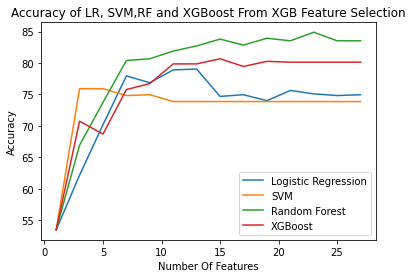

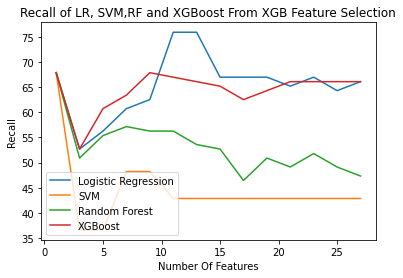

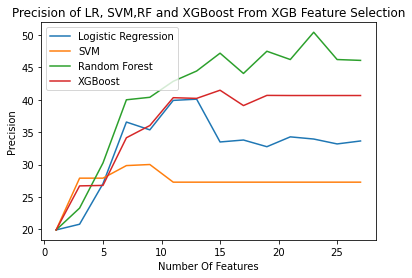

In [36]:
def select_features_XGB(X_train, y_train, X_test,n):
    # configure to select a subset of features
    fs = SelectFromModel(XGBClassifier(n_estimators=100),threshold=-np.inf, max_features=n)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    selected_feat= X_train.columns[(fs.get_support())]
    print(selected_feat)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

acc_LR = []
acc_SVM = []
acc_RF = []
acc_XG = []

rec_LR = []
rec_SVM = []
rec_RF = []
rec_XG = []

pre_LR = []
pre_SVM = []
pre_RF = []
pre_XG = []
for n in range(1,28,2):
    X_train_fs, X_test_fs, fs = select_features_XGB(X_train, y_train, X_test,n)
    # fit the model
    print ("Logistic Regression From XGboost Selection")
    LogReg(X_train_fs, X_test_fs, y_train, y_test, verbose=True, clf=None)
    acc_LR.append(accuracy)
    rec_LR.append(recall)
    pre_LR.append(precision)
    
    print ("SVM From XGboost Selection")
    SVM(X_train_fs, X_test_fs, y_train, y_test, svmtype="SVC", verbose=True, clf=None)
    acc_SVM.append(accuracy)
    rec_SVM.append(recall)
    pre_SVM.append(precision)
    
    print ("RM From XGboost Selection")
    RandomForest(X_train_fs, X_test_fs, y_train, y_test, verbose=True, clf=None)
    acc_RF.append(accuracy)
    rec_RF.append(recall)
    pre_RF.append(precision)
    
    print ("Xgboost From XGboost Selection")
    XgBoost(X_train_fs, X_test_fs, y_train, y_test, verbose=True, clf=None)
    acc_XG.append(accuracy)
    rec_XG.append(recall)
    pre_XG.append(precision)
 

x = [1,3,5,7,9,11,13,15,17,19,21,23,25,27]
y1 = acc_LR
plt.plot(x, y1,label = "Logistic Regression")
y2 = acc_SVM
plt.plot(x, y2,label = "SVM")
y3 = acc_RF
plt.plot(x, y3,label = "Random Forest ")
y4 = acc_XG
plt.plot(x, y4,label = "XGBoost")
plt.xlabel('Number Of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy of LR, SVM,RF and XGBoost From XGB Feature Selection')
plt.legend()
plt.show()



x = [1,3,5,7,9,11,13,15,17,19,21,23,25,27]
y1 = rec_LR
plt.plot(x, y1,label = "Logistic Regression")
y2 = rec_SVM
plt.plot(x, y2,label = "SVM")
y3 = rec_RF
plt.plot(x, y3,label = "Random Forest ")
y4 = rec_XG
plt.plot(x, y4,label = "XGBoost")
plt.xlabel('Number Of Features')
plt.ylabel('Recall')
plt.title('Recall of LR, SVM,RF and XGBoost From XGB Feature Selection')
plt.legend()
plt.show()

x = [1,3,5,7,9,11,13,15,17,19,21,23,25,27]
y1 = pre_LR
plt.plot(x, y1,label = "Logistic Regression")
y2 = pre_SVM
plt.plot(x, y2,label = "SVM")
y3 = pre_RF
plt.plot(x, y3,label = "Random Forest ")
y4 =pre_XG
plt.plot(x, y4,label = "XGBoost")
plt.xlabel('Number Of Features')
plt.ylabel('Precision')
plt.title('Precision of LR, SVM,RF and XGBoost From XGB Feature Selection')
plt.legend()
plt.show()

#### Interpretation 
From the above graphs RF performs well with less features and good precision and accuracy.

- Different Algorithms Predictions Using Recursive Forest Feature Selection

In [37]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

Index(['Income'], dtype='object')
Logistic Regression From RFE Selection


C:\Users\Hp\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       623
           1       0.15      1.00      0.26       112

    accuracy                           0.15       735
   macro avg       0.08      0.50      0.13       735
weighted avg       0.02      0.15      0.04       735


 Accuracy: 
 15.238095238095239

 Precision of event Happening: 
 15.238095238095239

 Recall of event Happening: 
 100.0

 AUC: 
 0.5

 F-Score:
 0.26446280991735543

 Confusion Matrix: 
 [[  0 623]
 [  0 112]]
SVM From RFE Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       623
           1       0.26      0.41      0.32       112

    accuracy                           0.73       735
   macro avg       0.57      0.60      0.58       735
weighted avg       0.79      0.73      0.75       735


 Accuracy: 
 73.19727891156462

 Precision of event Happening: 

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.76      0.82       623
           1       0.24      0.42      0.31       112

    accuracy                           0.71       735
   macro avg       0.56      0.59      0.56       735
weighted avg       0.78      0.71      0.74       735


 Accuracy: 
 71.156462585034

 Precision of event Happening: 
 24.22680412371134

 Recall of event Happening: 
 41.964285714285715

 AUC: 
 0.5918439004815409

 F-Score:
 0.30718954248366015

 Confusion Matrix: 
 [[476 147]
 [ 65  47]]
Index(['Income', 'Recency', 'MntWines'], dtype='object')
Logistic Regression From RFE Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.75      0.82       623
           1       0.29      0.57      0.39       112

    accuracy                           0.72       735
   macro avg       0.60      0.66      0.60       735
weighted avg       0.8

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.76      0.83       623
           1       0.32      0.64      0.43       112

    accuracy                           0.74       735
   macro avg       0.62      0.70      0.63       735
weighted avg       0.83      0.74      0.77       735


 Accuracy: 
 74.01360544217687

 Precision of event Happening: 
 32.28699551569507

 Recall of event Happening: 
 64.28571428571429

 AUC: 
 0.7002407704654896

 F-Score:
 0.4298507462686567

 Confusion Matrix: 
 [[472 151]
 [ 40  72]]
Index(['Income', 'Recency', 'MntWines', 'MntMeatProducts', 'MntGoldProds'], dtype='object')
Logistic Regression From RFE Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.78      0.84       623
           1       0.32      0.57      0.41       112

    accuracy                           0.75       735
   macro avg       0.62      0.68      0.

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.76      0.84       623
           1       0.34      0.71      0.47       112

    accuracy                           0.75       735
   macro avg       0.64      0.74      0.65       735
weighted avg       0.85      0.75      0.78       735


 Accuracy: 
 74.96598639455783

 Precision of event Happening: 
 34.48275862068966

 Recall of event Happening: 
 71.42857142857143

 AUC: 
 0.7351524879614768

 F-Score:
 0.46511627906976755

 Confusion Matrix: 
 [[471 152]
 [ 32  80]]
Index(['Income', 'Recency', 'MntWines', 'MntMeatProducts', 'MntFishProducts',
       'MntGoldProds', 'NumStorePurchases'],
      dtype='object')
Logistic Regression From RFE Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       623
           1       0.38      0.55      0.45       112

    accuracy                           0.

C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       623
           1       0.27      0.43      0.33       112

    accuracy                           0.73       735
   macro avg       0.58      0.61      0.58       735
weighted avg       0.79      0.73      0.76       735


 Accuracy: 
 73.46938775510205

 Precision of event Happening: 
 26.81564245810056

 Recall of event Happening: 
 42.857142857142854

 AUC: 
 0.6091492776886036

 F-Score:
 0.32989690721649484

 Confusion Matrix: 
 [[492 131]
 [ 64  48]]
RM From RFE Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.85      0.88       623
           1       0.41      0.57      0.48       112

    accuracy                           0.81       735
   macro avg       0.66      0.71      0.68       735
weighted avg       0.84      0.81      0.82       735


 Accuracy: 
 80.81632653061224

 Preci

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.81      0.87       623
           1       0.39      0.68      0.50       112

    accuracy                           0.79       735
   macro avg       0.66      0.74      0.68       735
weighted avg       0.85      0.79      0.81       735


 Accuracy: 
 79.04761904761905

 Precision of event Happening: 
 39.175257731958766

 Recall of event Happening: 
 67.85714285714286

 AUC: 
 0.7445826645264847

 F-Score:
 0.49673202614379086

 Confusion Matrix: 
 [[505 118]
 [ 36  76]]
Index(['Year_Birth', 'Income', 'Teenhome', 'Recency', 'MntWines',
       'MntMeatProducts', 'MntFishProducts', 'MntGoldProds',
       'NumStorePurchases'],
      dtype='object')
Logistic Regression From RFE Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.77      0.84       623
           1       0.34      0.68      0.46       112

    acc

C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       623
           1       0.27      0.43      0.33       112

    accuracy                           0.74       735
   macro avg       0.58      0.61      0.59       735
weighted avg       0.79      0.74      0.76       735


 Accuracy: 
 73.87755102040816

 Precision of event Happening: 
 27.27272727272727

 Recall of event Happening: 
 42.857142857142854

 AUC: 
 0.6115569823434992

 F-Score:
 0.33333333333333326

 Confusion Matrix: 
 [[495 128]
 [ 64  48]]
RM From RFE Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       623
           1       0.43      0.48      0.45       112

    accuracy                           0.82       735
   macro avg       0.67      0.68      0.67       735
weighted avg       0.83      0.82      0.83       735


 Accuracy: 
 82.31292517006803

 Preci

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.87       623
           1       0.40      0.63      0.49       112

    accuracy                           0.80       735
   macro avg       0.66      0.73      0.68       735
weighted avg       0.85      0.80      0.82       735


 Accuracy: 
 79.8639455782313

 Precision of event Happening: 
 39.8876404494382

 Recall of event Happening: 
 63.39285714285714

 AUC: 
 0.7310894863563403

 F-Score:
 0.48965517241379314

 Confusion Matrix: 
 [[516 107]
 [ 41  71]]
Index(['Year_Birth', 'Marital_Status', 'Income', 'Teenhome', 'Recency',
       'MntWines', 'MntMeatProducts', 'MntFishProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumStorePurchases'],
      dtype='object')
Logistic Regression From RFE Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.77      0.84       623
           1       0.34   

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.82      0.87       623
           1       0.40      0.64      0.49       112

    accuracy                           0.80       735
   macro avg       0.66      0.73      0.68       735
weighted avg       0.85      0.80      0.81       735


 Accuracy: 
 79.59183673469387

 Precision of event Happening: 
 39.56043956043956

 Recall of event Happening: 
 64.28571428571429

 AUC: 
 0.7331460674157303

 F-Score:
 0.48979591836734687

 Confusion Matrix: 
 [[513 110]
 [ 40  72]]
Index(['Year_Birth', 'Marital_Status', 'Income', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth'],
      dtype='object')
Logistic Regression From RFE Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.75    

C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       623
           1       0.27      0.43      0.33       112

    accuracy                           0.74       735
   macro avg       0.58      0.61      0.59       735
weighted avg       0.79      0.74      0.76       735


 Accuracy: 
 73.87755102040816

 Precision of event Happening: 
 27.27272727272727

 Recall of event Happening: 
 42.857142857142854

 AUC: 
 0.6115569823434992

 F-Score:
 0.33333333333333326

 Confusion Matrix: 
 [[495 128]
 [ 64  48]]
RM From RFE Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       623
           1       0.44      0.50      0.47       112

    accuracy                           0.83       735
   macro avg       0.67      0.69      0.68       735
weighted avg       0.84      0.83      0.83       735


 Accuracy: 
 82.72108843537414

 Preci

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       623
           1       0.41      0.66      0.50       112

    accuracy                           0.80       735
   macro avg       0.67      0.74      0.69       735
weighted avg       0.85      0.80      0.82       735


 Accuracy: 
 80.1360544217687

 Precision of event Happening: 
 40.65934065934066

 Recall of event Happening: 
 66.07142857142857

 AUC: 
 0.7436797752808988

 F-Score:
 0.5034013605442177

 Confusion Matrix: 
 [[515 108]
 [ 38  74]]
Index(['Year_Birth', 'Marital_Status', 'Income', 'Teenhome', 'Dt_Customer',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'],
      dtype='object')
Logistic Regression From RFE Selection
Classification Report:
              precision    recall  f1-score   support

    

C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       623
           1       0.27      0.43      0.33       112

    accuracy                           0.74       735
   macro avg       0.58      0.61      0.59       735
weighted avg       0.79      0.74      0.76       735


 Accuracy: 
 73.87755102040816

 Precision of event Happening: 
 27.27272727272727

 Recall of event Happening: 
 42.857142857142854

 AUC: 
 0.6115569823434992

 F-Score:
 0.33333333333333326

 Confusion Matrix: 
 [[495 128]
 [ 64  48]]
RM From RFE Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       623
           1       0.45      0.49      0.47       112

    accuracy                           0.83       735
   macro avg       0.68      0.69      0.68       735
weighted avg       0.84      0.83      0.83       735


 Accuracy: 
 83.12925170068027

 Preci

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.82      0.87       623
           1       0.41      0.67      0.51       112

    accuracy                           0.80       735
   macro avg       0.67      0.75      0.69       735
weighted avg       0.85      0.80      0.82       735


 Accuracy: 
 80.0

 Precision of event Happening: 
 40.54054054054054

 Recall of event Happening: 
 66.96428571428571

 AUC: 
 0.7465389245585875

 F-Score:
 0.5050505050505051

 Confusion Matrix: 
 [[513 110]
 [ 37  75]]
Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth'],
      dtype='object')
Logistic Regression From RFE Selection
Classification Report:
              precision    r

C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       623
           1       0.27      0.43      0.33       112

    accuracy                           0.74       735
   macro avg       0.58      0.61      0.59       735
weighted avg       0.79      0.74      0.76       735


 Accuracy: 
 73.87755102040816

 Precision of event Happening: 
 27.27272727272727

 Recall of event Happening: 
 42.857142857142854

 AUC: 
 0.6115569823434992

 F-Score:
 0.33333333333333326

 Confusion Matrix: 
 [[495 128]
 [ 64  48]]
RM From RFE Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       623
           1       0.45      0.46      0.45       112

    accuracy                           0.83       735
   macro avg       0.67      0.68      0.68       735
weighted avg       0.83      0.83      0.83       735


 Accuracy: 
 83.12925170068027

 Preci

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       623
           1       0.40      0.63      0.49       112

    accuracy                           0.80       735
   macro avg       0.66      0.73      0.68       735
weighted avg       0.85      0.80      0.82       735


 Accuracy: 
 80.0

 Precision of event Happening: 
 40.11299435028249

 Recall of event Happening: 
 63.39285714285714

 AUC: 
 0.7318920545746388

 F-Score:
 0.4913494809688581

 Confusion Matrix: 
 [[517 106]
 [ 41  71]]
Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp4'],
      dtype='object')
Logistic Regression From RFE Selection
Classification R

C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       623
           1       0.27      0.43      0.33       112

    accuracy                           0.74       735
   macro avg       0.58      0.61      0.59       735
weighted avg       0.79      0.74      0.76       735


 Accuracy: 
 73.87755102040816

 Precision of event Happening: 
 27.27272727272727

 Recall of event Happening: 
 42.857142857142854

 AUC: 
 0.6115569823434992

 F-Score:
 0.33333333333333326

 Confusion Matrix: 
 [[495 128]
 [ 64  48]]
RM From RFE Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       623
           1       0.49      0.46      0.47       112

    accuracy                           0.84       735
   macro avg       0.70      0.69      0.69       735
weighted avg       0.84      0.84      0.84       735


 Accuracy: 
 84.35374149659864

 Preci

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       623
           1       0.40      0.64      0.50       112

    accuracy                           0.80       735
   macro avg       0.67      0.74      0.69       735
weighted avg       0.85      0.80      0.82       735


 Accuracy: 
 80.1360544217687

 Precision of event Happening: 
 40.44943820224719

 Recall of event Happening: 
 64.28571428571429

 AUC: 
 0.7363563402889245

 F-Score:
 0.496551724137931

 Confusion Matrix: 
 [[517 106]
 [ 40  72]]
Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4'],
      dtype='object')
Logistic R

C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       623
           1       0.27      0.43      0.33       112

    accuracy                           0.74       735
   macro avg       0.58      0.61      0.59       735
weighted avg       0.79      0.74      0.76       735


 Accuracy: 
 73.87755102040816

 Precision of event Happening: 
 27.27272727272727

 Recall of event Happening: 
 42.857142857142854

 AUC: 
 0.6115569823434992

 F-Score:
 0.33333333333333326

 Confusion Matrix: 
 [[495 128]
 [ 64  48]]
RM From RFE Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       623
           1       0.49      0.50      0.49       112

    accuracy                           0.84       735
   macro avg       0.70      0.70      0.70       735
weighted avg       0.85      0.84      0.84       735


 Accuracy: 
 84.35374149659864

 Preci

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       623
           1       0.41      0.66      0.50       112

    accuracy                           0.80       735
   macro avg       0.67      0.74      0.69       735
weighted avg       0.85      0.80      0.82       735


 Accuracy: 
 80.1360544217687

 Precision of event Happening: 
 40.65934065934066

 Recall of event Happening: 
 66.07142857142857

 AUC: 
 0.7436797752808988

 F-Score:
 0.5034013605442177

 Confusion Matrix: 
 [[515 108]
 [ 38  74]]
Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1'],

C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.77      0.84       623
           1       0.34      0.67      0.45       112

    accuracy                           0.75       735
   macro avg       0.63      0.72      0.64       735
weighted avg       0.84      0.75      0.78       735


 Accuracy: 
 75.10204081632654

 Precision of event Happening: 
 33.93665158371041

 Recall of event Happening: 
 66.96428571428571

 AUC: 
 0.7176464686998394

 F-Score:
 0.45045045045045046

 Confusion Matrix: 
 [[477 146]
 [ 37  75]]
SVM From RFE Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       623
           1       0.27      0.43      0.33       112

    accuracy                           0.74       735
   macro avg       0.58      0.61      0.59       735
weighted avg       0.79      0.74      0.76       735


 Accuracy: 
 73.87755102040816

 Preci

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       623
           1       0.41      0.66      0.50       112

    accuracy                           0.80       735
   macro avg       0.67      0.74      0.69       735
weighted avg       0.85      0.80      0.82       735


 Accuracy: 
 80.1360544217687

 Precision of event Happening: 
 40.65934065934066

 Recall of event Happening: 
 66.07142857142857

 AUC: 
 0.7436797752808988

 F-Score:
 0.5034013605442177

 Confusion Matrix: 
 [[515 108]
 [ 38  74]]
Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',


C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.77      0.84       623
           1       0.33      0.64      0.44       112

    accuracy                           0.75       735
   macro avg       0.63      0.71      0.64       735
weighted avg       0.83      0.75      0.78       735


 Accuracy: 
 74.82993197278913

 Precision of event Happening: 
 33.17972350230415

 Recall of event Happening: 
 64.28571428571429

 AUC: 
 0.7050561797752809

 F-Score:
 0.4376899696048632

 Confusion Matrix: 
 [[478 145]
 [ 40  72]]
SVM From RFE Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       623
           1       0.27      0.43      0.33       112

    accuracy                           0.74       735
   macro avg       0.58      0.61      0.59       735
weighted avg       0.79      0.74      0.76       735


 Accuracy: 
 73.87755102040816

 Precis

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       623
           1       0.41      0.66      0.50       112

    accuracy                           0.80       735
   macro avg       0.67      0.74      0.69       735
weighted avg       0.85      0.80      0.82       735


 Accuracy: 
 80.1360544217687

 Precision of event Happening: 
 40.65934065934066

 Recall of event Happening: 
 66.07142857142857

 AUC: 
 0.7436797752808988

 F-Score:
 0.5034013605442177

 Confusion Matrix: 
 [[515 108]
 [ 38  74]]
Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',


C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       623
           1       0.27      0.43      0.33       112

    accuracy                           0.74       735
   macro avg       0.58      0.61      0.59       735
weighted avg       0.79      0.74      0.76       735


 Accuracy: 
 73.87755102040816

 Precision of event Happening: 
 27.27272727272727

 Recall of event Happening: 
 42.857142857142854

 AUC: 
 0.6115569823434992

 F-Score:
 0.33333333333333326

 Confusion Matrix: 
 [[495 128]
 [ 64  48]]
RM From RFE Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       623
           1       0.49      0.52      0.50       112

    accuracy                           0.84       735
   macro avg       0.70      0.71      0.71       735
weighted avg       0.85      0.84      0.85       735


 Accuracy: 
 84.48979591836735

 Preci

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       623
           1       0.41      0.66      0.50       112

    accuracy                           0.80       735
   macro avg       0.67      0.74      0.69       735
weighted avg       0.85      0.80      0.82       735


 Accuracy: 
 80.1360544217687

 Precision of event Happening: 
 40.65934065934066

 Recall of event Happening: 
 66.07142857142857

 AUC: 
 0.7436797752808988

 F-Score:
 0.5034013605442177

 Confusion Matrix: 
 [[515 108]
 [ 38  74]]


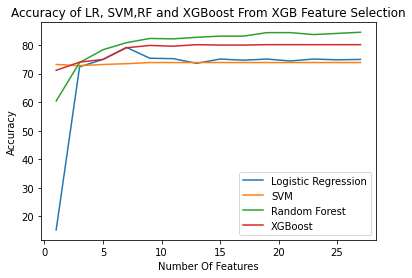

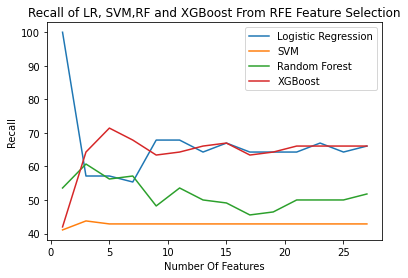

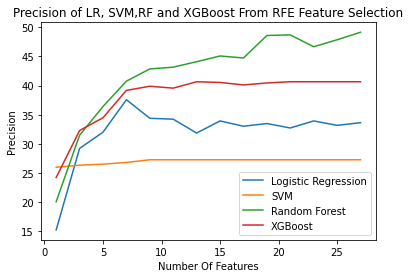

In [38]:
def select_features_RFE(X_train, y_train, X_test,n):
    # configure to select a subset of features
    fs = RFE(estimator = DecisionTreeClassifier(), n_features_to_select = n)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    selected_feat= X_train.columns[(fs.get_support())]
    print(selected_feat)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

acc_LR = []
acc_SVM = []
acc_RF = []
acc_XG = []

rec_LR = []
rec_SVM = []
rec_RF = []
rec_XG = []

pre_LR = []
pre_SVM = []
pre_RF = []
pre_XG = []

for n in range(1,28,2):
    X_train_fs, X_test_fs, fs = select_features_RFE(X_train, y_train, X_test,n)
    # fit the model
    print ("Logistic Regression From RFE Selection")
    LogReg(X_train_fs, X_test_fs, y_train, y_test, verbose=True, clf=None)
    acc_LR.append(accuracy)
    rec_LR.append(recall)
    pre_LR.append(precision)
    
    print ("SVM From RFE Selection")
    SVM(X_train_fs, X_test_fs, y_train, y_test, svmtype="SVC", verbose=True, clf=None)
    acc_SVM.append(accuracy)
    rec_SVM.append(recall)
    pre_SVM.append(precision)
    
    print ("RM From RFE Selection")
    RandomForest(X_train_fs, X_test_fs, y_train, y_test, verbose=True, clf=None)
    acc_RF.append(accuracy)
    rec_RF.append(recall)
    pre_RF.append(precision)
    
    print ("Xgboost From RFE Selection")
    XgBoost(X_train_fs, X_test_fs, y_train, y_test, verbose=True, clf=None)
    acc_XG.append(accuracy)
    rec_XG.append(recall)
    pre_XG.append(precision)

x = [1,3,5,7,9,11,13,15,17,19,21,23,25,27]
y1 = acc_LR
plt.plot(x, y1,label = "Logistic Regression")
y2 = acc_SVM
plt.plot(x, y2,label = "SVM")
y3 = acc_RF
plt.plot(x, y3,label = "Random Forest ")
y4 = acc_XG
plt.plot(x, y4,label = "XGBoost")
plt.xlabel('Number Of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy of LR, SVM,RF and XGBoost From XGB Feature Selection')
plt.legend()
plt.show()



x = [1,3,5,7,9,11,13,15,17,19,21,23,25,27]
y1 = rec_LR
plt.plot(x, y1,label = "Logistic Regression")
y2 = rec_SVM
plt.plot(x, y2,label = "SVM")
y3 = rec_RF
plt.plot(x, y3,label = "Random Forest ")
y4 = rec_XG
plt.plot(x, y4,label = "XGBoost")
plt.xlabel('Number Of Features')
plt.ylabel('Recall')
plt.title('Recall of LR, SVM,RF and XGBoost From RFE Feature Selection')
plt.legend()
plt.show()

x = [1,3,5,7,9,11,13,15,17,19,21,23,25,27]
y1 = pre_LR
plt.plot(x, y1,label = "Logistic Regression")
y2 = pre_SVM
plt.plot(x, y2,label = "SVM")
y3 = pre_RF
plt.plot(x, y3,label = "Random Forest ")
y4 =pre_XG
plt.plot(x, y4,label = "XGBoost")
plt.xlabel('Number Of Features')
plt.ylabel('Precision')
plt.title('Precision of LR, SVM,RF and XGBoost From RFE Feature Selection')
plt.legend()
plt.show()

#### Interpretation
From above graph LR and RF perform well with features greater than 5.

- Different Algorithms Predictions Using Lasso

C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Index(['Teenhome'], dtype='object')
Logistic Regression From L1 Based Feature Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.51      0.65       623
           1       0.20      0.68      0.31       112

    accuracy                           0.53       735
   macro avg       0.55      0.59      0.48       735
weighted avg       0.79      0.53      0.60       735


 Accuracy: 
 53.46938775510204

 Precision of event Happening: 
 19.895287958115183

 Recall of event Happening: 
 67.85714285714286

 AUC: 
 0.5936998394863564

 F-Score:
 0.3076923076923077

 Confusion Matrix: 
 [[317 306]
 [ 36  76]]
SVM From L1 Based Feature Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.51      0.65       623
           1       0.20      0.68      0.31       112

    accuracy                           0.53       735
   macro avg       0.55      0.59      0.48    

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sampl

Index(['Kidhome', 'Teenhome', 'Complain'], dtype='object')
Logistic Regression From L1 Based Feature Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.52      0.66       623
           1       0.20      0.66      0.31       112

    accuracy                           0.54       735
   macro avg       0.55      0.59      0.48       735
weighted avg       0.79      0.54      0.60       735


 Accuracy: 
 54.14965986394557

 Precision of event Happening: 
 19.839142091152816

 Recall of event Happening: 
 66.07142857142857

 AUC: 
 0.5903892455858748

 F-Score:
 0.3051546391752577

 Confusion Matrix: 
 [[324 299]
 [ 38  74]]
SVM From L1 Based Feature Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.77      0.83       623
           1       0.28      0.49      0.35       112

    accuracy                           0.73       735
   macro avg       0.59 

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.77      0.83       623
           1       0.28      0.49      0.35       112

    accuracy                           0.73       735
   macro avg       0.59      0.63      0.59       735
weighted avg       0.80      0.73      0.76       735


 Accuracy: 
 72.78911564625851

 Precision of event Happening: 
 27.77777777777778

 Recall of event Happening: 
 49.107142857142854

 AUC: 
 0.630768459069021

 F-Score:
 0.3548387096774194

 Confusion Matrix: 
 [[480 143]
 [ 57  55]]
Xgboost From L1 Based Feature Selection
[17:44:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification Report:
              precision    recall  f1-sc

C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Index(['Kidhome', 'Teenhome', 'AcceptedCmp4', 'AcceptedCmp2', 'Complain'], dtype='object')
Logistic Regression From L1 Based Feature Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.52      0.66       623
           1       0.19      0.64      0.30       112

    accuracy                           0.54       735
   macro avg       0.54      0.58      0.48       735
weighted avg       0.78      0.54      0.60       735


 Accuracy: 
 53.87755102040816

 Precision of event Happening: 
 19.40700808625337

 Recall of event Happening: 
 64.28571428571429

 AUC: 
 0.5814606741573034

 F-Score:
 0.2981366459627329

 Confusion Matrix: 
 [[324 299]
 [ 40  72]]
SVM From L1 Based Feature Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.77      0.83       623
           1       0.28      0.51      0.36       112

    accuracy                           0.73    

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



 Accuracy: 
 73.33333333333333

 Precision of event Happening: 
 29.61165048543689

 Recall of event Happening: 
 54.46428571428571

 AUC: 
 0.6559490369181381

 F-Score:
 0.38364779874213834

 Confusion Matrix: 
 [[478 145]
 [ 51  61]]


C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Index(['Marital_Status', 'Kidhome', 'Teenhome', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp2', 'Complain'],
      dtype='object')
Logistic Regression From L1 Based Feature Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.63      0.74       623
           1       0.23      0.62      0.34       112

    accuracy                           0.63       735
   macro avg       0.57      0.63      0.54       735
weighted avg       0.80      0.63      0.68       735


 Accuracy: 
 62.857142857142854

 Precision of event Happening: 
 23.25581395348837

 Recall of event Happening: 
 62.5

 AUC: 
 0.6271067415730337

 F-Score:
 0.33898305084745767

 Confusion Matrix: 
 [[392 231]
 [ 42  70]]
SVM From L1 Based Feature Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.58      0.70       623
           1       0.22      0.65      0.33       112

    accurac

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.70      0.79       623
           1       0.26      0.59      0.36       112

    accuracy                           0.69       735
   macro avg       0.58      0.65      0.58       735
weighted avg       0.81      0.69      0.73       735


 Accuracy: 
 68.70748299319727

 Precision of event Happening: 
 26.400000000000002

 Recall of event Happening: 
 58.92857142857143

 AUC: 
 0.646970304975923

 F-Score:
 0.36464088397790057

 Confusion Matrix: 
 [[439 184]
 [ 46  66]]
Index(['Marital_Status', 'Kidhome', 'Teenhome', 'NumDealsPurchases',
       'NumStorePurchases', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp2',
       'Complain'],
      dtype='object')


C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modu

Logistic Regression From L1 Based Feature Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.69      0.78       623
           1       0.25      0.57      0.35       112

    accuracy                           0.67       735
   macro avg       0.57      0.63      0.56       735
weighted avg       0.80      0.67      0.71       735


 Accuracy: 
 67.21088435374149

 Precision of event Happening: 
 24.90272373540856

 Recall of event Happening: 
 57.14285714285714

 AUC: 
 0.6308186195826645

 F-Score:
 0.34688346883468835

 Confusion Matrix: 
 [[430 193]
 [ 48  64]]
SVM From L1 Based Feature Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.67      0.77       623
           1       0.25      0.59      0.35       112

    accuracy                           0.66       735
   macro avg       0.57      0.63      0.56       735
weighted avg       0.80      

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.70      0.79       623
           1       0.27      0.60      0.37       112

    accuracy                           0.69       735
   macro avg       0.59      0.65      0.58       735
weighted avg       0.81      0.69      0.73       735


 Accuracy: 
 68.84353741496598

 Precision of event Happening: 
 26.693227091633464

 Recall of event Happening: 
 59.82142857142857

 AUC: 
 0.6514345906902086

 F-Score:
 0.3691460055096419

 Confusion Matrix: 
 [[439 184]
 [ 45  67]]
Index(['Marital_Status', 'Kidhome', 'Teenhome', 'NumDealsPurchases',
       'NumStorePurchases', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain'],
      dtype='object')
Logistic Regression From L1 Based Feature Selection


C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modu

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.70      0.80       623
           1       0.28      0.65      0.39       112

    accuracy                           0.70       735
   macro avg       0.60      0.68      0.60       735
weighted avg       0.82      0.70      0.74       735


 Accuracy: 
 69.52380952380952

 Precision of event Happening: 
 28.294573643410853

 Recall of event Happening: 
 65.17857142857143

 AUC: 
 0.6774177367576244

 F-Score:
 0.3945945945945946

 Confusion Matrix: 
 [[438 185]
 [ 39  73]]
SVM From L1 Based Feature Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.68      0.78       623
           1       0.26      0.63      0.37       112

    accuracy                           0.67       735
   macro avg       0.59      0.65      0.57       735
weighted avg       0.81      0.67      0.71       735


 Accuracy: 
 66.938775510

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.70      0.79       623
           1       0.27      0.60      0.37       112

    accuracy                           0.69       735
   macro avg       0.59      0.65      0.58       735
weighted avg       0.81      0.69      0.73       735


 Accuracy: 
 68.70748299319727

 Precision of event Happening: 
 26.58730158730159

 Recall of event Happening: 
 59.82142857142857

 AUC: 
 0.6506320224719101

 F-Score:
 0.3681318681318681

 Confusion Matrix: 
 [[438 185]
 [ 45  67]]
Index(['Education', 'Marital_Status', 'Kidhome', 'Teenhome',
       'NumDealsPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain'],
      dtype='object')
Logistic Regression From L1 Based Feature Selection


C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modu

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.71      0.80       623
           1       0.29      0.68      0.41       112

    accuracy                           0.70       735
   macro avg       0.61      0.69      0.61       735
weighted avg       0.83      0.70      0.74       735


 Accuracy: 
 70.34013605442176

 Precision of event Happening: 
 29.457364341085274

 Recall of event Happening: 
 67.85714285714286

 AUC: 
 0.6932182985553772

 F-Score:
 0.4108108108108108

 Confusion Matrix: 
 [[441 182]
 [ 36  76]]
SVM From L1 Based Feature Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.70      0.79       623
           1       0.25      0.57      0.35       112

    accuracy                           0.68       735
   macro avg       0.58      0.63      0.57       735
weighted avg       0.80      0.68      0.72       735


 Accuracy: 
 67.891156462

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.72      0.81       623
           1       0.28      0.61      0.39       112

    accuracy                           0.70       735
   macro avg       0.60      0.66      0.60       735
weighted avg       0.82      0.70      0.74       735


 Accuracy: 
 70.47619047619048

 Precision of event Happening: 
 28.21576763485477

 Recall of event Happening: 
 60.71428571428571

 AUC: 
 0.6647271268057785

 F-Score:
 0.38526912181303113

 Confusion Matrix: 
 [[450 173]
 [ 44  68]]
Index(['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'Recency',
       'NumDealsPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain'],
      dtype='object')
Logistic Regression From L1 Based Feature Selection


C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modu

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.77      0.85       623
           1       0.38      0.78      0.51       112

    accuracy                           0.77       735
   macro avg       0.66      0.77      0.68       735
weighted avg       0.86      0.77      0.80       735


 Accuracy: 
 77.00680272108843

 Precision of event Happening: 
 37.66233766233766

 Recall of event Happening: 
 77.67857142857143

 AUC: 
 0.7728230337078651

 F-Score:
 0.5072886297376094

 Confusion Matrix: 
 [[479 144]
 [ 25  87]]
SVM From L1 Based Feature Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.65      0.77       623
           1       0.29      0.80      0.43       112

    accuracy                           0.67       735
   macro avg       0.62      0.73      0.60       735
weighted avg       0.85      0.67      0.72       735


 Accuracy: 
 67.2108843537

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.76      0.83       623
           1       0.33      0.64      0.43       112

    accuracy                           0.74       735
   macro avg       0.62      0.70      0.63       735
weighted avg       0.83      0.74      0.77       735


 Accuracy: 
 74.28571428571429

 Precision of event Happening: 
 32.57918552036199

 Recall of event Happening: 
 64.28571428571429

 AUC: 
 0.7018459069020867

 F-Score:
 0.43243243243243246

 Confusion Matrix: 
 [[474 149]
 [ 40  72]]
Index(['Year_Birth', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome',
       'Recency', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain'],
      dtype='object')
Logistic Regression From L1 Based Feature Selection


C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modu

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.76      0.84       623
           1       0.35      0.74      0.48       112

    accuracy                           0.75       735
   macro avg       0.65      0.75      0.66       735
weighted avg       0.85      0.75      0.78       735


 Accuracy: 
 75.37414965986395

 Precision of event Happening: 
 35.319148936170215

 Recall of event Happening: 
 74.10714285714286

 AUC: 
 0.748545345104334

 F-Score:
 0.47838616714697413

 Confusion Matrix: 
 [[471 152]
 [ 29  83]]
SVM From L1 Based Feature Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.56      0.70       623
           1       0.23      0.75      0.36       112

    accuracy                           0.59       735
   macro avg       0.58      0.65      0.53       735
weighted avg       0.82      0.59      0.64       735


 Accuracy: 
 58.639455782

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.76      0.84       623
           1       0.33      0.67      0.45       112

    accuracy                           0.75       735
   macro avg       0.63      0.72      0.64       735
weighted avg       0.84      0.75      0.78       735


 Accuracy: 
 74.6938775510204

 Precision of event Happening: 
 33.482142857142854

 Recall of event Happening: 
 66.96428571428571

 AUC: 
 0.7152387640449439

 F-Score:
 0.44642857142857145

 Confusion Matrix: 
 [[474 149]
 [ 37  75]]
Index(['Year_Birth', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome',
       'Recency', 'MntFishProducts', 'MntSweetProducts', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain'],
      dtype='object')
Logistic Regression From L1 Based Featu

C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modu

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.73      0.81       623
           1       0.31      0.68      0.42       112

    accuracy                           0.72       735
   macro avg       0.62      0.70      0.62       735
weighted avg       0.83      0.72      0.75       735


 Accuracy: 
 71.83673469387755

 Precision of event Happening: 
 30.76923076923077

 Recall of event Happening: 
 67.85714285714286

 AUC: 
 0.7020465489566613

 F-Score:
 0.4233983286908078

 Confusion Matrix: 
 [[452 171]
 [ 36  76]]
SVM From L1 Based Feature Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       623
           1       0.26      0.39      0.32       112

    accuracy                           0.74       735
   macro avg       0.57      0.60      0.58       735
weighted avg       0.79      0.74      0.76       735


 Accuracy: 
 74.0136054421

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.76      0.84       623
           1       0.33      0.64      0.44       112

    accuracy                           0.75       735
   macro avg       0.63      0.70      0.64       735
weighted avg       0.83      0.75      0.77       735


 Accuracy: 
 74.5578231292517

 Precision of event Happening: 
 32.87671232876712

 Recall of event Happening: 
 64.28571428571429

 AUC: 
 0.7034510433386838

 F-Score:
 0.43504531722054385

 Confusion Matrix: 
 [[476 147]
 [ 40  72]]
Index(['Year_Birth', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntFishProducts',
       'MntSweetProducts', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain'],
      dtype='object')
Logistic

C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modu

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.79      0.86       623
           1       0.38      0.72      0.50       112

    accuracy                           0.78       735
   macro avg       0.66      0.75      0.68       735
weighted avg       0.85      0.78      0.80       735


 Accuracy: 
 77.68707482993197

 Precision of event Happening: 
 37.850467289719624

 Recall of event Happening: 
 72.32142857142857

 AUC: 
 0.754865569823435

 F-Score:
 0.4969325153374233

 Confusion Matrix: 
 [[490 133]
 [ 31  81]]
SVM From L1 Based Feature Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       623
           1       0.28      0.45      0.34       112

    accuracy                           0.74       735
   macro avg       0.58      0.62      0.59       735
weighted avg       0.80      0.74      0.76       735


 Accuracy: 
 74.1496598639

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.80      0.85       623
           1       0.34      0.58      0.43       112

    accuracy                           0.76       735
   macro avg       0.63      0.69      0.64       735
weighted avg       0.83      0.76      0.79       735


 Accuracy: 
 76.32653061224491

 Precision of event Happening: 
 33.85416666666667

 Recall of event Happening: 
 58.03571428571429

 AUC: 
 0.6882524077046548

 F-Score:
 0.4276315789473684

 Confusion Matrix: 
 [[496 127]
 [ 47  65]]
Index(['Year_Birth', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       '

C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modu

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.81      0.87       623
           1       0.39      0.70      0.50       112

    accuracy                           0.79       735
   macro avg       0.66      0.75      0.68       735
weighted avg       0.85      0.79      0.81       735


 Accuracy: 
 78.91156462585033

 Precision of event Happening: 
 39.19597989949749

 Recall of event Happening: 
 69.64285714285714

 AUC: 
 0.7511035313001605

 F-Score:
 0.5016077170418006

 Confusion Matrix: 
 [[502 121]
 [ 34  78]]
SVM From L1 Based Feature Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.82      0.85       623
           1       0.31      0.46      0.37       112

    accuracy                           0.76       735
   macro avg       0.60      0.64      0.61       735
weighted avg       0.80      0.76      0.78       735


 Accuracy: 
 76.3265306122

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.81      0.86       623
           1       0.37      0.62      0.47       112

    accuracy                           0.78       735
   macro avg       0.65      0.72      0.67       735
weighted avg       0.84      0.78      0.80       735


 Accuracy: 
 78.36734693877551

 Precision of event Happening: 
 37.4331550802139

 Recall of event Happening: 
 62.5

 AUC: 
 0.718599518459069

 F-Score:
 0.4682274247491639

 Confusion Matrix: 
 [[506 117]
 [ 42  70]]
Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'Accept

C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modu

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.77      0.84       623
           1       0.33      0.64      0.44       112

    accuracy                           0.75       735
   macro avg       0.63      0.71      0.64       735
weighted avg       0.83      0.75      0.78       735


 Accuracy: 
 74.82993197278913

 Precision of event Happening: 
 33.17972350230415

 Recall of event Happening: 
 64.28571428571429

 AUC: 
 0.7050561797752809

 F-Score:
 0.4376899696048632

 Confusion Matrix: 
 [[478 145]
 [ 40  72]]
SVM From L1 Based Feature Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       623
           1       0.27      0.43      0.33       112

    accuracy                           0.74       735
   macro avg       0.58      0.61      0.59       735
weighted avg       0.79      0.74      0.76       735


 Accuracy: 
 73.8775510204

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       623
           1       0.41      0.66      0.50       112

    accuracy                           0.80       735
   macro avg       0.67      0.74      0.69       735
weighted avg       0.85      0.80      0.82       735


 Accuracy: 
 80.1360544217687

 Precision of event Happening: 
 40.65934065934066

 Recall of event Happening: 
 66.07142857142857

 AUC: 
 0.7436797752808988

 F-Score:
 0.5034013605442177

 Confusion Matrix: 
 [[515 108]
 [ 38  74]]
Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',


C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modu

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.77      0.84       623
           1       0.34      0.66      0.45       112

    accuracy                           0.75       735
   macro avg       0.63      0.71      0.64       735
weighted avg       0.84      0.75      0.78       735


 Accuracy: 
 74.96598639455783

 Precision of event Happening: 
 33.63636363636363

 Recall of event Happening: 
 66.07142857142857

 AUC: 
 0.7131821829855537

 F-Score:
 0.44578313253012053

 Confusion Matrix: 
 [[477 146]
 [ 38  74]]
SVM From L1 Based Feature Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       623
           1       0.27      0.43      0.33       112

    accuracy                           0.74       735
   macro avg       0.58      0.61      0.59       735
weighted avg       0.79      0.74      0.76       735


 Accuracy: 
 73.877551020

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       623
           1       0.41      0.66      0.50       112

    accuracy                           0.80       735
   macro avg       0.67      0.74      0.69       735
weighted avg       0.85      0.80      0.82       735


 Accuracy: 
 80.1360544217687

 Precision of event Happening: 
 40.65934065934066

 Recall of event Happening: 
 66.07142857142857

 AUC: 
 0.7436797752808988

 F-Score:
 0.5034013605442177

 Confusion Matrix: 
 [[515 108]
 [ 38  74]]


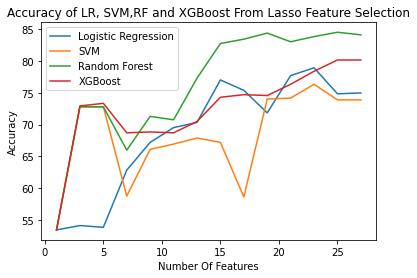

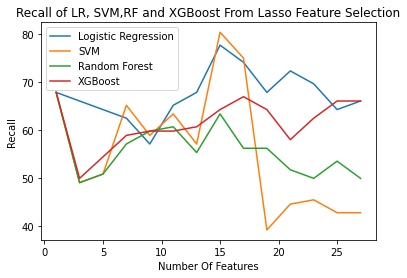

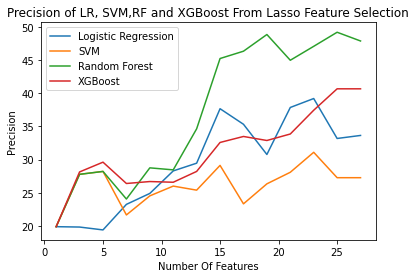

In [40]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV


def select_features_Lasso(X_train, y_train, X_test,n):
    # configure to select a subset of features
    # Use L1 penalty
    estimator = LassoCV(cv=5, normalize = True)
    fs = SelectFromModel(estimator,threshold=-np.inf, max_features=n)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    selected_feat= X_train.columns[(fs.get_support())]
    print(selected_feat)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

acc_LR = []
acc_SVM = []
acc_RF = []
acc_XG = []

rec_LR = []
rec_SVM = []
rec_RF = []
rec_XG = []

pre_LR = []
pre_SVM = []
pre_RF = []
pre_XG = []


# feature selection
for n in range(1,28,2):
    X_train_fs, X_test_fs, fs = select_features_Lasso(X_train, y_train, X_test,n)
    # fit the model
    print ("Logistic Regression From L1 Based Feature Selection")
    LogReg(X_train_fs, X_test_fs, y_train, y_test, verbose=True, clf=None)
    acc_LR.append(accuracy)
    rec_LR.append(recall)
    pre_LR.append(precision)
    
    print ("SVM From L1 Based Feature Selection")
    SVM(X_train_fs, X_test_fs, y_train, y_test, svmtype="SVC", verbose=True, clf=None)
    acc_SVM.append(accuracy)
    rec_SVM.append(recall)
    pre_SVM.append(precision)
    
    print ("RM From L1 Based Feature Selection")
    RandomForest(X_train_fs, X_test_fs, y_train, y_test, verbose=True, clf=None)
    acc_RF.append(accuracy)
    rec_RF.append(recall)
    pre_RF.append(precision)
    
    print ("Xgboost From L1 Based Feature Selection")
    XgBoost(X_train_fs, X_test_fs, y_train, y_test, verbose=True, clf=None)
    acc_XG.append(accuracy)
    rec_XG.append(recall)
    pre_XG.append(precision)

    
x = [1,3,5,7,9,11,13,15,17,19,21,23,25,27]
y1 = acc_LR
plt.plot(x, y1,label = "Logistic Regression")
y2 = acc_SVM
plt.plot(x, y2,label = "SVM")
y3 = acc_RF
plt.plot(x, y3,label = "Random Forest ")
y4 = acc_XG
plt.plot(x, y4,label = "XGBoost")
plt.xlabel('Number Of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy of LR, SVM,RF and XGBoost From Lasso Feature Selection')
plt.legend()
plt.show()



x = [1,3,5,7,9,11,13,15,17,19,21,23,25,27]
y1 = rec_LR
plt.plot(x, y1,label = "Logistic Regression")
y2 = rec_SVM
plt.plot(x, y2,label = "SVM")
y3 = rec_RF
plt.plot(x, y3,label = "Random Forest ")
y4 = rec_XG
plt.plot(x, y4,label = "XGBoost")
plt.xlabel('Number Of Features')
plt.ylabel('Recall')
plt.title('Recall of LR, SVM,RF and XGBoost From Lasso Feature Selection')
plt.legend()
plt.show()

x = [1,3,5,7,9,11,13,15,17,19,21,23,25,27]
y1 = pre_LR
plt.plot(x, y1,label = "Logistic Regression")
y2 = pre_SVM
plt.plot(x, y2,label = "SVM")
y3 = pre_RF
plt.plot(x, y3,label = "Random Forest ")
y4 =pre_XG
plt.plot(x, y4,label = "XGBoost")
plt.xlabel('Number Of Features')
plt.ylabel('Precision')
plt.title('Precision of LR, SVM,RF and XGBoost From Lasso Feature Selection')
plt.legend()
plt.show()

#### Interpretation
From above graph it shows xgboost performs well with less features and LR performs well with features greater than 5

- Different Algorithms Predictions Using PCA

[2.69106475e-01 8.39018785e-02 6.96650657e-02 5.55051061e-02
 4.40119124e-02 4.22411733e-02 4.09717677e-02 3.98478822e-02
 3.95618177e-02 3.56046526e-02 3.39954235e-02 2.90167473e-02
 2.56834650e-02 2.41715933e-02 2.36621002e-02 2.16212240e-02
 2.12398619e-02 1.77830028e-02 1.66047618e-02 1.54382692e-02
 1.45835015e-02 1.25564350e-02 1.01918658e-02 7.70840608e-03
 5.32561152e-03 1.11971517e-33 1.11971517e-33]


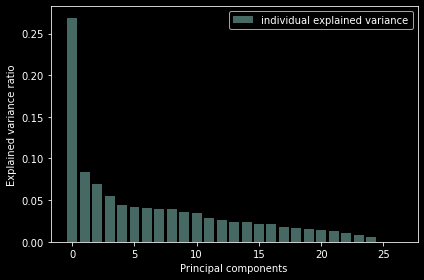

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))
    plt.bar(range(X_train.shape[1]), explained_variance, alpha=0.5, align='center',label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

Explained Variance Ratio of  1  Components:
[0.03705159]


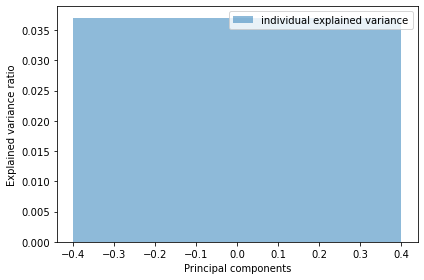

Logistic Regression From PCA
Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       623
           1       0.00      0.00      0.00       112

    accuracy                           0.85       735
   macro avg       0.42      0.50      0.46       735
weighted avg       0.72      0.85      0.78       735


 Accuracy: 
 84.76190476190476

 Precision of event Happening: 
 0.0

 Recall of event Happening: 
 0.0

 AUC: 
 0.5

 F-Score:
 0.0

 Confusion Matrix: 
 [[623   0]
 [112   0]]
SVM From PCA
Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       623
           1       0.00      0.00      0.00       112

    accuracy                           0.85       735
   macro avg       0.42      0.50      0.46       735
weighted avg       0.72      0.85      0.78       735


 Accuracy: 
 84.76190476190476

 Precision of event Happening: 
 0.0

 Recall 

C:\Users\Hp\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda\lib\site-packages\sklearn\metrics\_classificat

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       623
           1       0.23      0.19      0.21       112

    accuracy                           0.78       735
   macro avg       0.54      0.54      0.54       735
weighted avg       0.76      0.78      0.77       735


 Accuracy: 
 78.0952380952381

 Precision of event Happening: 
 23.076923076923077

 Recall of event Happening: 
 18.75

 AUC: 
 0.5375702247191011

 F-Score:
 0.20689655172413793

 Confusion Matrix: 
 [[553  70]
 [ 91  21]]
Xgboost From PCA
[17:46:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       623
           1       0.35      0.07      0.12       112

    accuracy                           0.84       735
   macro avg       0.60      0.52      0.51       735
weighted avg       0.78      0.84      0.79       735


 Accuracy: 
 83.80952380952381

 Precision of event Happening: 
 34.78260869565217

 Recall of event Happening: 
 7.142857142857142

 AUC: 
 0.5236757624398073

 F-Score:
 0.11851851851851852

 Confusion Matrix: 
 [[608  15]
 [104   8]]
Explained Variance Ratio of  3  Components:
[0.03705206 0.03703704 0.03703704]


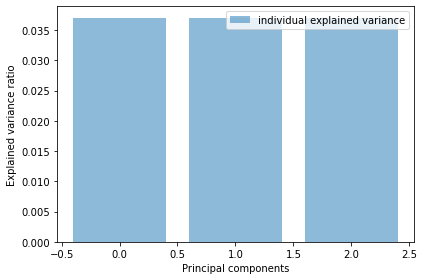

Logistic Regression From PCA
Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       623
           1       1.00      0.03      0.05       112

    accuracy                           0.85       735
   macro avg       0.93      0.51      0.49       735
weighted avg       0.87      0.85      0.79       735


 Accuracy: 
 85.17006802721089

 Precision of event Happening: 
 100.0

 Recall of event Happening: 
 2.6785714285714284

 AUC: 
 0.5133928571428571

 F-Score:
 0.052173913043478265

 Confusion Matrix: 
 [[623   0]
 [109   3]]
SVM From PCA
Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       623
           1       0.71      0.04      0.08       112

    accuracy                           0.85       735
   macro avg       0.78      0.52      0.50       735
weighted avg       0.83      0.85      0.79       735


 Accuracy: 
 85.1700680272108

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       623
           1       0.52      0.10      0.17       112

    accuracy                           0.85       735
   macro avg       0.69      0.54      0.54       735
weighted avg       0.81      0.85      0.80       735


 Accuracy: 
 84.89795918367346

 Precision of event Happening: 
 52.38095238095239

 Recall of event Happening: 
 9.821428571428571

 AUC: 
 0.5410814606741573

 F-Score:
 0.16541353383458646

 Confusion Matrix: 
 [[613  10]
 [101  11]]
Explained Variance Ratio of  5  Components:
[0.03705103 0.03703704 0.03703704 0.03703704 0.03703704]


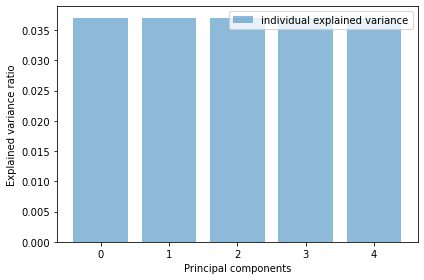

Logistic Regression From PCA
Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       623
           1       1.00      0.01      0.02       112

    accuracy                           0.85       735
   macro avg       0.92      0.50      0.47       735
weighted avg       0.87      0.85      0.78       735


 Accuracy: 
 84.89795918367346

 Precision of event Happening: 
 100.0

 Recall of event Happening: 
 0.8928571428571428

 AUC: 
 0.5044642857142857

 F-Score:
 0.017699115044247787

 Confusion Matrix: 
 [[623   0]
 [111   1]]
SVM From PCA
Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       623
           1       0.67      0.04      0.07       112

    accuracy                           0.85       735
   macro avg       0.76      0.52      0.49       735
weighted avg       0.82      0.85      0.79       735


 Accuracy: 
 85.0340136054421

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       623
           1       0.35      0.07      0.12       112

    accuracy                           0.84       735
   macro avg       0.60      0.52      0.51       735
weighted avg       0.78      0.84      0.79       735


 Accuracy: 
 83.80952380952381

 Precision of event Happening: 
 34.78260869565217

 Recall of event Happening: 
 7.142857142857142

 AUC: 
 0.5236757624398073

 F-Score:
 0.11851851851851852

 Confusion Matrix: 
 [[608  15]
 [104   8]]
Explained Variance Ratio of  7  Components:
[0.03705407 0.03703704 0.03703704 0.03703704 0.03703704 0.03703704
 0.03703704]


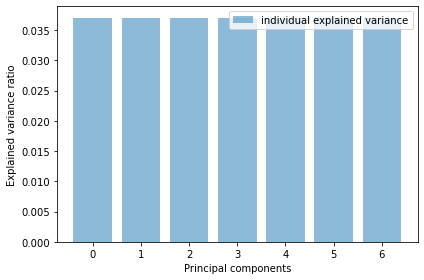

Logistic Regression From PCA
Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       623
           1       0.67      0.02      0.03       112

    accuracy                           0.85       735
   macro avg       0.76      0.51      0.48       735
weighted avg       0.82      0.85      0.78       735


 Accuracy: 
 84.89795918367346

 Precision of event Happening: 
 66.66666666666666

 Recall of event Happening: 
 1.7857142857142856

 AUC: 
 0.5081260032102728

 F-Score:
 0.034782608695652174

 Confusion Matrix: 
 [[622   1]
 [110   2]]
SVM From PCA
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       623
           1       0.80      0.14      0.24       112

    accuracy                           0.86       735
   macro avg       0.83      0.57      0.58       735
weighted avg       0.86      0.86      0.82       735


 Accuracy: 
 86.3

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       623
           1       0.52      0.21      0.29       112

    accuracy                           0.85       735
   macro avg       0.70      0.59      0.61       735
weighted avg       0.82      0.85      0.82       735


 Accuracy: 
 85.03401360544217

 Precision of event Happening: 
 52.27272727272727

 Recall of event Happening: 
 20.535714285714285

 AUC: 
 0.5858246388443017

 F-Score:
 0.2948717948717949

 Confusion Matrix: 
 [[602  21]
 [ 89  23]]
Explained Variance Ratio of  9  Components:
[0.0370565  0.03703704 0.03703704 0.03703704 0.03703704 0.03703704
 0.03703704 0.03703704 0.03703704]


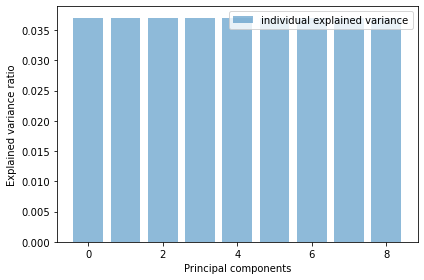

Logistic Regression From PCA
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       623
           1       0.54      0.06      0.11       112

    accuracy                           0.85       735
   macro avg       0.70      0.53      0.51       735
weighted avg       0.81      0.85      0.79       735


 Accuracy: 
 84.89795918367346

 Precision of event Happening: 
 53.84615384615385

 Recall of event Happening: 
 6.25

 AUC: 
 0.5264345906902087

 F-Score:
 0.112

 Confusion Matrix: 
 [[617   6]
 [105   7]]
SVM From PCA
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       623
           1       1.00      0.06      0.12       112

    accuracy                           0.86       735
   macro avg       0.93      0.53      0.52       735
weighted avg       0.88      0.86      0.80       735


 Accuracy: 
 85.71428571428571

 Precision of 

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       623
           1       0.63      0.26      0.37       112

    accuracy                           0.86       735
   macro avg       0.75      0.62      0.65       735
weighted avg       0.84      0.86      0.84       735


 Accuracy: 
 86.39455782312925

 Precision of event Happening: 
 63.04347826086957

 Recall of event Happening: 
 25.892857142857146

 AUC: 
 0.6158206260032102

 F-Score:
 0.3670886075949367

 Confusion Matrix: 
 [[606  17]
 [ 83  29]]
Explained Variance Ratio of  11  Components:
[0.03705605 0.03703704 0.03703704 0.03703704 0.03703704 0.03703704
 0.03703704 0.03703704 0.03703704 0.03703704 0.03703704]


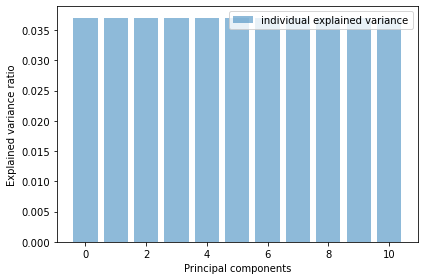

Logistic Regression From PCA
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.92       623
           1       0.70      0.17      0.27       112

    accuracy                           0.86       735
   macro avg       0.79      0.58      0.60       735
weighted avg       0.84      0.86      0.82       735


 Accuracy: 
 86.25850340136054

 Precision of event Happening: 
 70.37037037037037

 Recall of event Happening: 
 16.964285714285715

 AUC: 
 0.5784008828250402

 F-Score:
 0.2733812949640288

 Confusion Matrix: 
 [[615   8]
 [ 93  19]]
SVM From PCA
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.92       623
           1       0.69      0.18      0.28       112

    accuracy                           0.86       735
   macro avg       0.78      0.58      0.60       735
weighted avg       0.84      0.86      0.83       735


 Accuracy: 
 86.258

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       623
           1       0.68      0.29      0.40       112

    accuracy                           0.87       735
   macro avg       0.78      0.63      0.67       735
weighted avg       0.85      0.87      0.85       735


 Accuracy: 
 87.07482993197279

 Precision of event Happening: 
 68.08510638297872

 Recall of event Happening: 
 28.57142857142857

 AUC: 
 0.6308186195826645

 F-Score:
 0.4025157232704402

 Confusion Matrix: 
 [[608  15]
 [ 80  32]]
Explained Variance Ratio of  13  Components:
[0.03706379 0.03703704 0.03703704 0.03703704 0.03703704 0.03703704
 0.03703704 0.03703704 0.03703704 0.03703704 0.03703704 0.03703704
 0.03703704]


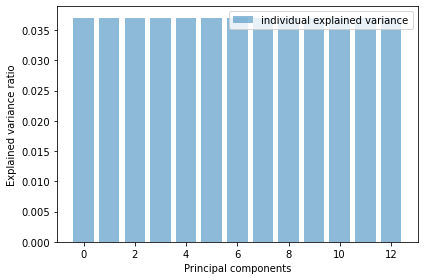

Logistic Regression From PCA
Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       623
           1       0.60      0.03      0.05       112

    accuracy                           0.85       735
   macro avg       0.73      0.51      0.48       735
weighted avg       0.81      0.85      0.79       735


 Accuracy: 
 84.89795918367346

 Precision of event Happening: 
 60.0

 Recall of event Happening: 
 2.6785714285714284

 AUC: 
 0.51178772070626

 F-Score:
 0.05128205128205128

 Confusion Matrix: 
 [[621   2]
 [109   3]]
SVM From PCA
Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       623
           1       0.86      0.05      0.10       112

    accuracy                           0.85       735
   macro avg       0.86      0.53      0.51       735
weighted avg       0.85      0.85      0.80       735


 Accuracy: 
 85.4421768707483

 P

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       623
           1       0.53      0.18      0.27       112

    accuracy                           0.85       735
   macro avg       0.70      0.57      0.59       735
weighted avg       0.82      0.85      0.82       735


 Accuracy: 
 85.03401360544217

 Precision of event Happening: 
 52.63157894736842

 Recall of event Happening: 
 17.857142857142858

 AUC: 
 0.5748394863563403

 F-Score:
 0.26666666666666666

 Confusion Matrix: 
 [[605  18]
 [ 92  20]]
Explained Variance Ratio of  15  Components:
[0.03706292 0.03703704 0.03703704 0.03703704 0.03703704 0.03703704
 0.03703704 0.03703704 0.03703704 0.03703704 0.03703704 0.03703704
 0.03703704 0.03703704 0.03703704]


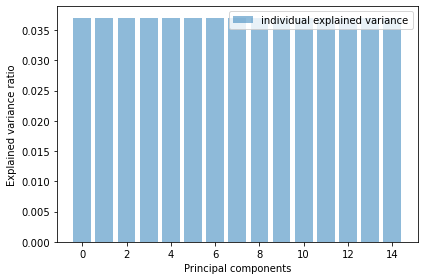

Logistic Regression From PCA
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       623
           1       0.75      0.08      0.15       112

    accuracy                           0.86       735
   macro avg       0.80      0.54      0.53       735
weighted avg       0.84      0.86      0.80       735


 Accuracy: 
 85.578231292517

 Precision of event Happening: 
 75.0

 Recall of event Happening: 
 8.035714285714286

 AUC: 
 0.5377708667736757

 F-Score:
 0.14516129032258066

 Confusion Matrix: 
 [[620   3]
 [103   9]]
SVM From PCA
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       623
           1       0.79      0.17      0.28       112

    accuracy                           0.87       735
   macro avg       0.83      0.58      0.60       735
weighted avg       0.86      0.87      0.83       735


 Accuracy: 
 86.66666666666667

 P

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.91       623
           1       0.49      0.18      0.26       112

    accuracy                           0.85       735
   macro avg       0.68      0.57      0.59       735
weighted avg       0.81      0.85      0.81       735


 Accuracy: 
 84.62585034013605

 Precision of event Happening: 
 48.78048780487805

 Recall of event Happening: 
 17.857142857142858

 AUC: 
 0.5724317817014447

 F-Score:
 0.26143790849673204

 Confusion Matrix: 
 [[602  21]
 [ 92  20]]
Explained Variance Ratio of  17  Components:
[0.03706552 0.03703704 0.03703704 0.03703704 0.03703704 0.03703704
 0.03703704 0.03703704 0.03703704 0.03703704 0.03703704 0.03703704
 0.03703704 0.03703704 0.03703704 0.03703704 0.03703704]


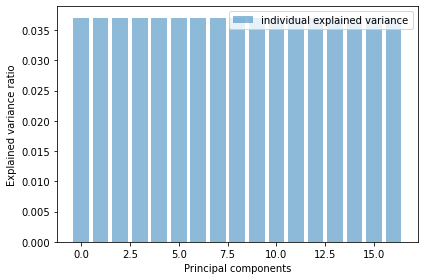

Logistic Regression From PCA
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       623
           1       0.75      0.19      0.30       112

    accuracy                           0.87       735
   macro avg       0.81      0.59      0.61       735
weighted avg       0.85      0.87      0.83       735


 Accuracy: 
 86.66666666666667

 Precision of event Happening: 
 75.0

 Recall of event Happening: 
 18.75

 AUC: 
 0.5881320224719101

 F-Score:
 0.3

 Confusion Matrix: 
 [[616   7]
 [ 91  21]]
SVM From PCA
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       623
           1       0.87      0.12      0.20       112

    accuracy                           0.86       735
   macro avg       0.86      0.56      0.56       735
weighted avg       0.86      0.86      0.82       735


 Accuracy: 
 86.25850340136054

 Precision of event Happenin

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       623
           1       0.69      0.29      0.41       112

    accuracy                           0.87       735
   macro avg       0.79      0.64      0.67       735
weighted avg       0.85      0.87      0.85       735


 Accuracy: 
 87.21088435374149

 Precision of event Happening: 
 68.75

 Recall of event Happening: 
 29.464285714285715

 AUC: 
 0.6352829052969502

 F-Score:
 0.41250000000000003

 Confusion Matrix: 
 [[608  15]
 [ 79  33]]
Explained Variance Ratio of  19  Components:
[0.03706552 0.03703704 0.03703704 0.03703704 0.03703704 0.03703704
 0.03703704 0.03703704 0.03703704 0.03703704 0.03703704 0.03703704
 0.03703704 0.03703704 0.03703704 0.03703704 0.03703704 0.03703704
 0.03703704]


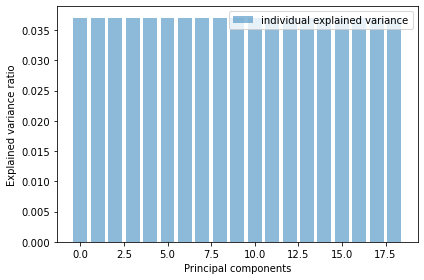

Logistic Regression From PCA
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       623
           1       0.75      0.29      0.42       112

    accuracy                           0.88       735
   macro avg       0.82      0.64      0.68       735
weighted avg       0.86      0.88      0.85       735


 Accuracy: 
 87.75510204081633

 Precision of event Happening: 
 75.0

 Recall of event Happening: 
 29.464285714285715

 AUC: 
 0.6384931781701445

 F-Score:
 0.423076923076923

 Confusion Matrix: 
 [[612  11]
 [ 79  33]]
SVM From PCA
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       623
           1       0.89      0.22      0.36       112

    accuracy                           0.88       735
   macro avg       0.88      0.61      0.64       735
weighted avg       0.88      0.88      0.84       735


 Accuracy: 
 87.75510204081633

 

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       623
           1       0.69      0.32      0.44       112

    accuracy                           0.87       735
   macro avg       0.79      0.65      0.68       735
weighted avg       0.86      0.87      0.85       735


 Accuracy: 
 87.48299319727892

 Precision of event Happening: 
 69.23076923076923

 Recall of event Happening: 
 32.142857142857146

 AUC: 
 0.6478731942215088

 F-Score:
 0.4390243902439025

 Confusion Matrix: 
 [[607  16]
 [ 76  36]]
Explained Variance Ratio of  21  Components:
[0.03706552 0.03703704 0.03703704 0.03703704 0.03703704 0.03703704
 0.03703704 0.03703704 0.03703704 0.03703704 0.03703704 0.03703704
 0.03703704 0.03703704 0.03703704 0.03703704 0.03703704 0.03703704
 0.03703704 0.03703704 0.03703704]


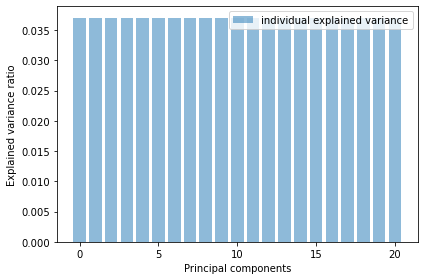

Logistic Regression From PCA
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       623
           1       0.71      0.32      0.44       112

    accuracy                           0.88       735
   macro avg       0.80      0.65      0.69       735
weighted avg       0.86      0.88      0.86       735


 Accuracy: 
 87.61904761904762

 Precision of event Happening: 
 70.58823529411765

 Recall of event Happening: 
 32.142857142857146

 AUC: 
 0.6486757624398073

 F-Score:
 0.44171779141104295

 Confusion Matrix: 
 [[608  15]
 [ 76  36]]
SVM From PCA
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       623
           1       0.82      0.16      0.27       112

    accuracy                           0.87       735
   macro avg       0.84      0.58      0.60       735
weighted avg       0.86      0.87      0.83       735


 Accuracy: 
 86.66

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       623
           1       0.53      0.29      0.37       112

    accuracy                           0.85       735
   macro avg       0.71      0.62      0.64       735
weighted avg       0.83      0.85      0.83       735


 Accuracy: 
 85.3061224489796

 Precision of event Happening: 
 53.333333333333336

 Recall of event Happening: 
 28.57142857142857

 AUC: 
 0.6203852327447832

 F-Score:
 0.37209302325581395

 Confusion Matrix: 
 [[595  28]
 [ 80  32]]
Explained Variance Ratio of  23  Components:
[0.03706552 0.03703704 0.03703704 0.03703704 0.03703704 0.03703704
 0.03703704 0.03703704 0.03703704 0.03703704 0.03703704 0.03703704
 0.03703704 0.03703704 0.03703704 0.03703704 0.03703704 0.03703704
 0.03703704 0.03703704 0.03703704 0.03703704 0.03703704]


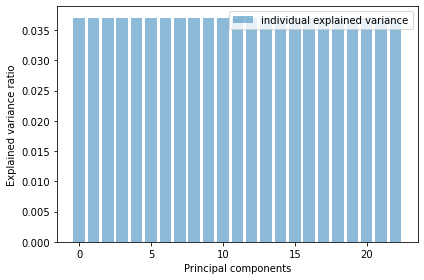

Logistic Regression From PCA
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.94       623
           1       0.78      0.35      0.48       112

    accuracy                           0.89       735
   macro avg       0.84      0.67      0.71       735
weighted avg       0.88      0.89      0.87       735


 Accuracy: 
 88.57142857142857

 Precision of event Happening: 
 78.0

 Recall of event Happening: 
 34.82142857142857

 AUC: 
 0.6652788924558587

 F-Score:
 0.48148148148148145

 Confusion Matrix: 
 [[612  11]
 [ 73  39]]
SVM From PCA
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       623
           1       0.81      0.23      0.36       112

    accuracy                           0.87       735
   macro avg       0.85      0.61      0.65       735
weighted avg       0.87      0.87      0.84       735


 Accuracy: 
 87.48299319727892



C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       623
           1       0.70      0.36      0.47       112

    accuracy                           0.88       735
   macro avg       0.80      0.66      0.70       735
weighted avg       0.86      0.88      0.86       735


 Accuracy: 
 87.89115646258503

 Precision of event Happening: 
 70.17543859649122

 Recall of event Happening: 
 35.714285714285715

 AUC: 
 0.6649277688603531

 F-Score:
 0.47337278106508873

 Confusion Matrix: 
 [[606  17]
 [ 72  40]]
Explained Variance Ratio of  25  Components:
[0.03706552 0.03703704 0.03703704 0.03703704 0.03703704 0.03703704
 0.03703704 0.03703704 0.03703704 0.03703704 0.03703704 0.03703704
 0.03703704 0.03703704 0.03703704 0.03703704 0.03703704 0.03703704
 0.03703704 0.03703704 0.03703704 0.03703704 0.03703704 0.03703704
 0.03703704]


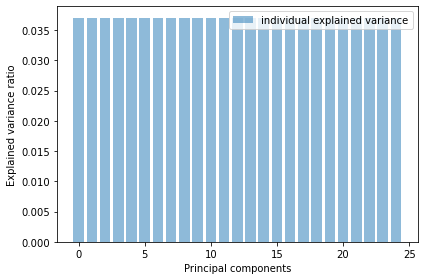

Logistic Regression From PCA
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       623
           1       0.78      0.42      0.55       112

    accuracy                           0.89       735
   macro avg       0.84      0.70      0.74       735
weighted avg       0.89      0.89      0.88       735


 Accuracy: 
 89.38775510204081

 Precision of event Happening: 
 78.33333333333333

 Recall of event Happening: 
 41.964285714285715

 AUC: 
 0.6993880417335474

 F-Score:
 0.5465116279069767

 Confusion Matrix: 
 [[610  13]
 [ 65  47]]
SVM From PCA
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       623
           1       0.81      0.23      0.36       112

    accuracy                           0.87       735
   macro avg       0.85      0.61      0.65       735
weighted avg       0.87      0.87      0.84       735


 Accuracy: 
 87.482

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       623
           1       0.71      0.35      0.47       112

    accuracy                           0.88       735
   macro avg       0.80      0.66      0.70       735
weighted avg       0.86      0.88      0.86       735


 Accuracy: 
 87.89115646258503

 Precision of event Happening: 
 70.9090909090909

 Recall of event Happening: 
 34.82142857142857

 AUC: 
 0.6612660513643659

 F-Score:
 0.46706586826347307

 Confusion Matrix: 
 [[607  16]
 [ 73  39]]
Explained Variance Ratio of  27  Components:
[0.03706552 0.03703704 0.03703704 0.03703704 0.03703704 0.03703704
 0.03703704 0.03703704 0.03703704 0.03703704 0.03703704 0.03703704
 0.03703704 0.03703704 0.03703704 0.03703704 0.03703704 0.03703704
 0.03703704 0.03703704 0.03703704 0.03703704 0.03703704 0.03703704
 0.03703704 0.03703704 0.03700855]


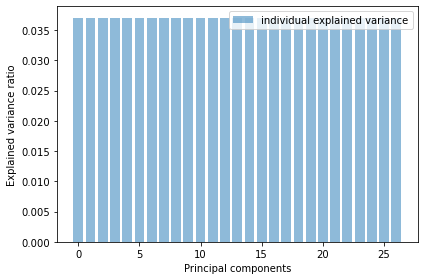

Logistic Regression From PCA
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       623
           1       0.78      0.40      0.53       112

    accuracy                           0.89       735
   macro avg       0.84      0.69      0.73       735
weighted avg       0.88      0.89      0.88       735


 Accuracy: 
 89.1156462585034

 Precision of event Happening: 
 77.58620689655173

 Recall of event Happening: 
 40.17857142857143

 AUC: 
 0.690459470304976

 F-Score:
 0.5294117647058824

 Confusion Matrix: 
 [[610  13]
 [ 67  45]]
SVM From PCA
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       623
           1       0.82      0.24      0.37       112

    accuracy                           0.88       735
   macro avg       0.85      0.62      0.65       735
weighted avg       0.87      0.88      0.85       735


 Accuracy: 
 87.619047

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       623
           1       0.70      0.34      0.46       112

    accuracy                           0.88       735
   macro avg       0.80      0.66      0.69       735
weighted avg       0.86      0.88      0.86       735


 Accuracy: 
 87.75510204081633

 Precision of event Happening: 
 70.37037037037037

 Recall of event Happening: 
 33.92857142857143

 AUC: 
 0.6568017656500803

 F-Score:
 0.4578313253012048

 Confusion Matrix: 
 [[607  16]
 [ 74  38]]


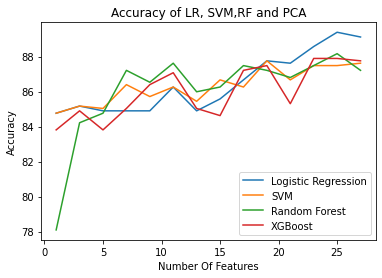

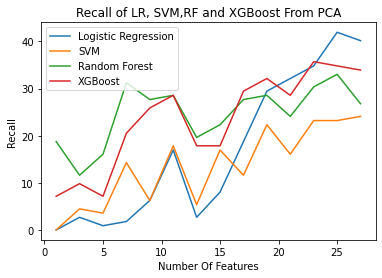

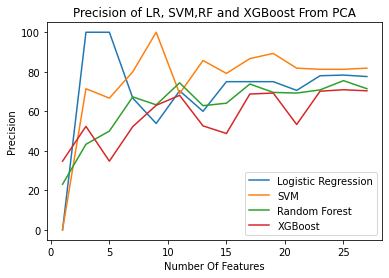

In [44]:
from sklearn.decomposition import PCA
def select_features_pca(X_train, X_test,n):
    global pca
    # configure to select a subset of features
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    pca = PCA(n_components = n)
    X_train_fs = pca.fit_transform(X_train)
    X_test_fs = pca.transform(X_test)
    return X_train_fs, X_test_fs

acc_LR = []
acc_SVM = []
acc_RF = []
acc_XG = []

rec_LR = []
rec_SVM = []
rec_RF = []
rec_XG = []

pre_LR = []
pre_SVM = []
pre_RF = []
pre_XG = []

# feature selection
for n in range(1,28,2):
    X_train_fs, X_test_fs = select_features_pca(X_train, X_test,n)
    
    print ("Explained Variance Ratio of ",n," Components:")
    explained_variance = pca.explained_variance_ratio_
    print(explained_variance)
    
    plt.figure(figsize=(6, 4))
    plt.bar(range(n), explained_variance, alpha=0.5, align='center',label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    
    # fit the model
    print ("Logistic Regression From PCA")
    LogReg(X_train_fs, X_test_fs, y_train, y_test, verbose=True, clf=None)
    acc_LR.append(accuracy)
    rec_LR.append(recall)
    pre_LR.append(precision)
    
    print ("SVM From PCA")
    SVM(X_train_fs, X_test_fs, y_train, y_test, svmtype="SVC", verbose=True, clf=None)
    acc_SVM.append(accuracy)
    rec_SVM.append(recall)
    pre_SVM.append(precision)
    
    print ("RM From PCA")
    RandomForest(X_train_fs, X_test_fs, y_train, y_test, verbose=True, clf=None)
    acc_RF.append(accuracy)
    rec_RF.append(recall)
    pre_RF.append(precision)
    
    print ("Xgboost From PCA")
    XgBoost(X_train_fs, X_test_fs, y_train, y_test, verbose=True, clf=None)
    acc_XG.append(accuracy)
    rec_XG.append(recall)
    pre_XG.append(precision)
    
    
x = [1,3,5,7,9,11,13,15,17,19,21,23,25,27]
y1 = acc_LR
plt.plot(x, y1,label = "Logistic Regression")
y2 = acc_SVM
plt.plot(x, y2,label = "SVM")
y3 = acc_RF
plt.plot(x, y3,label = "Random Forest ")
y4 = acc_XG
plt.plot(x, y4,label = "XGBoost")
plt.xlabel('Number Of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy of LR, SVM,RF and PCA')
plt.legend()
plt.show()



x = [1,3,5,7,9,11,13,15,17,19,21,23,25,27]
y1 = rec_LR
plt.plot(x, y1,label = "Logistic Regression")
y2 = rec_SVM
plt.plot(x, y2,label = "SVM")
y3 = rec_RF
plt.plot(x, y3,label = "Random Forest ")
y4 = rec_XG
plt.plot(x, y4,label = "XGBoost")
plt.xlabel('Number Of Features')
plt.ylabel('Recall')
plt.title('Recall of LR, SVM,RF and XGBoost From PCA')
plt.legend()
plt.show()

x = [1,3,5,7,9,11,13,15,17,19,21,23,25,27]
y1 = pre_LR
plt.plot(x, y1,label = "Logistic Regression")
y2 = pre_SVM
plt.plot(x, y2,label = "SVM")
y3 = pre_RF
plt.plot(x, y3,label = "Random Forest ")
y4 =pre_XG
plt.plot(x, y4,label = "XGBoost")
plt.xlabel('Number Of Features')
plt.ylabel('Precision')
plt.title('Precision of LR, SVM,RF and XGBoost From PCA')
plt.legend()
plt.show()

#### Interpretation
LR performs well with less features.

- Different Algorithms Predictions Using LDA

[1.]


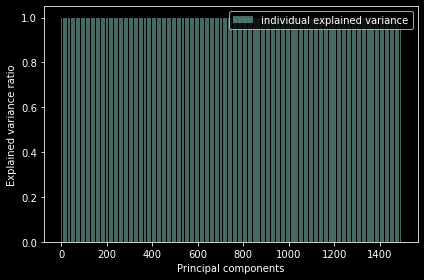

In [45]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
sc = StandardScaler()
y_train = y_train.to_numpy(dtype='int')
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
lda = LinearDiscriminantAnalysis()
X_train = lda.fit_transform(X_train,y_train)
X_test = lda.transform(X_test)
explained_variance = lda.explained_variance_ratio_
print(explained_variance)
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))
    plt.bar(range(len(X_train)), explained_variance, alpha=0.5, align='center',label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

Explained Variance Ratio
[0.03706552 0.03703704 0.03703704 0.03703704 0.03703704 0.03703704
 0.03703704 0.03703704 0.03703704 0.03703704 0.03703704 0.03703704
 0.03703704 0.03703704 0.03703704 0.03703704 0.03703704 0.03703704
 0.03703704 0.03703704 0.03703704 0.03703704 0.03703704 0.03703704
 0.03703704 0.03703704 0.03700855]


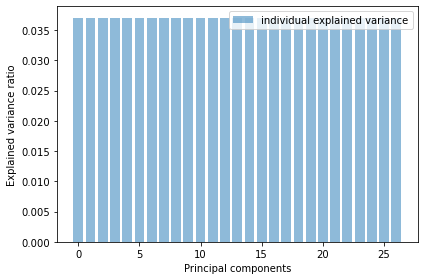

Logistic Regression From LDA
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       623
           1       0.74      0.36      0.48       112

    accuracy                           0.88       735
   macro avg       0.82      0.67      0.71       735
weighted avg       0.87      0.88      0.87       735


 Accuracy: 
 88.29931972789116

 Precision of event Happening: 
 74.07407407407408

 Recall of event Happening: 
 35.714285714285715

 AUC: 
 0.6673354735152488

 F-Score:
 0.48192771084337344

 Confusion Matrix: 
 [[609  14]
 [ 72  40]]
SVM From LDA
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       623
           1       0.75      0.32      0.45       112

    accuracy                           0.88       735
   macro avg       0.82      0.65      0.69       735
weighted avg       0.87      0.88      0.86       735


 Accuracy: 
 88.02

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       623
           1       0.72      0.37      0.49       112

    accuracy                           0.88       735
   macro avg       0.81      0.67      0.71       735
weighted avg       0.87      0.88      0.86       735


 Accuracy: 
 88.16326530612245

 Precision of event Happening: 
 71.9298245614035

 Recall of event Happening: 
 36.607142857142854

 AUC: 
 0.6701946227929374

 F-Score:
 0.4852071005917159

 Confusion Matrix: 
 [[607  16]
 [ 71  41]]


{'accuracy': 88.16326530612245,
 'precision': 71.9298245614035,
 'recall': 36.607142857142854,
 'auc_val': 0.6701946227929374,
 'f_score': 0.4852071005917159,
 'model_obj': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
               gamma=0, gpu_id=-1, importance_type=None,
               interaction_constraints='', learning_rate=0.01, max_delta_step=0,
               max_depth=6, min_child_weight=1, missing=nan,
               monotone_constraints='()', n_estimators=100, n_jobs=4,
               num_parallel_tree=1, predictor='auto', random_state=1,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', validate_parameters=1, verbosity=None)}

In [46]:
def select_features_lda(X_train, X_test,y_train):
    global lda
    # configure to select a subset of features
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    #y_train = y_train.to_numpy(dtype='int')
    lda = LinearDiscriminantAnalysis(solver='svd')
    X_train_fs = lda.fit_transform(X_train,y_train)
    X_test_fs = lda.transform(X_test)
    return X_train_fs, X_test_fs
 

X_train_fs, X_test_fs  = select_features_lda(X_train, X_test,y_train)
    
print ("Explained Variance Ratio")
explained_variance = pca.explained_variance_ratio_
print(explained_variance)
plt.figure(figsize=(6, 4))
plt.bar(range(len(explained_variance)), explained_variance, alpha=0.5, align='center',label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
    
    # fit the model
print ("Logistic Regression From LDA")
LogReg(X_train_fs, X_test_fs, y_train, y_test, verbose=True, clf=None)
    
print ("SVM From LDA")
SVM(X_train_fs, X_test_fs, y_train, y_test, svmtype="SVC", verbose=True, clf=None)
print ("RM From LDA")
RandomForest(X_train_fs, X_test_fs, y_train, y_test, verbose=True, clf=None)
print ("Xgboost From LDA")
XgBoost(X_train_fs, X_test_fs, y_train, y_test, verbose=True, clf=None)
    

- Different Algorithms Predictions Using TSNE

C:\Users\Hp\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Logistic Regression From TSNE
Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       623
           1       0.00      0.00      0.00       112

    accuracy                           0.85       735
   macro avg       0.42      0.50      0.46       735
weighted avg       0.72      0.85      0.78       735


 Accuracy: 
 84.76190476190476

 Precision of event Happening: 
 0.0

 Recall of event Happening: 
 0.0

 AUC: 
 0.5

 F-Score:
 0.0

 Confusion Matrix: 
 [[623   0]
 [112   0]]
SVM From TSNE
Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       623
           1       0.00      0.00      0.00       112

    accuracy                           0.85       735
   macro avg       0.42      0.50      0.46       735
weighted avg       0.72      0.85      0.78       735


 Accuracy: 
 84.76190476190476

 Precision of event Happening: 
 0.0

 Recal

C:\Users\Hp\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda\lib\site-packages\sklearn\metrics\_classificat

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       623
           1       0.08      0.08      0.08       112

    accuracy                           0.71       735
   macro avg       0.46      0.45      0.45       735
weighted avg       0.72      0.71      0.72       735


 Accuracy: 
 71.29251700680273

 Precision of event Happening: 
 7.6923076923076925

 Recall of event Happening: 
 8.035714285714286

 AUC: 
 0.45350120385232745

 F-Score:
 0.07860262008733625

 Confusion Matrix: 
 [[515 108]
 [103   9]]
Xgboost From TSNE
[17:52:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       623
           1       0.05      0.04      0.04       112

    accuracy                           0.76       735
   macro avg       0.44      0.46      0.45       735
weighted avg       0.72      0.76      0.74       735


 Accuracy: 
 75.64625850340137

 Precision of event Happening: 
 5.333333333333334

 Recall of event Happening: 
 3.571428571428571

 AUC: 
 0.46087479935794545

 F-Score:
 0.04278074866310161

 Confusion Matrix: 
 [[552  71]
 [108   4]]


C:\Users\Hp\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Logistic Regression From TSNE
Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       623
           1       0.00      0.00      0.00       112

    accuracy                           0.85       735
   macro avg       0.42      0.50      0.46       735
weighted avg       0.72      0.85      0.78       735


 Accuracy: 
 84.76190476190476

 Precision of event Happening: 
 0.0

 Recall of event Happening: 
 0.0

 AUC: 
 0.5

 F-Score:
 0.0

 Confusion Matrix: 
 [[623   0]
 [112   0]]
SVM From TSNE
Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       623
           1       0.00      0.00      0.00       112

    accuracy                           0.85       735
   macro avg       0.42      0.50      0.46       735
weighted avg       0.72      0.85      0.78       735


 Accuracy: 
 84.76190476190476

 Precision of event Happening: 
 0.0

 Recal

C:\Users\Hp\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda\lib\site-packages\sklearn\metrics\_classificat

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       623
           1       0.12      0.01      0.02       112

    accuracy                           0.84       735
   macro avg       0.49      0.50      0.46       735
weighted avg       0.74      0.84      0.78       735


 Accuracy: 
 83.94557823129252

 Precision of event Happening: 
 12.5

 Recall of event Happening: 
 0.8928571428571428

 AUC: 
 0.4988463081861958

 F-Score:
 0.016666666666666666

 Confusion Matrix: 
 [[616   7]
 [111   1]]
Xgboost From TSNE
[17:52:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       623
           1       0.86      0.11      0.19       112

    accuracy                           0.86       735
   macro avg       0.86      0.55      0.56       735
weighted avg       0.86      0.86      0.81       735


 Accuracy: 
 86.12244897959184

 Precision of event Happening: 
 85.71428571428571

 Recall of event Happening: 
 10.714285714285714

 AUC: 
 0.5519662921348315

 F-Score:
 0.19047619047619047

 Confusion Matrix: 
 [[621   2]
 [100  12]]


C:\Users\Hp\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Logistic Regression From TSNE
Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       623
           1       0.00      0.00      0.00       112

    accuracy                           0.85       735
   macro avg       0.42      0.50      0.46       735
weighted avg       0.72      0.85      0.78       735


 Accuracy: 
 84.76190476190476

 Precision of event Happening: 
 0.0

 Recall of event Happening: 
 0.0

 AUC: 
 0.5

 F-Score:
 0.0

 Confusion Matrix: 
 [[623   0]
 [112   0]]
SVM From TSNE
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       623
           1       0.00      0.00      0.00       112

    accuracy                           0.83       735
   macro avg       0.42      0.49      0.45       735
weighted avg       0.72      0.83      0.77       735


 Accuracy: 
 82.58503401360544

 Precision of event Happening: 
 0.0

 Recal

C:\Users\Hp\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda\lib\site-packages\sklearn\metrics\_classificat

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87       623
           1       0.00      0.00      0.00       112

    accuracy                           0.76       735
   macro avg       0.42      0.45      0.43       735
weighted avg       0.71      0.76      0.73       735


 Accuracy: 
 76.32653061224491

 Precision of event Happening: 
 0.0

 Recall of event Happening: 
 0.0

 AUC: 
 0.45024077046548955

 F-Score:
 0.0

 Confusion Matrix: 
 [[561  62]
 [112   0]]
Xgboost From TSNE
[17:53:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       623
           1       0.01      0.01      0.01       112

    accuracy                           0.75       735
   macro avg       0.42      0.44      0.43       735
weighted avg       0.71      0.75      0.73       735


 Accuracy: 
 74.5578231292517

 Precision of event Happening: 
 1.2987012987012987

 Recall of event Happening: 
 0.8928571428571428

 AUC: 
 0.4434691011235955

 F-Score:
 0.010582010582010581

 Confusion Matrix: 
 [[547  76]
 [111   1]]


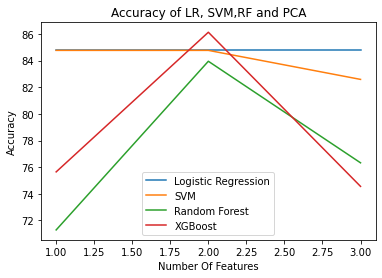

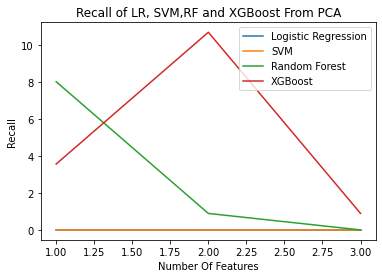

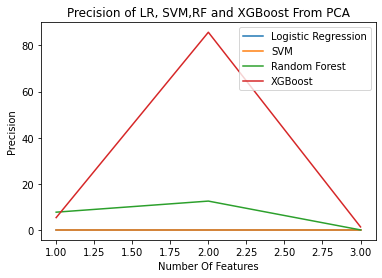

In [48]:
from sklearn.manifold import TSNE
def select_features_tsne(X_train, X_test,n):
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    tsne = TSNE(n_components = n)
    X_train_fs = tsne.fit_transform(X_train)
    X_test_fs = tsne.fit_transform(X_test)
    return X_train_fs, X_test_fs


acc_LR = []
acc_SVM = []
acc_RF = []
acc_XG = []

rec_LR = []
rec_SVM = []
rec_RF = []
rec_XG = []

pre_LR = []
pre_SVM = []
pre_RF = []
pre_XG = []
# feature selection
for n in range(1,4):
    X_train_fs, X_test_fs  = select_features_tsne(X_train, X_test,n)
    # fit the model
    print ("Logistic Regression From TSNE")
    LogReg(X_train_fs, X_test_fs, y_train, y_test, verbose=True, clf=None)
    acc_LR.append(accuracy)
    rec_LR.append(recall)
    pre_LR.append(precision)
    
    print ("SVM From TSNE")
    SVM(X_train_fs, X_test_fs, y_train, y_test, svmtype="SVC", verbose=True, clf=None)
    acc_SVM.append(accuracy)
    rec_SVM.append(recall)
    pre_SVM.append(precision)
    
    print ("RM From TSNE")
    RandomForest(X_train_fs, X_test_fs, y_train, y_test, verbose=True, clf=None)
    acc_RF.append(accuracy)
    rec_RF.append(recall)
    pre_RF.append(precision)
    
    print ("Xgboost From TSNE")
    XgBoost(X_train_fs, X_test_fs, y_train, y_test, verbose=True, clf=None)
    acc_XG.append(accuracy)
    rec_XG.append(recall)
    pre_XG.append(precision)
    
x = [1,2,3]
y1 = acc_LR
plt.plot(x, y1,label = "Logistic Regression")
y2 = acc_SVM
plt.plot(x, y2,label = "SVM")
y3 = acc_RF
plt.plot(x, y3,label = "Random Forest ")
y4 = acc_XG
plt.plot(x, y4,label = "XGBoost")
plt.xlabel('Number Of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy of LR, SVM,RF and PCA')
plt.legend()
plt.show()



x = [1,2,3]
y1 = rec_LR
plt.plot(x, y1,label = "Logistic Regression")
y2 = rec_SVM
plt.plot(x, y2,label = "SVM")
y3 = rec_RF
plt.plot(x, y3,label = "Random Forest ")
y4 = rec_XG
plt.plot(x, y4,label = "XGBoost")
plt.xlabel('Number Of Features')
plt.ylabel('Recall')
plt.title('Recall of LR, SVM,RF and XGBoost From PCA')
plt.legend()
plt.show()

x = [1,2,3]
y1 = pre_LR
plt.plot(x, y1,label = "Logistic Regression")
y2 = pre_SVM
plt.plot(x, y2,label = "SVM")
y3 = pre_RF
plt.plot(x, y3,label = "Random Forest ")
y4 =pre_XG
plt.plot(x, y4,label = "XGBoost")
plt.xlabel('Number Of Features')
plt.ylabel('Precision')
plt.title('Precision of LR, SVM,RF and XGBoost From PCA')
plt.legend()
plt.show()

#### Interpretation
Xgboost perform well with 2 components with good accuracy,precision and recall.

# MCMC

For the MCMC part we first look the individual columns histograms and try to figure what type of distribution it follows.

In [23]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
import scipy as sp
import seaborn as sns
import theano.tensor as tt
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


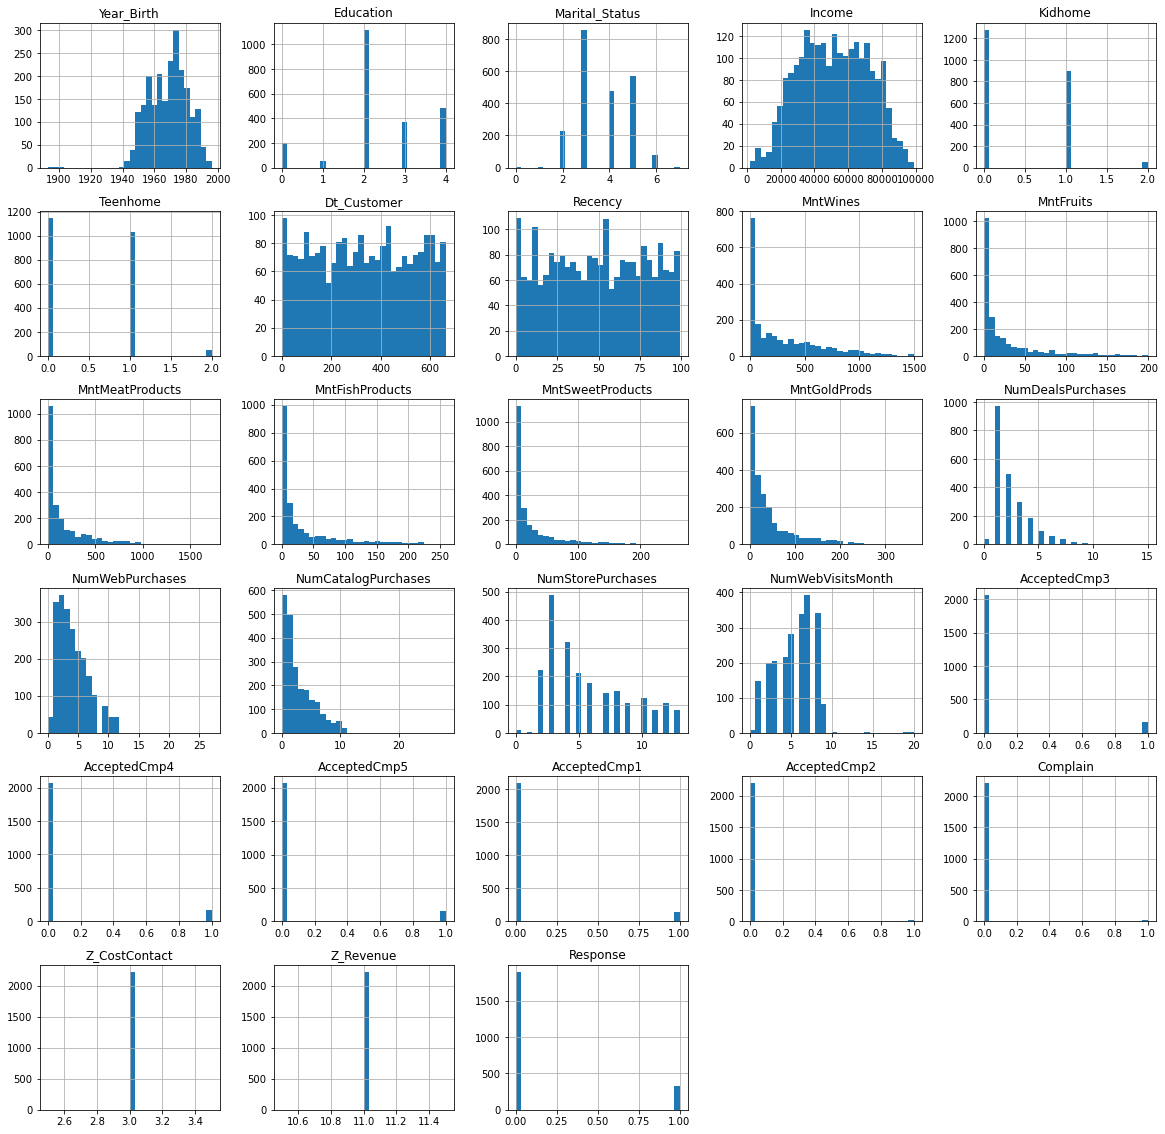

In [36]:
data1 = pd.DataFrame(data)
    
data1.hist(figsize=(20,20), bins = 30)
plot.show()

In [37]:
import arviz as az
def view_distribution(data):
    az.plot_kde(data, rug=True)
    return plt.yticks([0], alpha=0)

([<matplotlib.axis.YTick at 0x205b7ad86d0>], [Text(0, 0, '')])

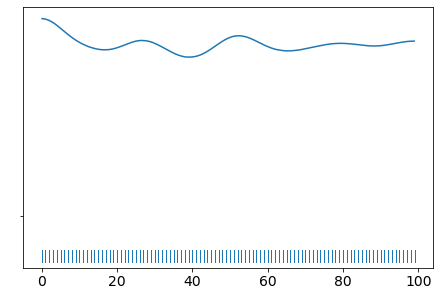

In [38]:
view_distribution(data['Recency'])

([<matplotlib.axis.YTick at 0x205c44a1c10>], [Text(0, 0, '')])

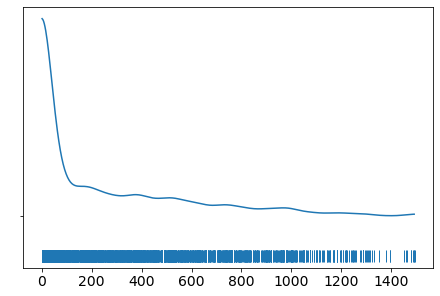

In [39]:
view_distribution(data['MntWines'])

([<matplotlib.axis.YTick at 0x205c44f6e20>], [Text(0, 0, '')])

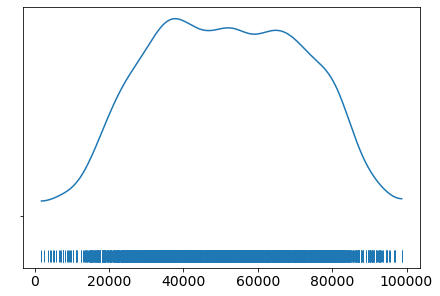

In [40]:
view_distribution(data['Income'])

([<matplotlib.axis.YTick at 0x205c45475b0>], [Text(0, 0, '')])

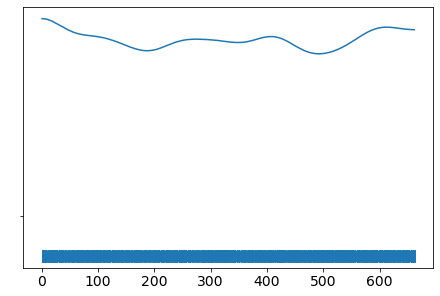

In [41]:
view_distribution(data['Dt_Customer'])

([<matplotlib.axis.YTick at 0x205c4599280>], [Text(0, 0, '')])

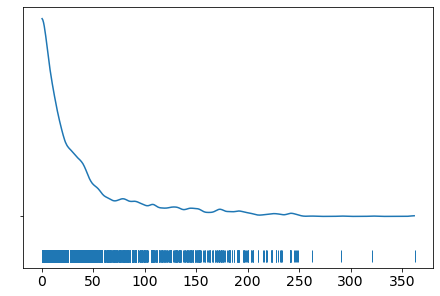

In [42]:
view_distribution(data['MntGoldProds'])

([<matplotlib.axis.YTick at 0x205c45ee4c0>], [Text(0, 0, '')])

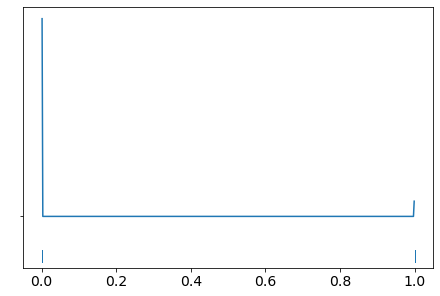

In [43]:
view_distribution(data['AcceptedCmp5'])

#### Generic Metropolis Hasting Sampling
- First we assume that data prior follows a logistic function aand then a bernoulli for likelihood. And alpha beta follows normal distribution (parameters).
- Second we assume likelihood follows Normal and parameters follows Uniform.

In [45]:
N_SAMPLES = 500

with pm.Model() as model:
    # Create the alpha and beta parameters
    alpha = pm.Normal('alpha', mu=0.0, tau=0.01, testval=0.0)
    beta = pm.Normal('beta', mu=0.0, tau=0.01, testval=0.0)
    
    # Create the probability from the logistic function
    p = pm.Deterministic('p', 1. / (1. + tt.exp(beta * data['AcceptedCmp5'] + alpha)))
    
    # Create the bernoulli parameter which uses the observed dat
    observed = pm.Bernoulli('obs', p, observed=data['AcceptedCmp5'])
    
    # Starting values are found through Maximum A Posterior estimation
    # start = pm.find_MAP()
    
    # Using Metropolis Hastings Sampling
    step = pm.Metropolis()
    
    # Sample from the posterior using the sampling method
    trace = pm.sample(N_SAMPLES, chains=3, step=step, progressbar=True);

Multiprocess sampling (3 chains in 2 jobs)
CompoundStep
>Metropolis: [beta]
>Metropolis: [alpha]
Sampling 3 chains, 0 divergences: 100%|████████████████████████████████████████| 3000/3000 [00:07<00:00, 375.91draws/s]
The estimated number of effective samples is smaller than 200 for some parameters.


In [47]:
with pm.Model() as model_n:
    #Prior
    mu = pm.Uniform("mu", lower=-10, upper=10, testval=0)
    sigma = pm.Uniform("sigma", lower=0, upper=6, testval=0.0001)
    
    #Likelihood
    likelihood = pm.Normal("likelihood", mu=mu, sd=sigma, observed = data['AcceptedCmp5'])
    
    #Posterior
    
    step  = pm.Metropolis()
    trace = pm.sample(1000, chains=3, step=step, progressbar=True)
    #burned_trace = trace[3000::]
    btrace = az.from_pymc3(trace, log_likelihood=False)

Multiprocess sampling (3 chains in 2 jobs)
CompoundStep
>Metropolis: [sigma]
>Metropolis: [mu]
Sampling 3 chains, 0 divergences: 100%|████████████████████████████████████████| 4500/4500 [00:04<00:00, 915.98draws/s]
The estimated number of effective samples is smaller than 200 for some parameters.


array([[<AxesSubplot:title={'center':'mu\n0'}>,
        <AxesSubplot:title={'center':'mu\n1'}>,
        <AxesSubplot:title={'center':'mu\n2'}>],
       [<AxesSubplot:title={'center':'sigma\n0'}>,
        <AxesSubplot:title={'center':'sigma\n1'}>,
        <AxesSubplot:title={'center':'sigma\n2'}>]], dtype=object)

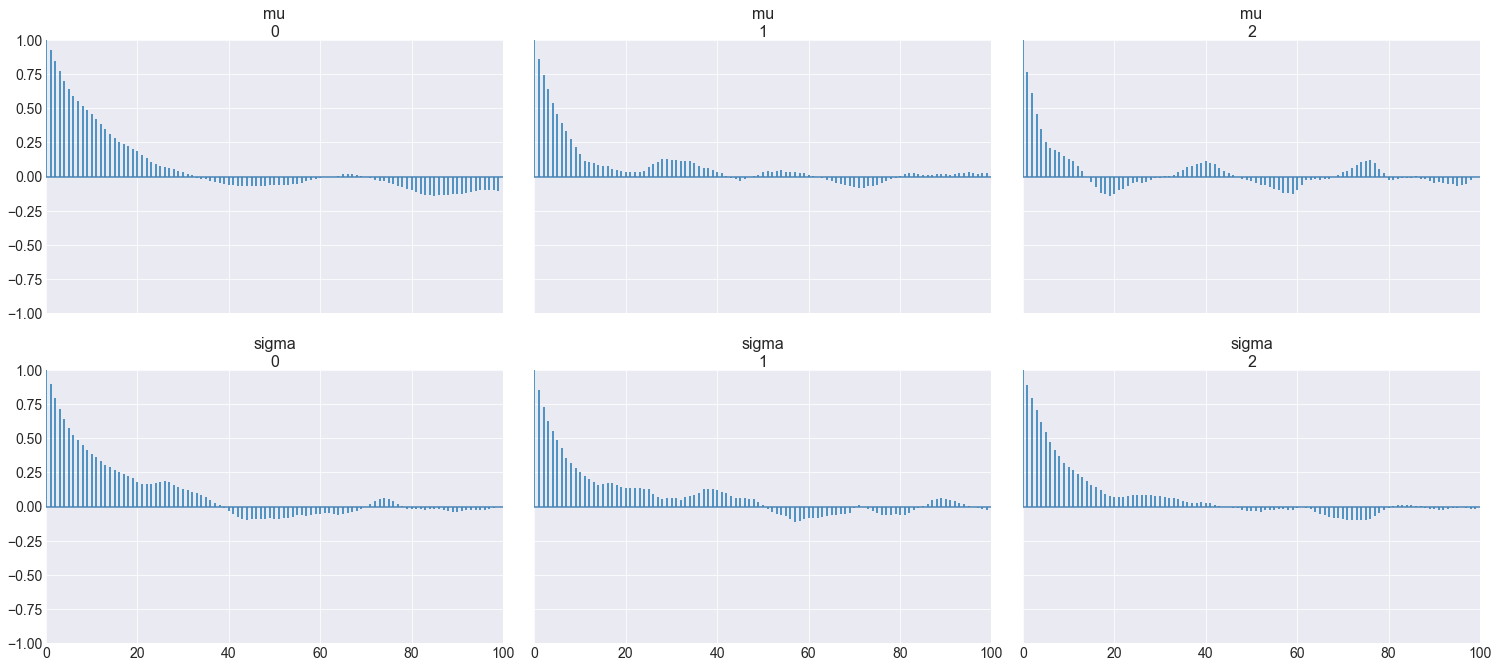

In [48]:
pm.autocorrplot(btrace)

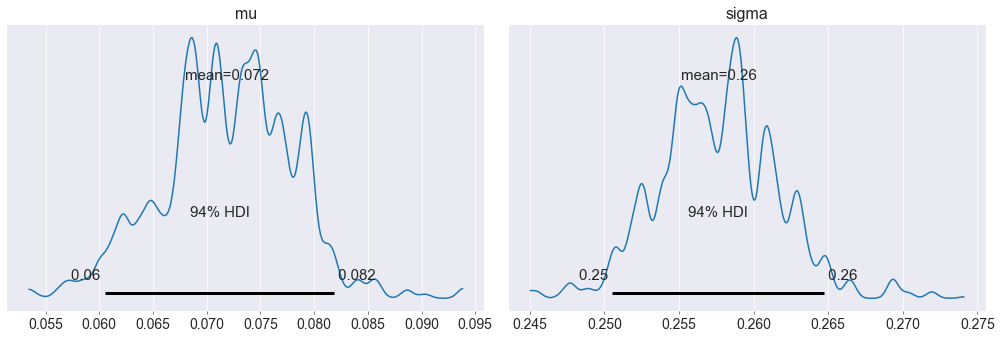

In [49]:
az.plot_posterior(btrace);

array([[<AxesSubplot:title={'center':'mu\n0'}>,
        <AxesSubplot:title={'center':'mu\n1'}>,
        <AxesSubplot:title={'center':'mu\n2'}>],
       [<AxesSubplot:title={'center':'sigma\n0'}>,
        <AxesSubplot:title={'center':'sigma\n1'}>,
        <AxesSubplot:title={'center':'sigma\n2'}>]], dtype=object)

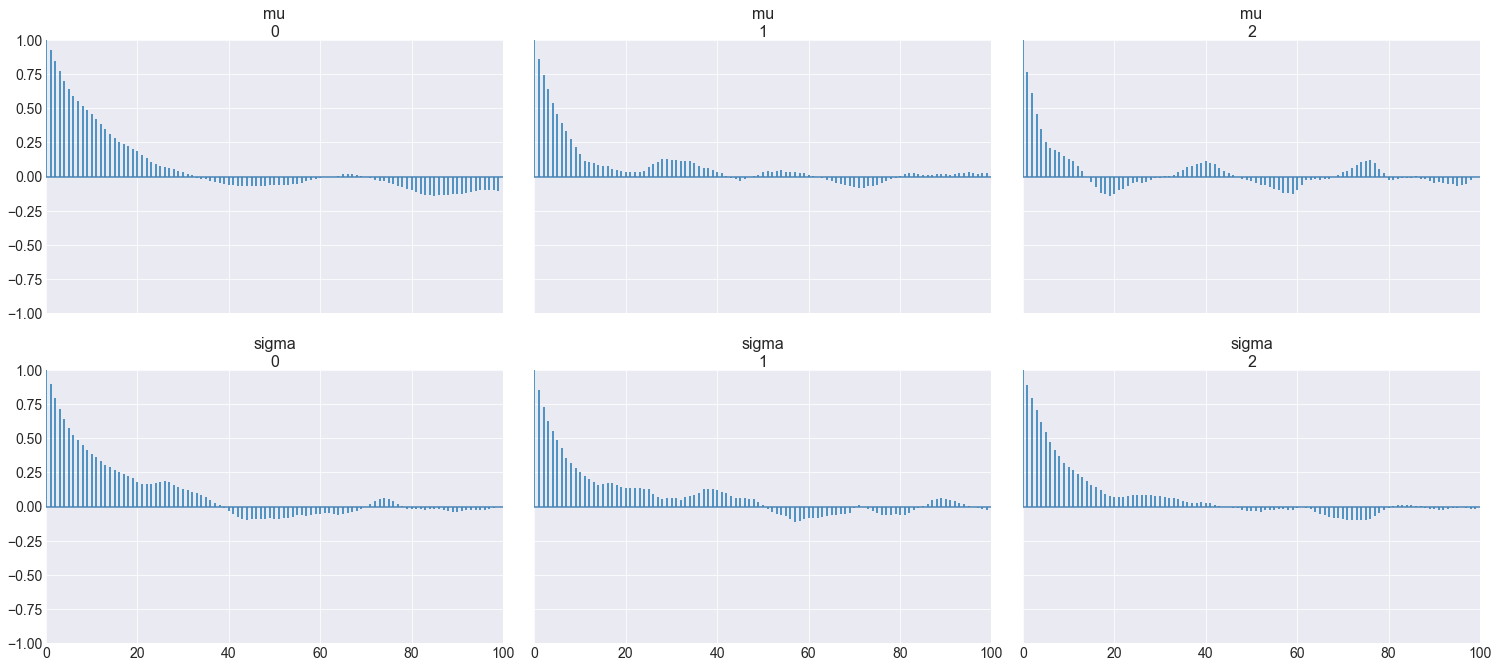

In [50]:
pm.autocorrplot(btrace)

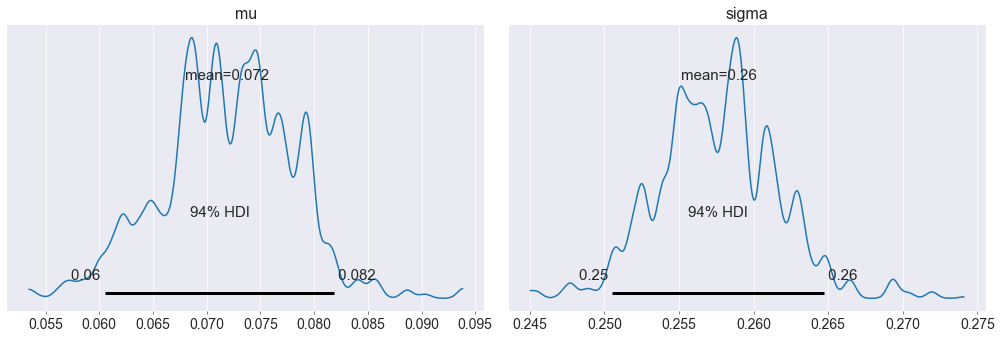

In [51]:
az.plot_posterior(btrace);

#### NUTS

We assume priors follows beta distribution, likelihood follows Binomial distribution

logp = -599.53, ||grad|| = 39.418: 100%|██████████████████████████████████████████████| 17/17 [00:00<00:00, 370.53it/s]
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p]
Sampling 2 chains, 0 divergences: 100%|████████████████████████████████████████| 4000/4000 [00:04<00:00, 814.55draws/s]


    mean   sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
p  0.001  0.0   0.001    0.001        0.0      0.0     847.0   847.0   

   ess_bulk  ess_tail  r_hat  
p     851.0    1455.0    1.0  
trace plot
posterior plot
forest plot
autocorr plot
density plot
Number of Divergent Chains: 0
Percentage of Divergent Chains: 0.0


C:\Users\Hp\anaconda\lib\site-packages\arviz\plots\pairplot.py:224: UserWarning: Divergences data not found, plotting without divergences. Make sure the sample method provides divergences data and that it is present in the `diverging` field of `sample_stats` or `sample_stats_prior` or set divergences=False
  warnings.warn(


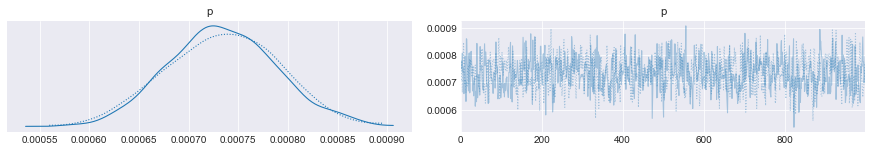

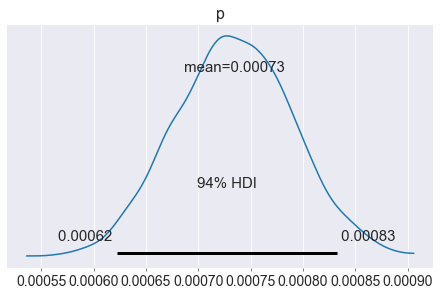

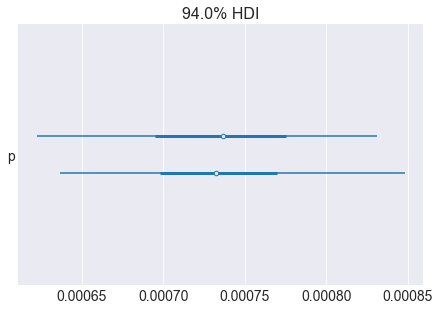

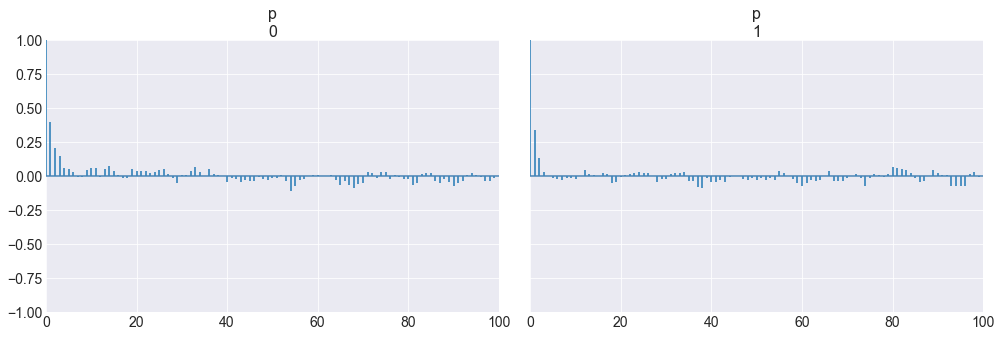

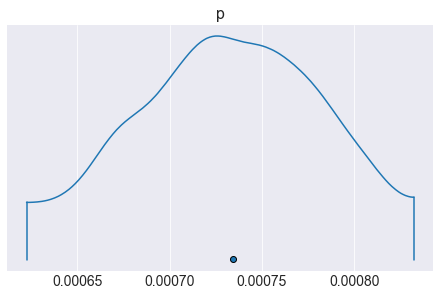

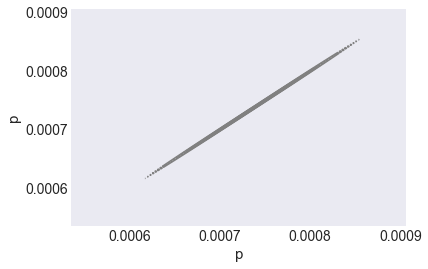

In [52]:
n = 100
alpha = 4
beta = 4

niter = 1000
with pm.Model() as model: # context management
    
    # define priors
    p = pm.Beta('p', alpha=alpha, beta=beta)
    
    # define likelihood
    y = pm.Binomial('y', n=n, p=p, observed=data['AcceptedCmp5'])

    # inference
    start = pm.find_MAP() # Use MAP estimate (optimization) as the initial state for MCMC
    step = pm.NUTS() # Have a choice of samplers
    trace = pm.sample(niter, step, start, tune=1000, random_seed=123, progressbar=True)
    print(pm.summary(trace))
    
    #typical trace plots
    print("trace plot")
    pm.plot_trace(trace)
    
    #check if your posteriors look reasonable
    print("posterior plot")
    pm.plot_posterior(trace)
    
    # check if your variables have reasonable credible intervals, 
    #and Gelman–Rubin scores close to 1
    print("forest plot")
    pm.plot_forest(trace)
    
    #check if your chains are impaired by high autocorrelation. 
    #Also remember that thinning your chains is a waste of time at best, and deluding yourself at worst.
    print("autocorr plot")
    pm.plot_autocorr(trace)
    
    #a souped-up version of pm.plot_posterior. 
    #It doesn’t seem to be wildly useful unless you’re plotting posteriors from multiple models.
    print("density plot")
    pm.plot_density(trace)
    
    # Display the total number and percentage of divergent chains
    diverging = trace['diverging']
    print('Number of Divergent Chains: {}'.format(diverging.nonzero()[0].size))
    diverging_pct = diverging.nonzero()[0].size / len(trace) * 100
    print('Percentage of Divergent Chains: {:.1f}'.format(diverging_pct))
    
    az.plot_pair(trace, 
                 var_names=['p','p'], 
                 kind='kde', 
                 group="posterior",
                 divergences=True,
                 colorbar=True,
                 divergences_kwargs={'color': 'C2'})

In [53]:
map_estimate = pm.find_MAP(model=model)
print(map_estimate)

logp = -599.53, ||grad|| = 39.418: 100%|█████████████████████████████████████████████| 17/17 [00:00<00:00, 1549.09it/s]

{'p_logodds__': array(-7.22528378), 'p': array(0.00072742)}


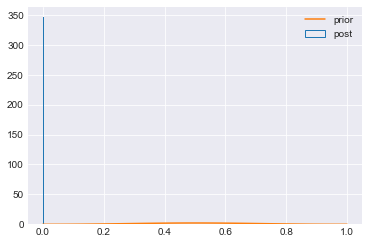

In [54]:
import scipy.stats as stats
plt.hist(trace['p'], 15, histtype='step', label='post');
x = np.linspace(0, 1, 100)
plt.plot(x, stats.beta.pdf(x, alpha, beta), label='prior');
plt.legend(loc='best');

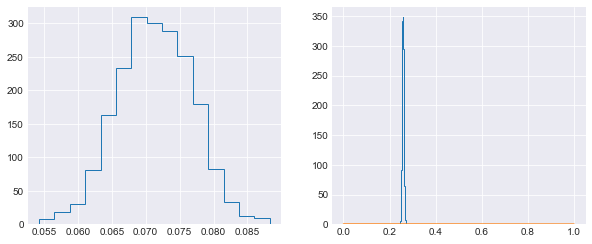

In [58]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(trace['mu'], 15, histtype='step', label='mu')
plt.subplot(1,2,2)
plt.hist(trace['sigma'], 15, histtype='step', label='sigma')
x = np.linspace(0, 1, 100)
plt.plot(x, stats.norm.pdf(x), label='prior');
#plt.legend(loc='best')

#### Metropolis Hasting

In [67]:
mu_obs=data['Income'].mean()
#The tranistion model defines how to move from sigma_current to sigma_new
transition_model = lambda x: [x[0],np.random.normal(x[1],0.05,(1,))[0]]

def prior(x):
    #x[0] = mu, x[1]=sigma (new or current)
    #returns 1 for all valid values of sigma. Log(1) =0, so it does not affect the summation.
    #returns 0 for all invalid values of sigma (<=0). Log(0)=-infinity, and Log(negative number) is undefined.
    #It makes the new sigma infinitely unlikely.
    if(x[1] <=0):
        return 0
    return 1

#Computes the likelihood of the data given a sigma (new or current) 
def manual_log_like_normal(x,data):
    #x[0]=mu, x[1]=sigma (new or current)
    #data = the observation
    return np.sum(-np.log(x[1] * np.sqrt(2* np.pi) )-((data-x[0])**2) / (2*x[1]**2))

#Same as manual_log_like_normal(x,data), but using scipy implementation. It's pretty slow.
def log_lik_normal(x,data):
    #x[0]=mu, x[1]=sigma (new or current)
    #data = the observation
    return np.sum(np.log(scipy.stats.norm(x[0],x[1]).pdf(data)))


#Defines whether to accept or reject the new sample
def acceptance(x, x_new):
    if x_new>x:
        return True
    else:
        accept=np.random.uniform(0,1)
        # Since we did a log likelihood, we need to exponentiate in order to compare to the random number
        # less likely x_new are less likely to be accepted
        return (accept < (np.exp(x_new-x)))


def metropolis_hastings(likelihood_computer,prior, transition_model, param_init,iterations,data,acceptance_rule):
    # likelihood_computer(x,data): returns the likelihood that these parameters generated the data
    # transition_model(x): a function that draws a sample from a symmetric distribution and returns it
    # param_init: a starting sample
    # iterations: number of accepted to generated
    # data: the data that we wish to model
    # acceptance_rule(x,x_new): decides whether to accept or reject the new sample
    x = param_init
    accepted = []
    rejected = []   
    for i in range(iterations):
        x_new =  transition_model(x)    
        x_lik = likelihood_computer(x,data)
        x_new_lik = likelihood_computer(x_new,data) 
        if (acceptance_rule(x_lik + np.log(prior(x)),x_new_lik+np.log(prior(x_new)))):            
            x = x_new
            accepted.append(x_new)
        else:
            rejected.append(x_new)            
                
    return np.array(accepted), np.array(rejected)

In [68]:
accepted, rejected = metropolis_hastings(manual_log_like_normal,prior,transition_model,[mu_obs,0.1], 50000,data['Income'],acceptance)

(25032, 2)

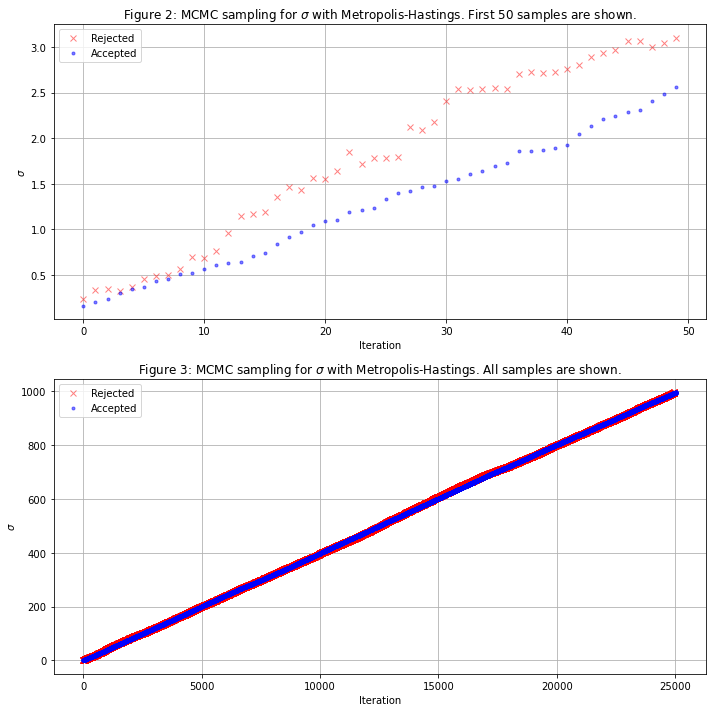

In [69]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,1,1)

ax.plot( rejected[0:50,1], 'rx', label='Rejected',alpha=0.5)
ax.plot( accepted[0:50,1], 'b.', label='Accepted',alpha=0.5)
ax.set_xlabel("Iteration")
ax.set_ylabel("$\sigma$")
ax.set_title("Figure 2: MCMC sampling for $\sigma$ with Metropolis-Hastings. First 50 samples are shown.")
ax.grid()
ax.legend()



ax2 = fig.add_subplot(2,1,2)
to_show=-accepted.shape[0]
ax2.plot( rejected[to_show:,1], 'rx', label='Rejected',alpha=0.5)
ax2.plot( accepted[to_show:,1], 'b.', label='Accepted',alpha=0.5)
ax2.set_xlabel("Iteration")
ax2.set_ylabel("$\sigma$")
ax2.set_title("Figure 3: MCMC sampling for $\sigma$ with Metropolis-Hastings. All samples are shown.")
ax2.grid()
ax2.legend()



fig.tight_layout()
accepted.shape

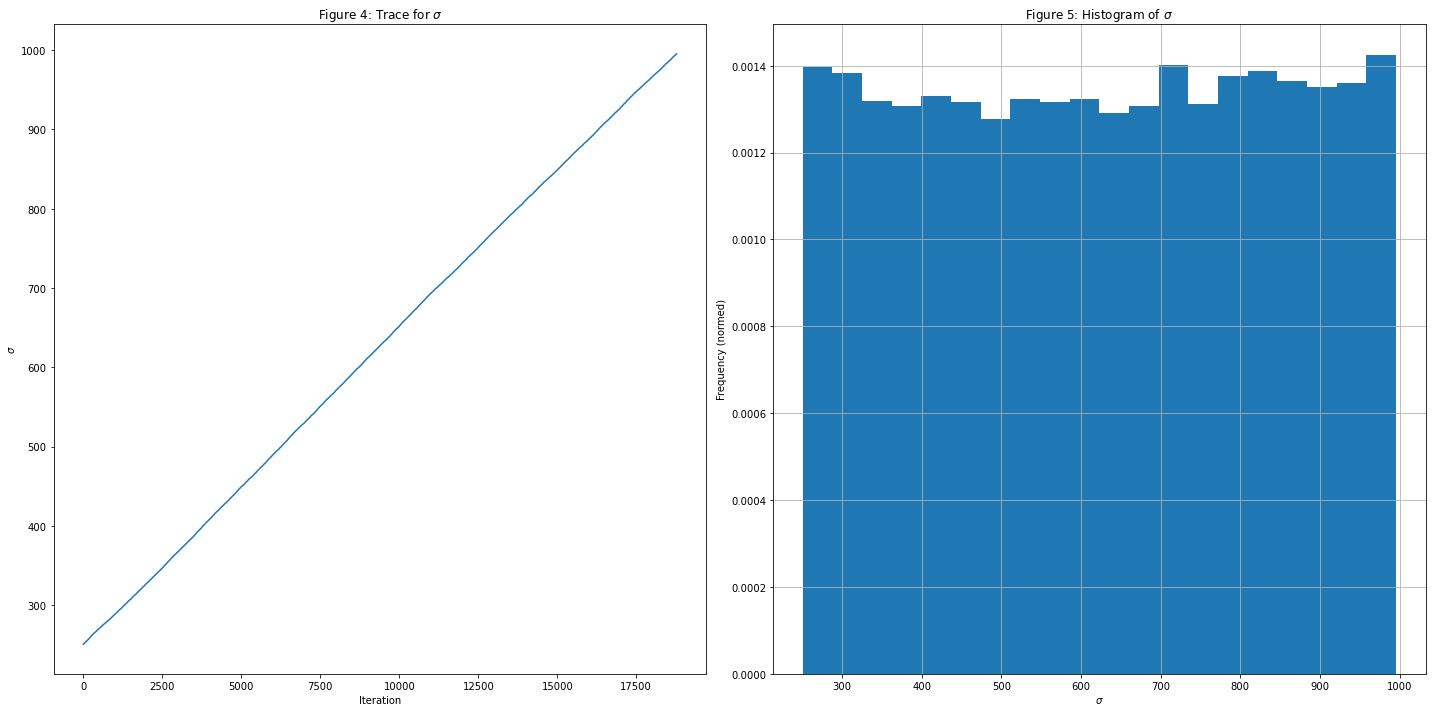

In [70]:
show=int(-0.75*accepted.shape[0])
hist_show=int(-0.75*accepted.shape[0])

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,2,1)
ax.plot(accepted[show:,1])
ax.set_title("Figure 4: Trace for $\sigma$")
ax.set_ylabel("$\sigma$")
ax.set_xlabel("Iteration")
ax = fig.add_subplot(1,2,2)
ax.hist(accepted[hist_show:,1], bins=20,density=True)
ax.set_ylabel("Frequency (normed)")
ax.set_xlabel("$\sigma$")
ax.set_title("Figure 5: Histogram of $\sigma$")
fig.tight_layout()


ax.grid("off")

51519.973072515 625.0861179750432


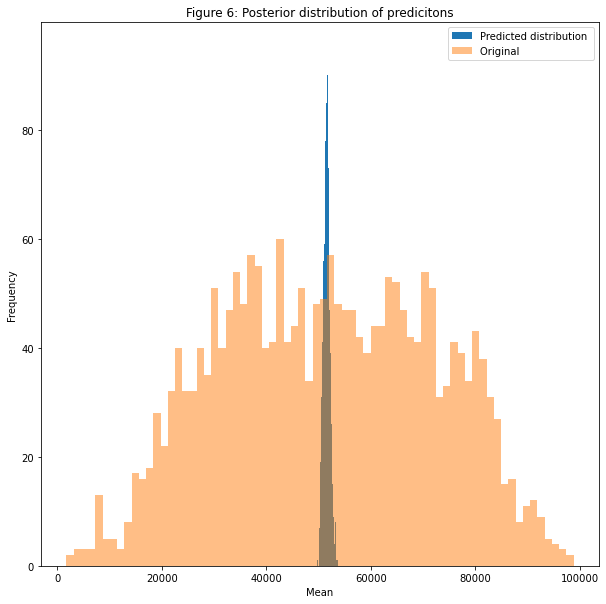

In [71]:
mu=accepted[show:,0].mean()
sigma=accepted[show:,1].mean()
print(mu, sigma)
model = lambda t,mu,sigma:np.random.normal(mu,sigma,t)
observation_gen=model(data['Income'].shape[0],mu,sigma)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.hist( observation_gen,bins=70 ,label="Predicted distribution ")
ax.hist( data['Income'],bins=70 ,alpha=0.5, label="Original ")
ax.set_xlabel("Mean")
ax.set_ylabel("Frequency")
ax.set_title("Figure 6: Posterior distribution of predicitons")
ax.legend()

# Bayesian Logistic Regression with PyMC3

For classification dataset we will model a Bayesian Logistic Regression.
The target variable is given as y and takes on a value of 1 if the customer has effect of marketing campaign and 0 otherwise.

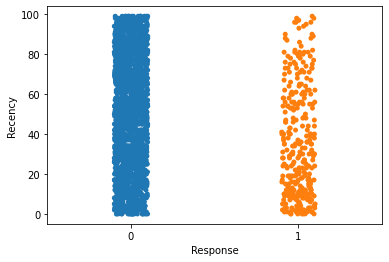

In [33]:
sns.stripplot(x=data['Response'], y=data['Recency'], data=data, jitter=True)
plt.show()

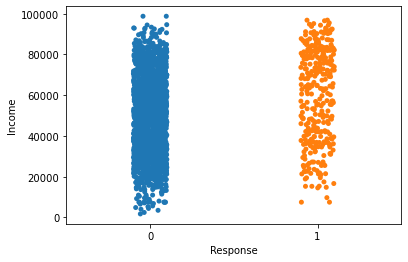

In [34]:
sns.stripplot(x=data['Response'], y=data['Income'], data=data, jitter=True)
plt.show()

In [24]:
outcome = data['Response']
data = data[['Year_Birth','Education',
'Marital_Status','Income',
'Kidhome',
'Teenhome',
'Dt_Customer',
'Recency',
'MntWines',
'MntFruits',
'MntMeatProducts',
'MntFishProducts',
'MntSweetProducts',
'MntGoldProds',
'NumDealsPurchases',
'NumWebPurchases',
'NumCatalogPurchases',
'NumStorePurchases',
'NumWebVisitsMonth',
'AcceptedCmp3',
'AcceptedCmp4',
'AcceptedCmp5',
'AcceptedCmp1',
'AcceptedCmp2',
'Complain',
'Z_CostContact',
'Z_Revenue']]
data['outcome'] = outcome
data.corr()['outcome'].sort_values(ascending=False)

outcome                1.000000
AcceptedCmp5           0.316305
AcceptedCmp1           0.282515
AcceptedCmp3           0.256446
MntMeatProducts        0.247415
MntWines               0.243378
NumCatalogPurchases    0.228191
AcceptedCmp4           0.167906
Income                 0.166043
AcceptedCmp2           0.163914
NumWebPurchases        0.147567
MntGoldProds           0.131718
MntFruits              0.118218
MntSweetProducts       0.111042
MntFishProducts        0.107214
Education              0.092426
NumStorePurchases      0.028651
Year_Birth             0.019003
Dt_Customer            0.012949
NumDealsPurchases      0.008315
Complain              -0.001462
NumWebVisitsMonth     -0.002399
Marital_Status        -0.012337
Kidhome               -0.077424
Teenhome              -0.152560
Recency               -0.199251
Z_CostContact               NaN
Z_Revenue                   NaN
Name: outcome, dtype: float64

We will be taking columns which have hogh correlation with y i.e Response.
We assume the distribution follows sigmoid function 
We are going to begin with the simplest possible logistic model, using just one independent variable or feature
bd is the boundary function.
One of the deterministic variables θ is the output of the logistic function applied to the μ variable.

In [68]:
y_simple = data['outcome']
x_n = 'AcceptedCmp5' 
x_0 = data[x_n].values
x_c = x_0 - x_0.mean()

with pm.Model() as model_simple:
    α = pm.Normal('α', mu=0, sd=10)
    β = pm.Normal('β', mu=0, sd=10)
    
    μ = α + pm.math.dot(x_c, β)    
    θ = pm.Deterministic('θ', pm.math.sigmoid(μ))
    bd = pm.Deterministic('bd', -α/β)
    
    y_1 = pm.Bernoulli('y_1', p=θ, observed=y_simple)

    trace_simple = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [β, α]
Sampling 2 chains, 0 divergences: 100%|████████████████████████████████████████| 4000/4000 [00:12<00:00, 321.22draws/s]


C:\Users\Hp\anaconda\lib\site-packages\arviz\stats\stats.py:340: UserWarning: hpd will be deprecated Please replace hdi
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\arviz\stats\stats.py:493: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(


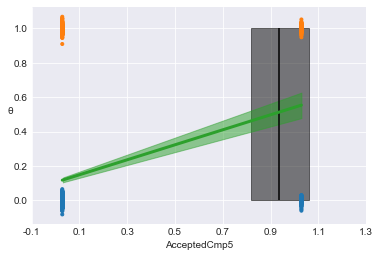

In [69]:
theta = trace_simple['θ'].mean(axis=0)
idx = np.argsort(x_c)
plt.plot(x_c[idx], theta[idx], color='C2', lw=3)
plt.vlines(trace_simple['bd'].mean(), 0, 1, color='k')
bd_hpd = az.hpd(trace_simple['bd'])
plt.fill_betweenx([0, 1], bd_hpd[0], bd_hpd[1], color='k', alpha=0.5)

plt.scatter(x_c, np.random.normal(y_simple, 0.02),
            marker='.', color=[f'C{x}' for x in y_simple])
az.plot_hpd(x_c, trace_simple['θ'], color='C2')

plt.xlabel(x_n)
plt.ylabel('θ', rotation=0)
locs, _ = plt.xticks()
plt.xticks(locs, np.round(locs + x_0.mean(), 1));

This dosenot create a proper S of the sigmoid function.

In [71]:
y_simple = data['outcome']
x_n = 'Income' 
x_0 = data[x_n].values
x_c = x_0 - x_0.mean()

with pm.Model() as model_simple:
    α = pm.Normal('α', mu=0, sd=10)
    β = pm.Normal('β', mu=0, sd=10)
    
    μ = α + pm.math.dot(x_c, β)    
    θ = pm.Deterministic('θ', pm.math.sigmoid(μ))
    bd = pm.Deterministic('bd', -α/β)
    
    y_1 = pm.Bernoulli('y_1', p=θ, observed=y_simple)

    trace_simple = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [β, α]
Sampling 2 chains, 0 divergences: 100%|█████████████████████████████████████████| 4000/4000 [00:45<00:00, 88.04draws/s]


C:\Users\Hp\anaconda\lib\site-packages\arviz\stats\stats.py:340: UserWarning: hpd will be deprecated Please replace hdi
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\arviz\stats\stats.py:493: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(


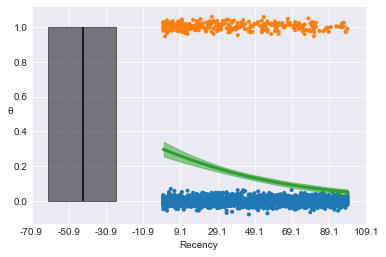

In [76]:
theta = trace_simple['θ'].mean(axis=0)
idx = np.argsort(x_c)
plt.plot(x_c[idx], theta[idx], color='C2', lw=3)
plt.vlines(trace_simple['bd'].mean(), 0, 1, color='k')
bd_hpd = az.hpd(trace_simple['bd'])
plt.fill_betweenx([0, 1], bd_hpd[0], bd_hpd[1], color='k', alpha=0.5)

plt.scatter(x_c, np.random.normal(y_simple, 0.02),
            marker='.', color=[f'C{x}' for x in y_simple])
az.plot_hpd(x_c, trace_simple['θ'], color='C2')

plt.xlabel(x_n)
plt.ylabel('θ', rotation=0)
locs, _ = plt.xticks()
plt.xticks(locs, np.round(locs + x_0.mean(), 1));

In [73]:
y_simple = data['outcome']
x_n = 'Recency' 
x_0 = data[x_n].values
x_c = x_0 - x_0.mean()

with pm.Model() as model_simple:
    α = pm.Normal('α', mu=0, sd=10)
    β = pm.Normal('β', mu=0, sd=10)
    
    μ = α + pm.math.dot(x_c, β)    
    θ = pm.Deterministic('θ', pm.math.sigmoid(μ))
    bd = pm.Deterministic('bd', -α/β)
    
    y_1 = pm.Bernoulli('y_1', p=θ, observed=y_simple)

    trace_simple = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [β, α]
Sampling 2 chains, 0 divergences: 100%|████████████████████████████████████████| 4000/4000 [00:12<00:00, 317.73draws/s]


C:\Users\Hp\anaconda\lib\site-packages\arviz\stats\stats.py:340: UserWarning: hpd will be deprecated Please replace hdi
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\arviz\stats\stats.py:493: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(


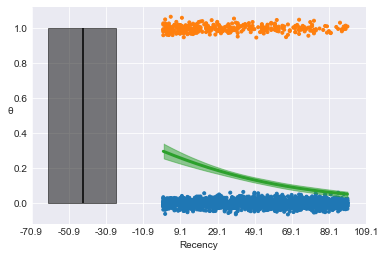

In [74]:
theta = trace_simple['θ'].mean(axis=0)
idx = np.argsort(x_c)
plt.plot(x_c[idx], theta[idx], color='C2', lw=3)
plt.vlines(trace_simple['bd'].mean(), 0, 1, color='k')
bd_hpd = az.hpd(trace_simple['bd'])
plt.fill_betweenx([0, 1], bd_hpd[0], bd_hpd[1], color='k', alpha=0.5)

plt.scatter(x_c, np.random.normal(y_simple, 0.02),
            marker='.', color=[f'C{x}' for x in y_simple])
az.plot_hpd(x_c, trace_simple['θ'], color='C2')

plt.xlabel(x_n)
plt.ylabel('θ', rotation=0)
locs, _ = plt.xticks()
plt.xticks(locs, np.round(locs + x_0.mean(), 1));

In [79]:
y_simple = data['outcome']
x_n = 'NumCatalogPurchases' 
x_0 = data[x_n].values
x_c = x_0 - x_0.mean()

with pm.Model() as model_simple:
    α = pm.Normal('α', mu=0, sd=10)
    β = pm.Normal('β', mu=0, sd=10)
    
    μ = α + pm.math.dot(x_c, β)    
    θ = pm.Deterministic('θ', pm.math.sigmoid(μ))
    bd = pm.Deterministic('bd', -α/β)
    
    y_1 = pm.Bernoulli('y_1', p=θ, observed=y_simple)

    trace_simple = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [β, α]
Sampling 2 chains, 0 divergences: 100%|████████████████████████████████████████| 4000/4000 [00:10<00:00, 379.37draws/s]


C:\Users\Hp\anaconda\lib\site-packages\arviz\stats\stats.py:340: UserWarning: hpd will be deprecated Please replace hdi
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\arviz\stats\stats.py:493: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(


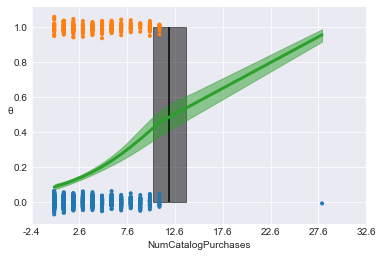

In [80]:
theta = trace_simple['θ'].mean(axis=0)
idx = np.argsort(x_c)
plt.plot(x_c[idx], theta[idx], color='C2', lw=3)
plt.vlines(trace_simple['bd'].mean(), 0, 1, color='k')
bd_hpd = az.hpd(trace_simple['bd'])
plt.fill_betweenx([0, 1], bd_hpd[0], bd_hpd[1], color='k', alpha=0.5)

plt.scatter(x_c, np.random.normal(y_simple, 0.02),
            marker='.', color=[f'C{x}' for x in y_simple])
az.plot_hpd(x_c, trace_simple['θ'], color='C2')

plt.xlabel(x_n)
plt.ylabel('θ', rotation=0)
locs, _ = plt.xticks()
plt.xticks(locs, np.round(locs + x_0.mean(), 1));

In [81]:

y_simple = data['outcome']
x_n = 'MntMeatProducts' 
x_0 = data[x_n].values
x_c = x_0 - x_0.mean()

with pm.Model() as model_simple:
    α = pm.Normal('α', mu=0, sd=10)
    β = pm.Normal('β', mu=0, sd=10)
    
    μ = α + pm.math.dot(x_c, β)    
    θ = pm.Deterministic('θ', pm.math.sigmoid(μ))
    bd = pm.Deterministic('bd', -α/β)
    
    y_1 = pm.Bernoulli('y_1', p=θ, observed=y_simple)

    trace_simple = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [β, α]
Sampling 2 chains, 0 divergences: 100%|████████████████████████████████████████| 4000/4000 [00:12<00:00, 311.16draws/s]


C:\Users\Hp\anaconda\lib\site-packages\arviz\stats\stats.py:340: UserWarning: hpd will be deprecated Please replace hdi
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\arviz\stats\stats.py:493: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(


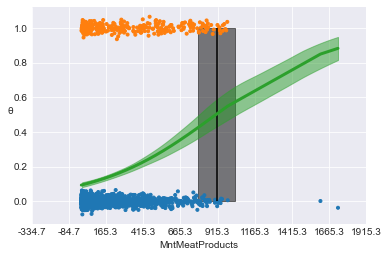

In [82]:
theta = trace_simple['θ'].mean(axis=0)
idx = np.argsort(x_c)
plt.plot(x_c[idx], theta[idx], color='C2', lw=3)
plt.vlines(trace_simple['bd'].mean(), 0, 1, color='k')
bd_hpd = az.hpd(trace_simple['bd'])
plt.fill_betweenx([0, 1], bd_hpd[0], bd_hpd[1], color='k', alpha=0.5)

plt.scatter(x_c, np.random.normal(y_simple, 0.02),
            marker='.', color=[f'C{x}' for x in y_simple])
az.plot_hpd(x_c, trace_simple['θ'], color='C2')

plt.xlabel(x_n)
plt.ylabel('θ', rotation=0)
locs, _ = plt.xticks()
plt.xticks(locs, np.round(locs + x_0.mean(), 1));

The above plot shows non response No vs. response Yes  (y = 0, y = 1).
The S-shaped (green) line is the mean value of θ. This line can be interpreted as the probability of a response, given that we know that the last time MntMeatPurchases.
The boundary decision is represented as a (black) vertical line. According to the boundary decision, the values of MntMeatPurchases to the left correspond to y = 0 (No), and the values to the right to y = 1 (Yes).

In [83]:
az.summary(trace_simple, var_names=['α', 'β'])

C:\Users\Hp\anaconda\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
α -1.859  0.065  -1.980   -1.741      0.002    0.001    1422.0  1418.0   
β  0.003  0.000   0.002    0.003      0.000    0.000    1653.0  1648.0   

   ess_bulk  ess_tail  r_hat  
α    1447.0    1264.0    1.0  
β    1649.0    1576.0    1.0

In [84]:
ppc = pm.sample_ppc(trace_simple, model=model_simple, samples=500)
preds = np.rint(ppc['y_1'].mean(axis=0)).astype('int')
print('Accuracy of the simplest model:', accuracy_score(preds, data['outcome']))
print('f1 score of the simplest model:', f1_score(preds, data['outcome']))

<ipython-input-84-27c49d01dc79>:1: DeprecationWarning: sample_ppc() is deprecated.  Please use sample_posterior_predictive()
  ppc = pm.sample_ppc(trace_simple, model=model_simple, samples=500)
C:\Users\Hp\anaconda\lib\site-packages\pymc3\sampling.py:1246: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(
100%|███████████████████████████████████████████████████████████████████████████████| 500/500 [00:02<00:00, 206.54it/s]


Accuracy of the simplest model: 0.8531656937584194
f1 score of the simplest model: 0.07365439093484419


Accuracy of the model is 85% but f1 score is very bad

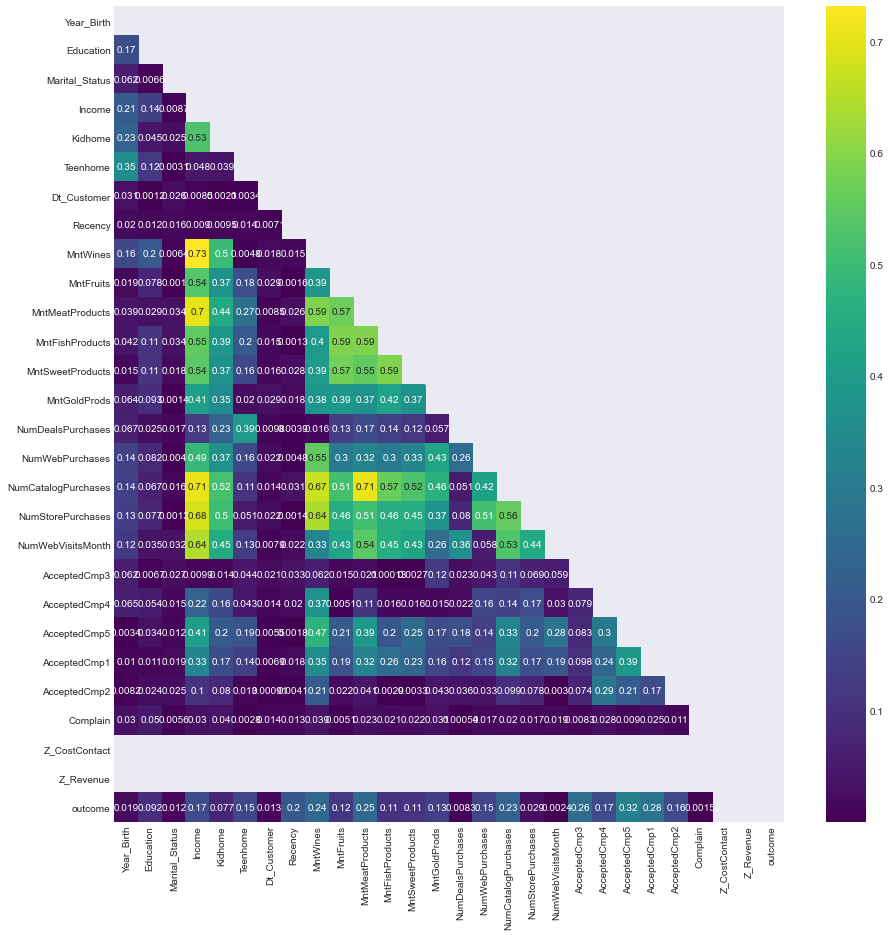

In [85]:
plt.figure(figsize=(15, 15))
corr = data.corr() 
mask = np.tri(*corr.shape).T 
sns.heatmap(corr.abs(), mask=mask, annot=True, cmap='viridis');

# GLM method with Multiple Independent Variables

We will remove the columns which have very high autocorrelation.

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Z_Revenue, Z_CostContact, Complain, AcceptedCmp2, AcceptedCmp1, AcceptedCmp5, AcceptedCmp4, AcceptedCmp3, NumWebPurchases, NumDealsPurchases, MntGoldProds, MntSweetProducts, MntFishProducts, MntFruits, Recency, Dt_Customer, Teenhome, Kidhome, Income, Marital_Status, Education, Year_Birth, Intercept]
Sampling 2 chains, 0 divergences: 100%|█████████████████████████████████████████| 4000/4000 [34:56<00:00,  1.91draws/s]
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The acceptance probability does not match the target. It is 0.9432883456948871, but should be close to 0.8. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The

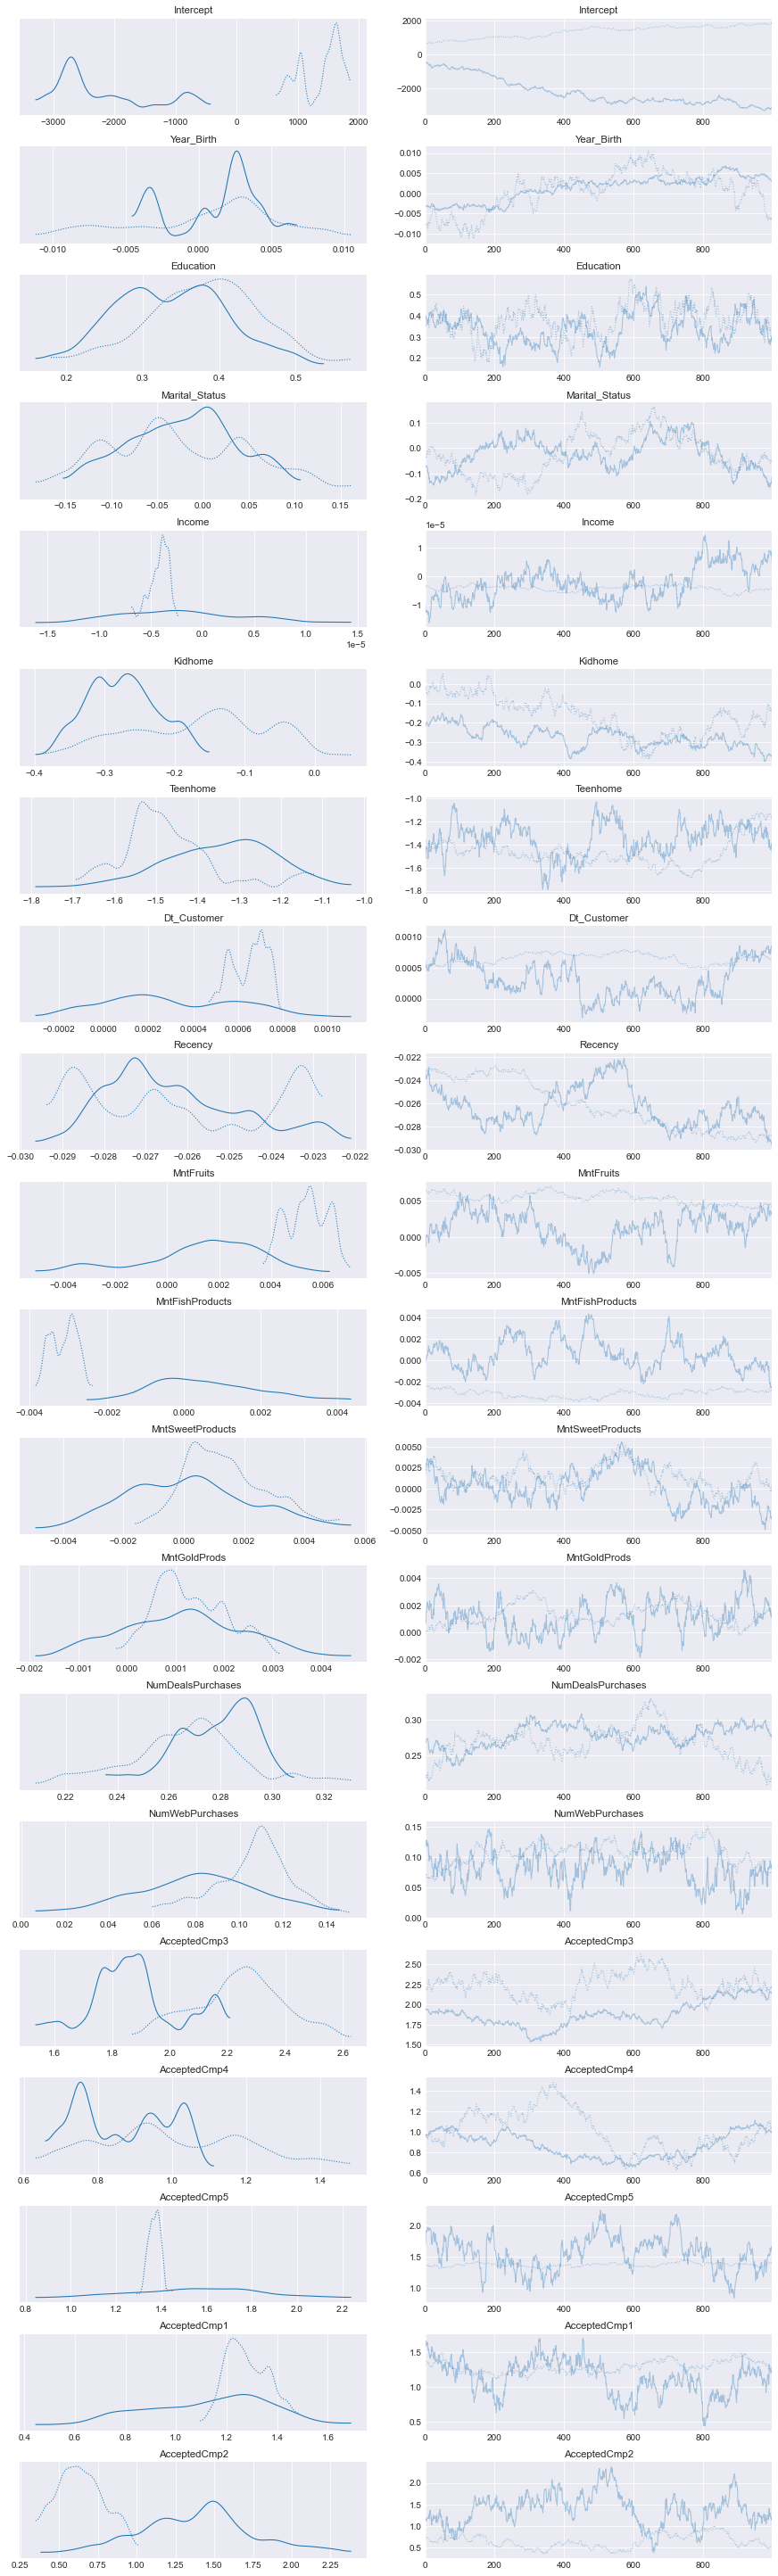

In [77]:
with pm.Model() as logistic_model:
    pm.glm.GLM.from_formula('outcome ~ Year_Birth + Education + Marital_Status + Income + Kidhome + Teenhome + Dt_Customer + Recency  + MntFruits  + MntFishProducts + MntSweetProducts + MntGoldProds + NumDealsPurchases + NumWebPurchases + AcceptedCmp3 + AcceptedCmp4 + AcceptedCmp5 +AcceptedCmp1 +AcceptedCmp2 +Complain + Z_CostContact+Z_Revenue', data, family = pm.glm.families.Binomial())
    trace = pm.sample(1000, tune = 1000, init = 'adapt_diag')
    
az.plot_trace(trace);

In [79]:
stat_df = pm.summary(trace)
stat_df['odds_ratio'] = np.exp(stat_df['mean'])
stat_df['percentage_effect'] = 100 * (stat_df['odds_ratio'] - 1)
stat_df

C:\Users\Hp\anaconda\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


mean        sd    hdi_3%   hdi_97%  mcse_mean   mcse_sd  \
Intercept         -413.657  1874.741 -2917.932  1844.996   1297.929  1089.685   
Year_Birth           0.001     0.004    -0.009     0.007      0.002     0.001   
Education            0.358     0.077     0.223     0.501      0.017     0.013   
Marital_Status      -0.024     0.070    -0.147     0.102      0.018     0.013   
Income              -0.000     0.000    -0.000     0.000      0.000     0.000   
Kidhome             -0.219     0.098    -0.370    -0.032      0.059     0.047   
Teenhome            -1.408     0.144    -1.645    -1.128      0.043     0.032   
Dt_Customer          0.000     0.000    -0.000     0.001      0.000     0.000   
Recency             -0.026     0.002    -0.029    -0.023      0.001     0.001   
MntFruits            0.003     0.003    -0.002     0.007      0.002     0.001   
MntFishProducts     -0.001     0.002    -0.004     0.002      0.001     0.001   
MntSweetProducts     0.001     0.002    -0.003     0.004      0.000     0.000   
MntGoldProds         0.001     0.001    -0.001     0.003      0.000     0.000   
NumDealsPurchases    0.273     0.020     0.230     0.309      0.005     0.004   
NumWebPurchases      0.093     0.026     0.041     0.135      0.009     0.007   
AcceptedCmp3         2.060     0.241     1.700     2.561      0.141     0.112   
AcceptedCmp4         0.938     0.182     0.663     1.271      0.097     0.077   
AcceptedCmp5         1.462     0.211     1.090     1.921      0.064     0.050   
AcceptedCmp1         1.206     0.199     0.736     1.479      0.088     0.067   
AcceptedCmp2         1.016     0.467     0.362     1.846      0.268     0.211   
Complain             0.362     0.681    -0.918     1.534      0.277     0.206   
Z_CostContact      381.778   538.135  -201.389  1147.388    369.398   309.005   
Z_Revenue          -66.913    33.191  -118.632   -17.367     21.364    17.437   

                   ess_mean  ess_sd  ess_bulk  ess_tail  r_hat     odds_ratio  \
Intercept               2.0     2.0       2.0      11.0   2.79  2.244127e-180   
Year_Birth              5.0     5.0       5.0      12.0   1.39   1.001001e+00   
Education              20.0    17.0      19.0     115.0   1.12   1.430466e+00   
Marital_Status         14.0    14.0      15.0      43.0   1.10   9.762857e-01   
Income                 13.0    13.0      17.0      15.0   1.43   1.000000e+00   
Kidhome                 3.0     3.0       3.0      13.0   1.67   8.033217e-01   
Teenhome               11.0    11.0      12.0      55.0   1.15   2.446321e-01   
Dt_Customer             4.0     4.0       6.0      65.0   1.30   1.000000e+00   
Recency                 4.0     4.0       4.0      23.0   1.42   9.743351e-01   
MntFruits               3.0     3.0       3.0      40.0   1.79   1.003005e+00   
MntFishProducts         2.0     2.0       3.0      22.0   1.93   9.990005e-01   
MntSweetProducts       16.0    16.0      17.0      32.0   1.15   1.001001e+00   
MntGoldProds           30.0    30.0      30.0      76.0   1.06   1.001001e+00   
NumDealsPurchases      14.0    14.0      14.0      28.0   1.08   1.313900e+00   
NumWebPurchases         8.0     8.0       8.0      62.0   1.18   1.097462e+00   
AcceptedCmp3            3.0     3.0       3.0      21.0   1.82   7.845970e+00   
AcceptedCmp4            3.0     3.0       4.0      17.0   1.46   2.554867e+00   
AcceptedCmp5           11.0     9.0      20.0      69.0   1.58   4.314580e+00   
AcceptedCmp1            5.0     5.0       5.0      51.0   1.37   3.340098e+00   
AcceptedCmp2            3.0     3.0       3.0      31.0   1.67   2.762124e+00   
Complain                6.0     6.0       7.0      29.0   1.28   1.436199e+00   
Z_CostContact           2.0     2.0       2.0      11.0   2.80  6.369109e+165   
Z_Revenue               2.0     2.0       3.0      12.0   2.00   8.710706e-30   

                   percentage_effect  
Intercept              -1.000000e+02  
Year_Birth              1.000500e-01  
Education      

With a one unit increase in independent variable, the odds of response (yes) to a marketing campaign increases by that percentage effect, while holding all the other independent variables constant.

C:\Users\Hp\anaconda\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


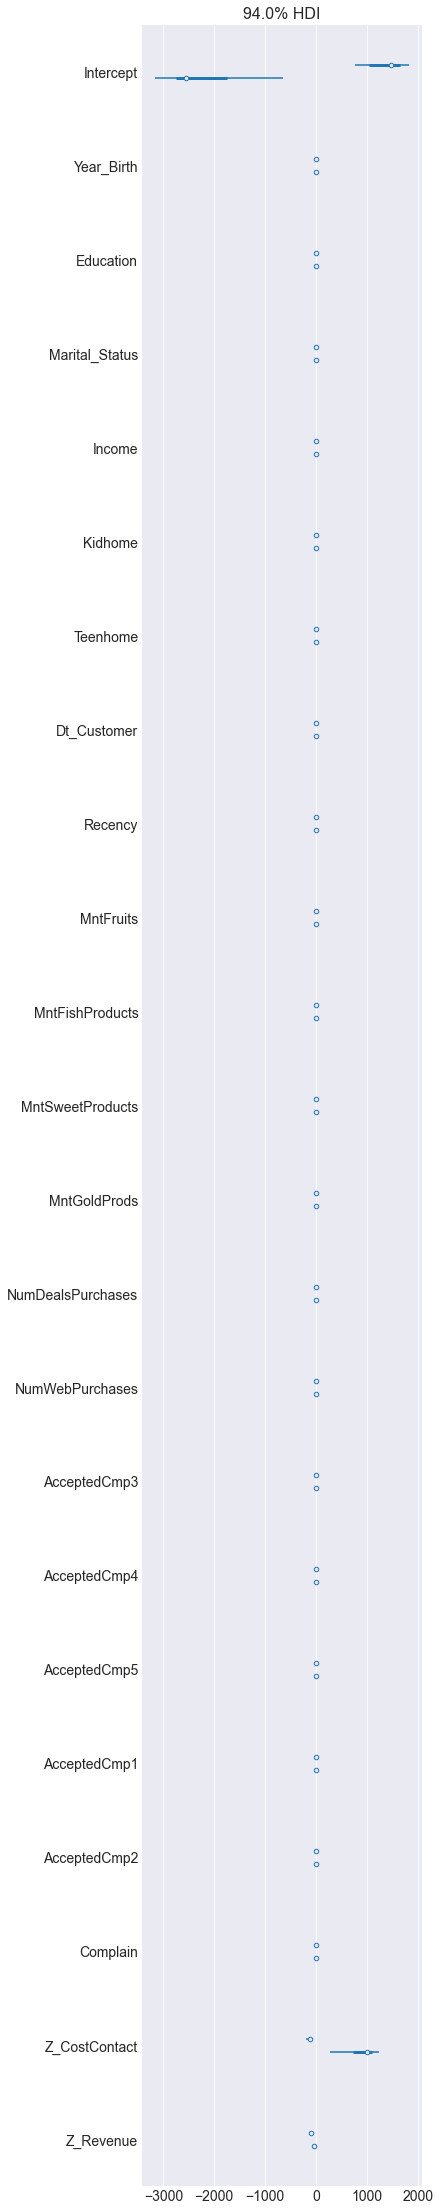

In [80]:
pm.forestplot(trace);

C:\Users\Hp\anaconda\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


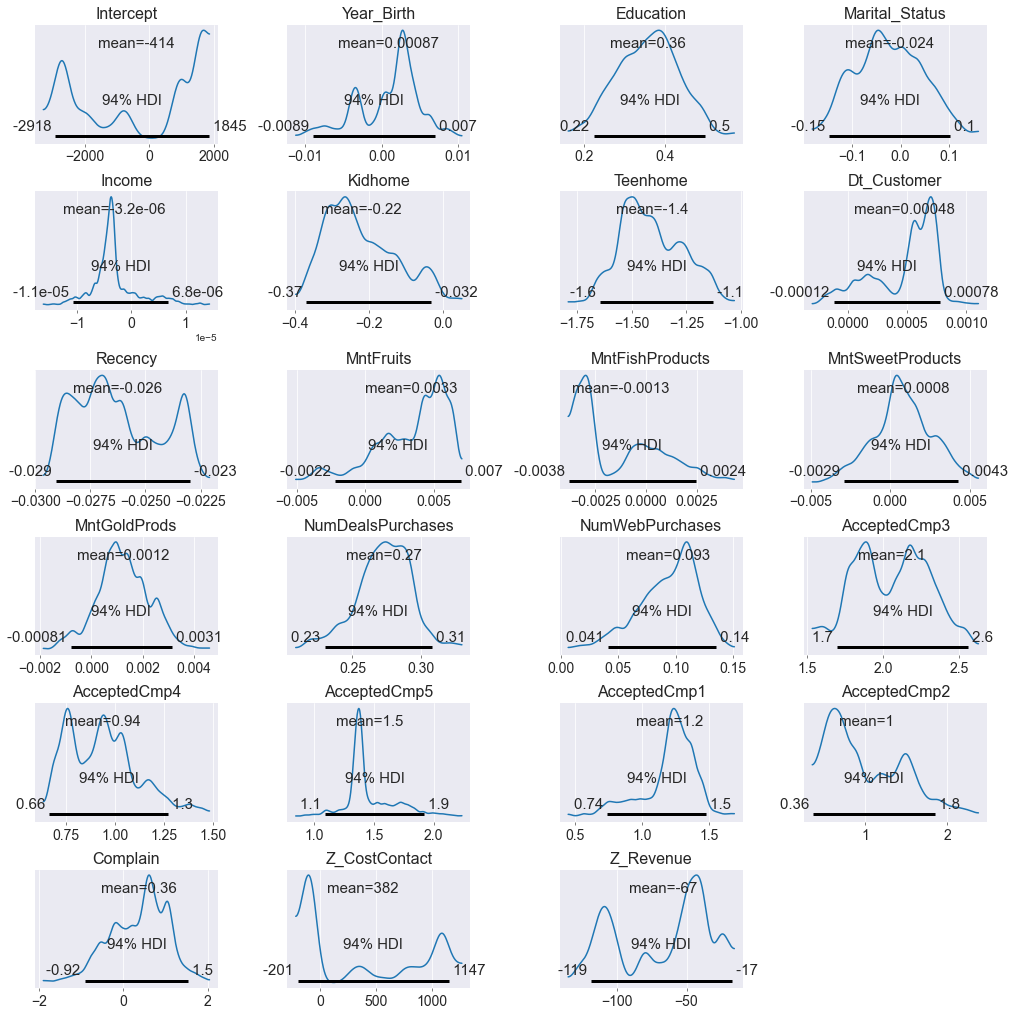

In [87]:
pm.plot_posterior(trace, figsize = (14, 14));

<ipython-input-88-f0a2c8c26381>:5: DeprecationWarning: sample_ppc() is deprecated.  Please use sample_posterior_predictive()
  ppc = pm.sample_ppc(trace, model=logistic_model, samples=1000)
C:\Users\Hp\anaconda\lib\site-packages\pymc3\sampling.py:1246: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(
100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 174.74it/s]


Confusion matrix
[[1845   52]
 [ 208  122]]


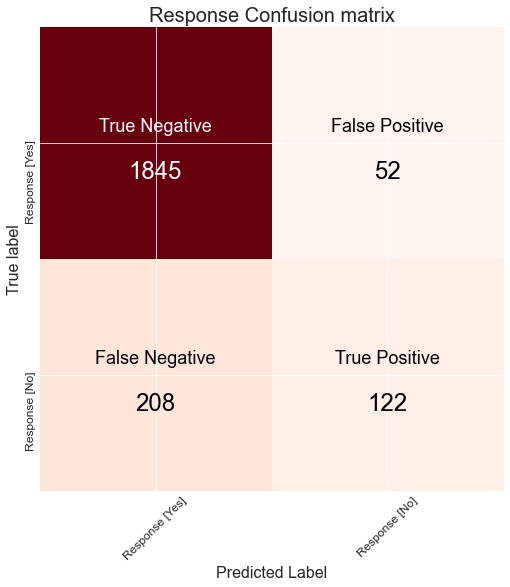

In [88]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from IPython.core.pylabtools import figsize
import itertools

ppc = pm.sample_ppc(trace, model=logistic_model, samples=1000)
preds = np.rint(ppc['y'].mean(axis=0)).astype('int')

def plot_confusion_matrix(cm, classes = ['Response [Yes]', 'Response [No]'],
                          title='Response Confusion matrix',
                          cmap=plt.cm.Reds):
    
    # Display the matrix in text form
    print('Confusion matrix')
    print(cm)
    figsize(8, 8)
    
    # Show the matrix using the imshow functionality
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 20)
    
    # Tick marks show classes
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 12)
    plt.yticks(tick_marks, classes, rotation = 90, size = 12)

    # Formatting for text labels on plot
    fmt1 = 's'
    fmt2 = 'd'
    thresh = cm.max() / 2.
    
    # Four types of classifications
    types = [['True Negative', 'False Positive'],
             ['False Negative', 'True Positive']]
    
    # Add the actual numbers and the types onto the heatmap plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i - 0.05, format(types[i][j], fmt1),
                 horizontalalignment="center", size = 18,
                 color="white" if cm[i, j] > thresh else "black")
        
        plt.text(j, i + 0.15, format(cm[i, j], fmt2),
                 horizontalalignment="center", size = 24,
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', size = 16)
    plt.xlabel('Predicted Label', size = 16)
    
cm = confusion_matrix(data['outcome'], preds)
plot_confusion_matrix(cm)

In [93]:
print('Accuracy of the full model: ', accuracy_score(preds, data['outcome']))
print('f1 score of the full model: ', f1_score(preds, data['outcome']))
print('Precision of the full model: ',precision_score(preds, data['outcome'],pos_label=1, labels=[0,1])*100)
print('Recall of the full model: ',recall_score(preds, data['outcome'],pos_label=1,labels=[0,1])*100)

Accuracy of the full model:  0.8832510103277953
f1 score of the full model:  0.4841269841269841
Precision of the full model:  36.96969696969697
Recall of the full model:  70.11494252873564


# Metropolis

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [Z_Revenue]
>Metropolis: [Z_CostContact]
>Metropolis: [Complain]
>Metropolis: [AcceptedCmp2]
>Metropolis: [AcceptedCmp1]
>Metropolis: [AcceptedCmp5]
>Metropolis: [AcceptedCmp4]
>Metropolis: [AcceptedCmp3]
>Metropolis: [NumWebPurchases]
>Metropolis: [NumDealsPurchases]
>Metropolis: [MntGoldProds]
>Metropolis: [MntSweetProducts]
>Metropolis: [MntFishProducts]
>Metropolis: [MntFruits]
>Metropolis: [Recency]
>Metropolis: [Dt_Customer]
>Metropolis: [Teenhome]
>Metropolis: [Kidhome]
>Metropolis: [Income]
>Metropolis: [Marital_Status]
>Metropolis: [Education]
>Metropolis: [Year_Birth]
>Metropolis: [Intercept]
Sampling 2 chains, 0 divergences: 100%|█████████████████████████████████████████| 4000/4000 [01:08<00:00, 58.34draws/s]
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
C:\Users\Hp\anaconda\lib\site

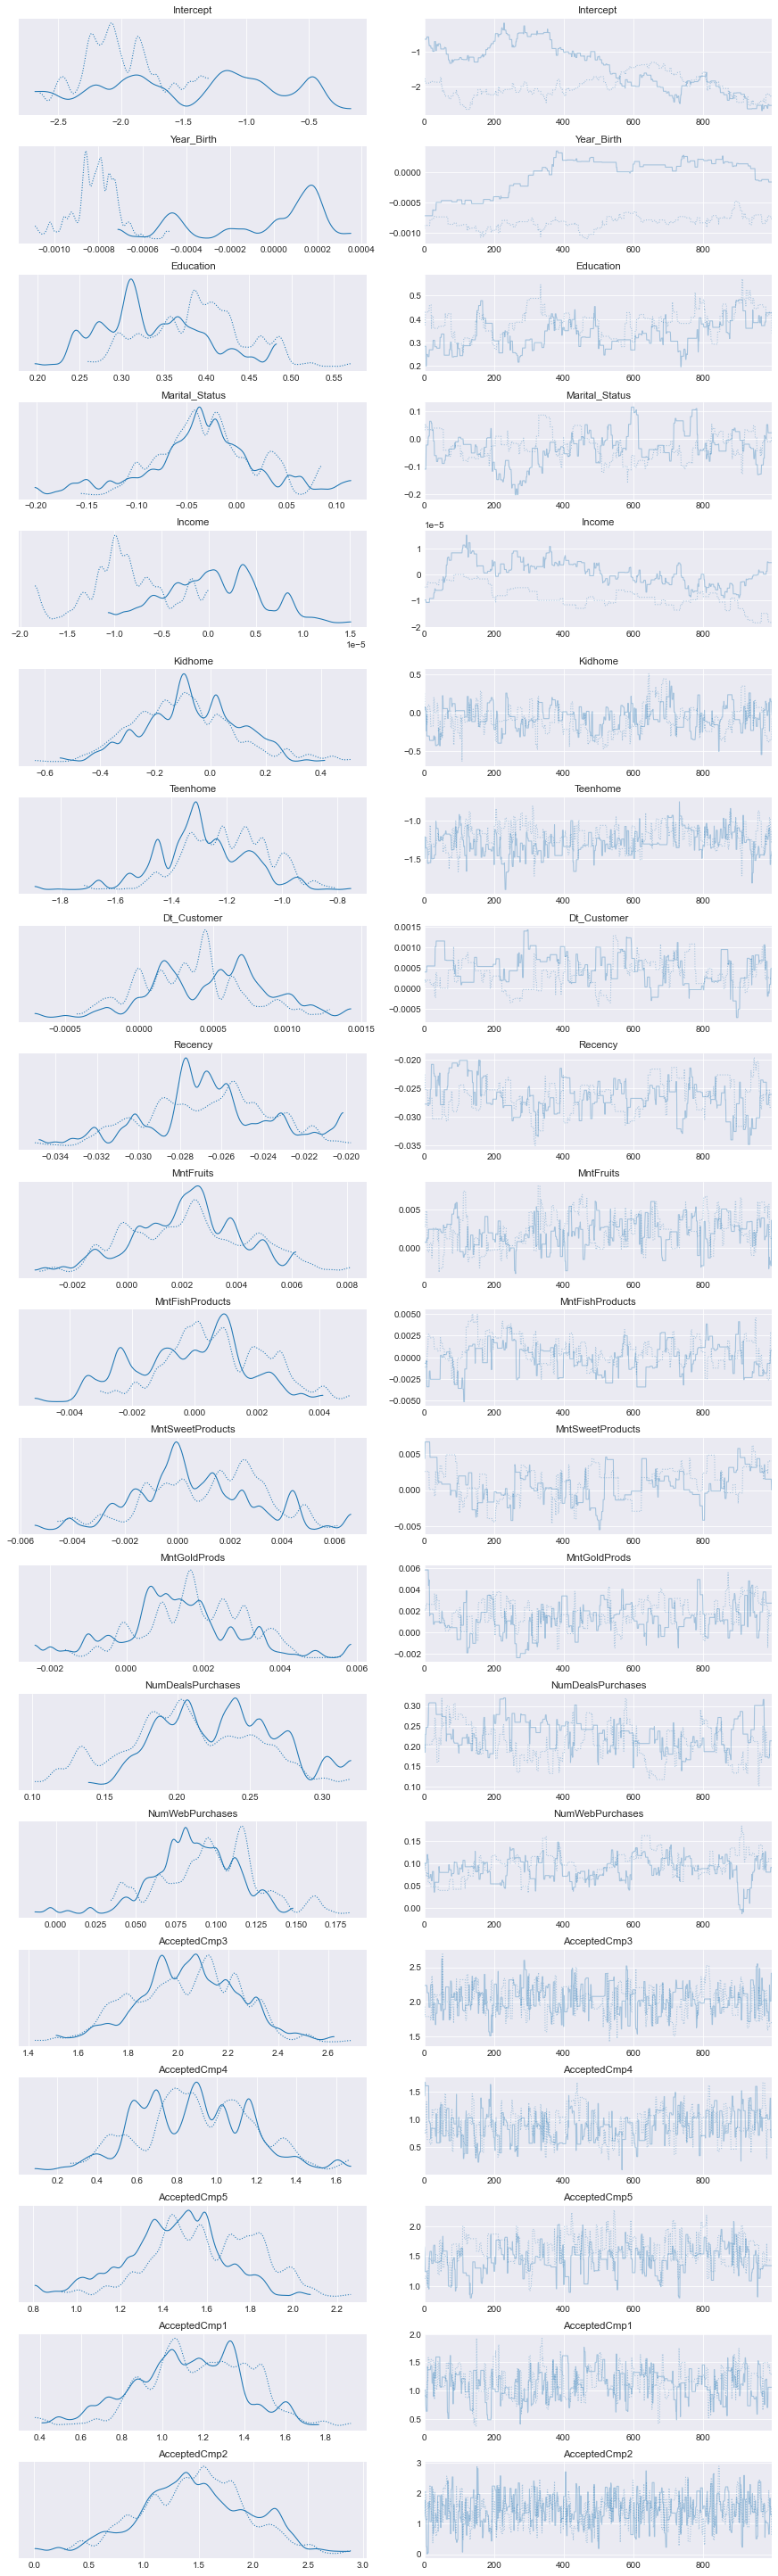

In [25]:
import pymc3 as pm

with pm.Model() as logistic_model_mh:
    pm.glm.GLM.from_formula('outcome ~ Year_Birth + Education + Marital_Status + Income + Kidhome + Teenhome + Dt_Customer + Recency  + MntFruits  + MntFishProducts + MntSweetProducts + MntGoldProds + NumDealsPurchases + NumWebPurchases + AcceptedCmp3 + AcceptedCmp4 + AcceptedCmp5 +AcceptedCmp1 +AcceptedCmp2 +Complain + Z_CostContact+Z_Revenue', data, family = pm.glm.families.Binomial())
    sampler = pm.Metropolis()
    trace_mh = pm.sample(100, step = sampler,tune = 1000)
    
az.plot_trace(trace_mh);

In [26]:
stat_df = pm.summary(trace_mh)
stat_df['odds_ratio'] = np.exp(stat_df['mean'])
stat_df['percentage_effect'] = 100 * (stat_df['odds_ratio'] - 1)
stat_df

C:\Users\Hp\anaconda\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
Intercept         -1.708  0.587  -2.536   -0.467      0.361    0.290   
Year_Birth        -0.000  0.000  -0.001    0.000      0.000    0.000   
Education          0.361  0.064   0.257    0.488      0.022    0.016   
Marital_Status    -0.031  0.053  -0.121    0.086      0.011    0.008   
Income            -0.000  0.000  -0.000    0.000      0.000    0.000   
Kidhome           -0.081  0.174  -0.396    0.236      0.019    0.013   
Teenhome          -1.242  0.161  -1.504   -0.936      0.036    0.026   
Dt_Customer        0.000  0.000  -0.000    0.001      0.000    0.000   
Recency           -0.027  0.003  -0.032   -0.021      0.000    0.000   
MntFruits          0.002  0.002  -0.001    0.006      0.000    0.000   
MntFishProducts    0.000  0.002  -0.003    0.003      0.000    0.000   
MntSweetProducts   0.001  0.002  -0.003    0.005      0.000    0.000   
MntGoldProds       0.002  0.001  -0.001    0.004      0.000    0.000   
NumDealsPurchases  0.218  0.044   0.117    0.283      0.008    0.006   
NumWebPurchases    0.091  0.028   0.039    0.136      0.007    0.005   
AcceptedCmp3       2.041  0.203   1.644    2.368      0.013    0.010   
AcceptedCmp4       0.896  0.274   0.381    1.377      0.025    0.018   
AcceptedCmp5       1.524  0.251   1.090    2.025      0.050    0.036   
AcceptedCmp1       1.145  0.257   0.686    1.615      0.020    0.014   
AcceptedCmp2       1.466  0.492   0.591    2.387      0.025    0.017   
Complain           0.255  0.787  -1.101    1.715      0.038    0.027   
Z_CostContact      0.230  0.440  -0.353    0.818      0.302    0.253   
Z_Revenue         -0.065  0.045  -0.160    0.028      0.014    0.010   

                   ess_mean  ess_sd  ess_bulk  ess_tail  r_hat  odds_ratio  \
Intercept               3.0     3.0       3.0      22.0   1.65    0.181228   
Year_Birth              2.0     2.0       3.0      22.0   2.07    1.000000   
Education               9.0     9.0       9.0      51.0   1.16    1.434763   
Marital_Status         25.0    25.0      26.0      35.0   1.09    0.969476   
Income                  3.0     3.0       3.0      11.0   1.78    1.000000   
Kidhome                84.0    84.0      86.0      97.0   1.02    0.922194   
Teenhome               19.0    19.0      19.0     128.0   1.09    0.288806   
Dt_Customer            46.0    46.0      44.0      91.0   1.08    1.000000   
Recency                50.0    50.0      51.0      40.0   1.03    0.973361   
MntFruits              78.0    78.0      77.0     226.0   1.03    1.002002   
MntFishProducts        35.0    35.0      35.0      79.0   1.07    1.000000   
MntSweetProducts       47.0    47.0      48.0     113.0   1.03    1.001001   
MntGoldProds           59.0    59.0      59.0      55.0   1.07    1.002002   
NumDealsPurchases      31.0    31.0      31.0      73.0   1.10    1.243587   
NumWebPurchases        18.0    17.0      18.0      55.0   1.11    1.095269   
AcceptedCmp3          228.0   228.0     227.0     331.0   1.01    7.698304   
AcceptedCmp4          120.0   114.0     122.0     191.0   1.01    2.449784   
AcceptedCmp5           25.0    25.0      26.0     280.0   1.08    4.590551   
AcceptedCmp1          169.0   169.0     173.0     287.0   1.02    3.142441   
AcceptedCmp2          401.0   401.0     407.0     496.0   1.00    4.331873   
Complain              438.0   438.0     440.0     438.0   1.00    1.290462   
Z_CostContact           2.0     2.0       3.0      18.0   1.97    1.258600   
Z_Revenue              11.0    11.0      12.0      19.0   1.12    0.937067   

                   percentage_effect  
Intercept                 -81.877211  
Year_Birth                  0.000000  
Education                  43.476346  
Marital_Status             -3.052443  
Income                      0.000000  
Kidhome                    -7.780631  
Teenhome                  -71.119397  
Dt_Customer                 0.000000  
Recency                    -2.663876  
MntFruits                   

C:\Users\Hp\anaconda\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


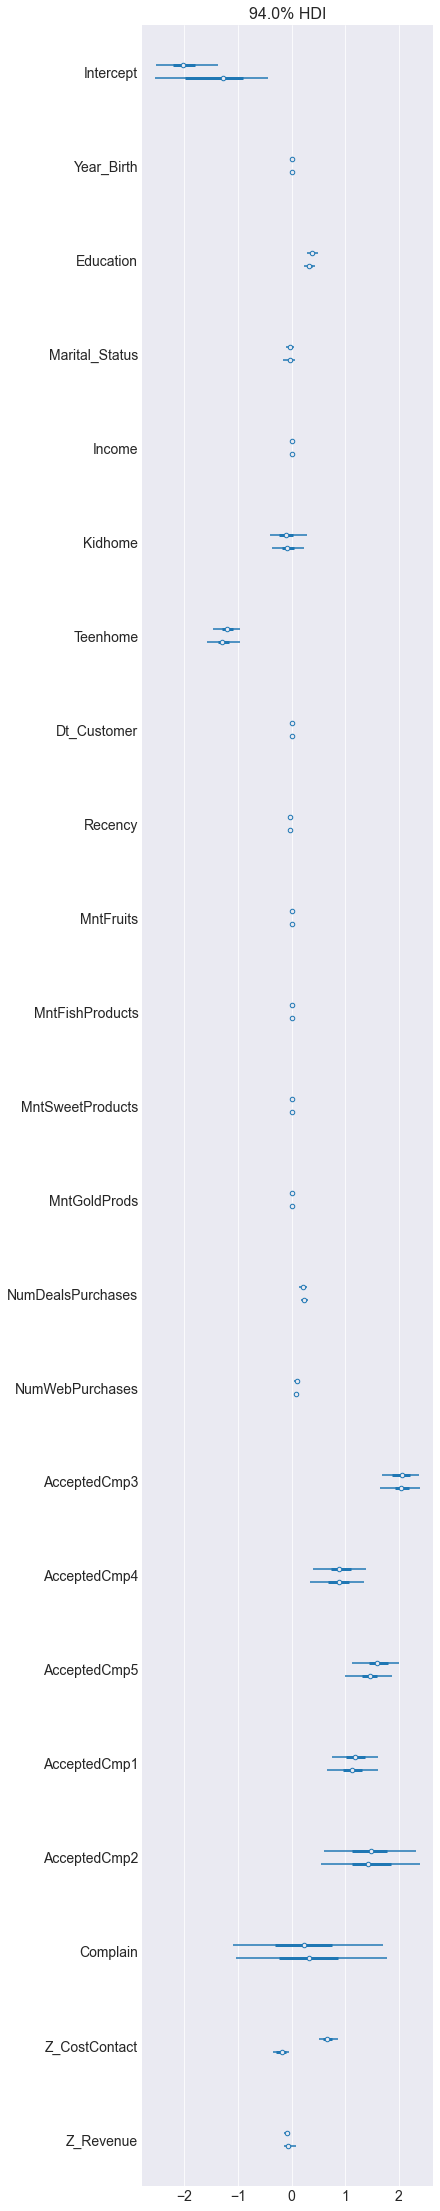

In [27]:
pm.forestplot(trace_mh);

C:\Users\Hp\anaconda\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


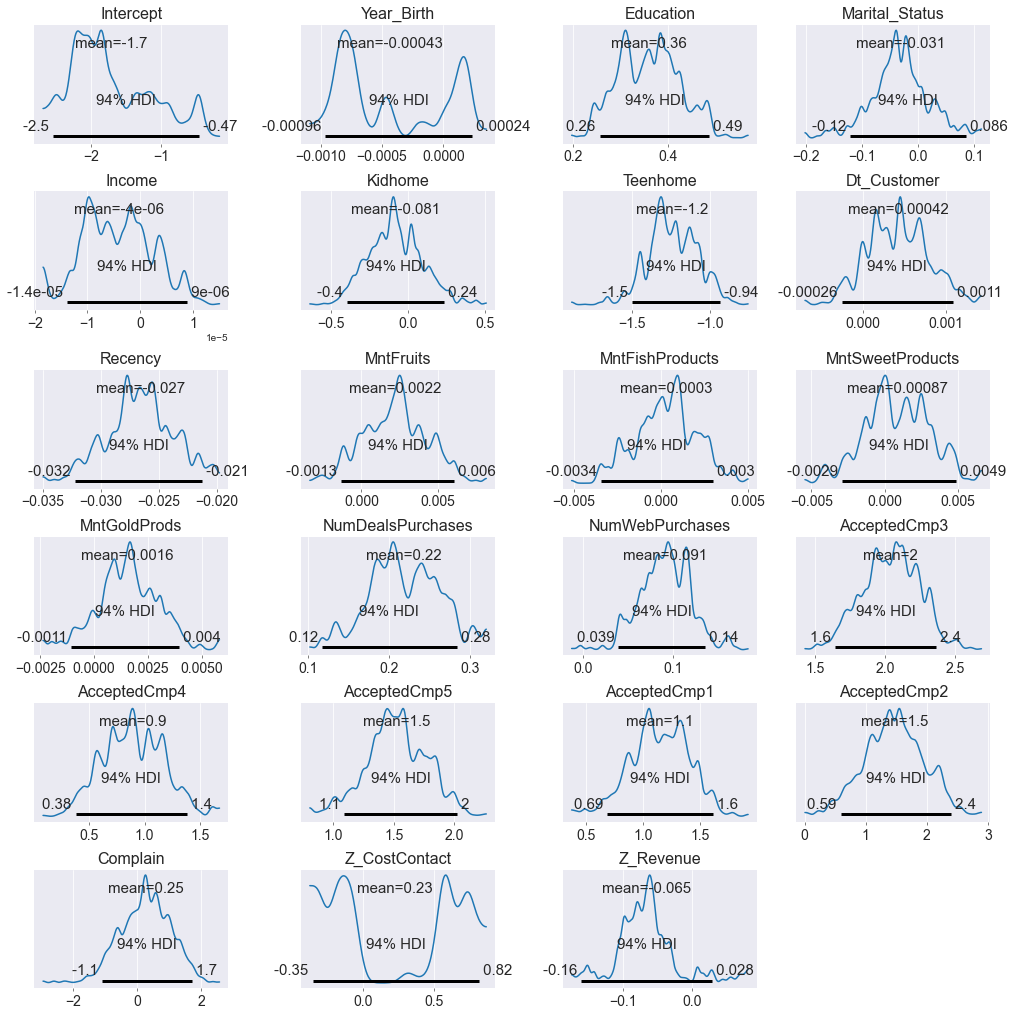

In [28]:
pm.plot_posterior(trace_mh, figsize = (14, 14));

<ipython-input-29-02077fa2b144>:5: DeprecationWarning: sample_ppc() is deprecated.  Please use sample_posterior_predictive()
  ppc = pm.sample_ppc(trace_mh, model=logistic_model_mh, samples=1000)
C:\Users\Hp\anaconda\lib\site-packages\pymc3\sampling.py:1246: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(
100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 428.71it/s]


Confusion matrix
[[1846   51]
 [ 210  120]]


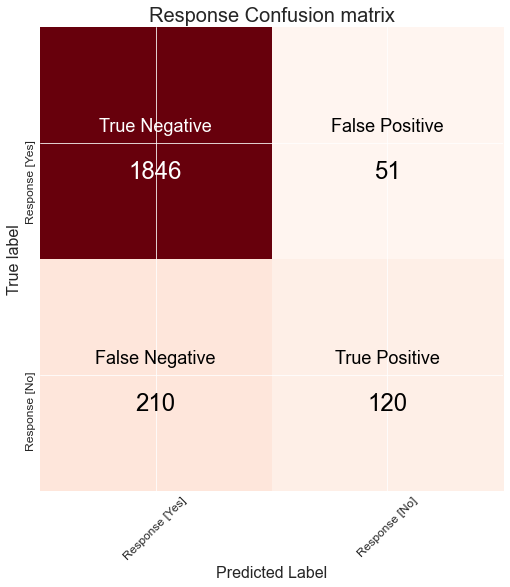

In [29]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from IPython.core.pylabtools import figsize
import itertools

ppc = pm.sample_ppc(trace_mh, model=logistic_model_mh, samples=1000)
preds = np.rint(ppc['y'].mean(axis=0)).astype('int')

def plot_confusion_matrix(cm, classes = ['Response [Yes]', 'Response [No]'],
                          title='Response Confusion matrix',
                          cmap=plt.cm.Reds):
    
    # Display the matrix in text form
    print('Confusion matrix')
    print(cm)
    figsize(8, 8)
    
    # Show the matrix using the imshow functionality
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 20)
    
    # Tick marks show classes
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 12)
    plt.yticks(tick_marks, classes, rotation = 90, size = 12)

    # Formatting for text labels on plot
    fmt1 = 's'
    fmt2 = 'd'
    thresh = cm.max() / 2.
    
    # Four types of classifications
    types = [['True Negative', 'False Positive'],
             ['False Negative', 'True Positive']]
    
    # Add the actual numbers and the types onto the heatmap plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i - 0.05, format(types[i][j], fmt1),
                 horizontalalignment="center", size = 18,
                 color="white" if cm[i, j] > thresh else "black")
        
        plt.text(j, i + 0.15, format(cm[i, j], fmt2),
                 horizontalalignment="center", size = 24,
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', size = 16)
    plt.xlabel('Predicted Label', size = 16)
    
cm = confusion_matrix(data['outcome'], preds)
plot_confusion_matrix(cm)

In [30]:
print('Accuracy of the full model: ', accuracy_score(preds, data['outcome']))
print('f1 score of the full model: ', f1_score(preds, data['outcome']))
print('Precision of the full model: ',precision_score(preds, data['outcome'],pos_label=1, labels=[0,1])*100)
print('Recall of the full model: ',recall_score(preds, data['outcome'],pos_label=1,labels=[0,1])*100)

Accuracy of the full model:  0.8828019757521329
f1 score of the full model:  0.4790419161676646
Precision of the full model:  36.36363636363637
Recall of the full model:  70.17543859649122
